#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [9]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [10]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [12]:
model = Sequential()

In [13]:
#卷積層1

In [14]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [17]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [21]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [22]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [23]:
model.add(Dense(10, activation='softmax'))

In [24]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [25]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [31]:
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# '''
# 作業:
# 請分別選用 "MSE", "binary _crossentropy"
# 查看Train/test accurancy and loss rate
# '''

In [32]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Train on 37500 samples, validate on 12500 samples
Epoch 1/12


  128/37500 [..............................] - ETA: 4:30 - loss: 0.0709 - acc: 0.4453

  256/37500 [..............................] - ETA: 3:01 - loss: 0.0675 - acc: 0.4805

  384/37500 [..............................] - ETA: 2:27 - loss: 0.0673 - acc: 0.4766

  512/37500 [..............................] - ETA: 2:09 - loss: 0.0652 - acc: 0.4961

  640/37500 [..............................] - ETA: 1:56 - loss: 0.0651 - acc: 0.4891

  768/37500 [..............................] - ETA: 1:49 - loss: 0.0645 - acc: 0.4974

  896/37500 [..............................] - ETA: 1:43 - loss: 0.0631 - acc: 0.5123

 1024/37500 [..............................] - ETA: 1:39 - loss: 0.0627 - acc: 0.5176

 1152/37500 [..............................] - ETA: 1:35 - loss: 0.0623 - acc: 0.5234

 1280/37500 [>.............................] - ETA: 1:32 - loss: 0.0620 - acc: 0.5258

 1408/37500 [>.............................] - ETA: 1:30 - loss: 0.0624 - acc: 0.5192

 1536/37500 [>.............................] - ETA: 1:29 - loss: 0.0619 - acc: 0.5267

 1664/37500 [>.............................] - ETA: 1:27 - loss: 0.0616 - acc: 0.5282

 1792/37500 [>.............................] - ETA: 1:26 - loss: 0.0618 - acc: 0.5279

 1920/37500 [>.............................] - ETA: 1:25 - loss: 0.0616 - acc: 0.5286

 2048/37500 [>.............................] - ETA: 1:23 - loss: 0.0615 - acc: 0.5273

 2176/37500 [>.............................] - ETA: 1:23 - loss: 0.0616 - acc: 0.5253

 2304/37500 [>.............................] - ETA: 1:22 - loss: 0.0616 - acc: 0.5265

 2432/37500 [>.............................] - ETA: 1:21 - loss: 0.0616 - acc: 0.5263

 2560/37500 [=>............................] - ETA: 1:21 - loss: 0.0616 - acc: 0.5270

 2688/37500 [=>............................] - ETA: 1:20 - loss: 0.0615 - acc: 0.5283

 2816/37500 [=>............................] - ETA: 1:19 - loss: 0.0615 - acc: 0.5288

 2944/37500 [=>............................] - ETA: 1:19 - loss: 0.0614 - acc: 0.5289

 3072/37500 [=>............................] - ETA: 1:18 - loss: 0.0617 - acc: 0.5260

 3200/37500 [=>............................] - ETA: 1:17 - loss: 0.0616 - acc: 0.5269

 3328/37500 [=>............................] - ETA: 1:16 - loss: 0.0614 - acc: 0.5285

 3456/37500 [=>............................] - ETA: 1:16 - loss: 0.0615 - acc: 0.5286

 3584/37500 [=>............................] - ETA: 1:16 - loss: 0.0614 - acc: 0.5282

 3712/37500 [=>............................] - ETA: 1:15 - loss: 0.0614 - acc: 0.5267

 3840/37500 [==>...........................] - ETA: 1:14 - loss: 0.0613 - acc: 0.5286

 3968/37500 [==>...........................] - ETA: 1:14 - loss: 0.0610 - acc: 0.5325

 4096/37500 [==>...........................] - ETA: 1:14 - loss: 0.0610 - acc: 0.5325

 4224/37500 [==>...........................] - ETA: 1:13 - loss: 0.0611 - acc: 0.5324

 4352/37500 [==>...........................] - ETA: 1:13 - loss: 0.0609 - acc: 0.5342

 4480/37500 [==>...........................] - ETA: 1:12 - loss: 0.0608 - acc: 0.5357

 4608/37500 [==>...........................] - ETA: 1:13 - loss: 0.0609 - acc: 0.5345

 4736/37500 [==>...........................] - ETA: 1:12 - loss: 0.0608 - acc: 0.5355

 4864/37500 [==>...........................] - ETA: 1:11 - loss: 0.0608 - acc: 0.5331

 4992/37500 [==>...........................] - ETA: 1:11 - loss: 0.0609 - acc: 0.5339

 5120/37500 [===>..........................] - ETA: 1:11 - loss: 0.0608 - acc: 0.5338

 5248/37500 [===>..........................] - ETA: 1:11 - loss: 0.0607 - acc: 0.5345

 5376/37500 [===>..........................] - ETA: 1:10 - loss: 0.0607 - acc: 0.5352

 5504/37500 [===>..........................] - ETA: 1:10 - loss: 0.0608 - acc: 0.5340

 5632/37500 [===>..........................] - ETA: 1:09 - loss: 0.0607 - acc: 0.5346

 5760/37500 [===>..........................] - ETA: 1:09 - loss: 0.0606 - acc: 0.5352

 5888/37500 [===>..........................] - ETA: 1:09 - loss: 0.0606 - acc: 0.5353

 6016/37500 [===>..........................] - ETA: 1:09 - loss: 0.0607 - acc: 0.5344

 6144/37500 [===>..........................] - ETA: 1:08 - loss: 0.0607 - acc: 0.5339

 6272/37500 [====>.........................] - ETA: 1:07 - loss: 0.0607 - acc: 0.5338

 6400/37500 [====>.........................] - ETA: 1:07 - loss: 0.0607 - acc: 0.5336

 6528/37500 [====>.........................] - ETA: 1:07 - loss: 0.0607 - acc: 0.5337

 6656/37500 [====>.........................] - ETA: 1:07 - loss: 0.0607 - acc: 0.5338

 6784/37500 [====>.........................] - ETA: 1:06 - loss: 0.0608 - acc: 0.5318

 6912/37500 [====>.........................] - ETA: 1:06 - loss: 0.0609 - acc: 0.5311

 7040/37500 [====>.........................] - ETA: 1:06 - loss: 0.0608 - acc: 0.5321

 7168/37500 [====>.........................] - ETA: 1:06 - loss: 0.0608 - acc: 0.5319

 7296/37500 [====>.........................] - ETA: 1:06 - loss: 0.0608 - acc: 0.5311

 7424/37500 [====>.........................] - ETA: 1:06 - loss: 0.0609 - acc: 0.5310

 7552/37500 [=====>........................] - ETA: 1:05 - loss: 0.0608 - acc: 0.5319

 7680/37500 [=====>........................] - ETA: 1:05 - loss: 0.0609 - acc: 0.5320

 7808/37500 [=====>........................] - ETA: 1:05 - loss: 0.0608 - acc: 0.5325

 7936/37500 [=====>........................] - ETA: 1:04 - loss: 0.0608 - acc: 0.5326

 8064/37500 [=====>........................] - ETA: 1:04 - loss: 0.0608 - acc: 0.5336

 8192/37500 [=====>........................] - ETA: 1:03 - loss: 0.0607 - acc: 0.5333

 8320/37500 [=====>........................] - ETA: 1:03 - loss: 0.0607 - acc: 0.5335

 8448/37500 [=====>........................] - ETA: 1:03 - loss: 0.0608 - acc: 0.5328

 8576/37500 [=====>........................] - ETA: 1:02 - loss: 0.0608 - acc: 0.5328

 8704/37500 [=====>........................] - ETA: 1:02 - loss: 0.0608 - acc: 0.5333

 8832/37500 [======>.......................] - ETA: 1:01 - loss: 0.0608 - acc: 0.5339

 8960/37500 [======>.......................] - ETA: 1:01 - loss: 0.0607 - acc: 0.5336

 9088/37500 [======>.......................] - ETA: 1:01 - loss: 0.0607 - acc: 0.5332

 9216/37500 [======>.......................] - ETA: 1:00 - loss: 0.0607 - acc: 0.5332

 9344/37500 [======>.......................] - ETA: 1:00 - loss: 0.0608 - acc: 0.5321

 9472/37500 [======>.......................] - ETA: 59s - loss: 0.0608 - acc: 0.5318 

 9600/37500 [======>.......................] - ETA: 59s - loss: 0.0608 - acc: 0.5319

 9728/37500 [======>.......................] - ETA: 59s - loss: 0.0608 - acc: 0.5320

 9856/37500 [======>.......................] - ETA: 58s - loss: 0.0609 - acc: 0.5325

 9984/37500 [======>.......................] - ETA: 58s - loss: 0.0608 - acc: 0.5325

10112/37500 [=======>......................] - ETA: 58s - loss: 0.0608 - acc: 0.5329

10240/37500 [=======>......................] - ETA: 57s - loss: 0.0607 - acc: 0.5330

10368/37500 [=======>......................] - ETA: 57s - loss: 0.0607 - acc: 0.5327

10496/37500 [=======>......................] - ETA: 57s - loss: 0.0607 - acc: 0.5333

10624/37500 [=======>......................] - ETA: 57s - loss: 0.0607 - acc: 0.5333

10752/37500 [=======>......................] - ETA: 56s - loss: 0.0608 - acc: 0.5329

10880/37500 [=======>......................] - ETA: 56s - loss: 0.0607 - acc: 0.5335

11008/37500 [=======>......................] - ETA: 55s - loss: 0.0608 - acc: 0.5331

11136/37500 [=======>......................] - ETA: 55s - loss: 0.0608 - acc: 0.5328

11264/37500 [========>.....................] - ETA: 55s - loss: 0.0608 - acc: 0.5333

11392/37500 [========>.....................] - ETA: 54s - loss: 0.0607 - acc: 0.5336

11520/37500 [========>.....................] - ETA: 54s - loss: 0.0607 - acc: 0.5344

11648/37500 [========>.....................] - ETA: 54s - loss: 0.0606 - acc: 0.5347

11776/37500 [========>.....................] - ETA: 53s - loss: 0.0606 - acc: 0.5345

11904/37500 [========>.....................] - ETA: 53s - loss: 0.0607 - acc: 0.5342

12032/37500 [========>.....................] - ETA: 53s - loss: 0.0607 - acc: 0.5338

12160/37500 [========>.....................] - ETA: 52s - loss: 0.0607 - acc: 0.5333

12288/37500 [========>.....................] - ETA: 52s - loss: 0.0607 - acc: 0.5339

12416/37500 [========>.....................] - ETA: 52s - loss: 0.0606 - acc: 0.5337

12544/37500 [=========>....................] - ETA: 51s - loss: 0.0607 - acc: 0.5334

12672/37500 [=========>....................] - ETA: 51s - loss: 0.0607 - acc: 0.5332

12800/37500 [=========>....................] - ETA: 50s - loss: 0.0607 - acc: 0.5325

12928/37500 [=========>....................] - ETA: 50s - loss: 0.0607 - acc: 0.5326

13056/37500 [=========>....................] - ETA: 50s - loss: 0.0607 - acc: 0.5322

13184/37500 [=========>....................] - ETA: 50s - loss: 0.0608 - acc: 0.5316

13312/37500 [=========>....................] - ETA: 49s - loss: 0.0608 - acc: 0.5315

13440/37500 [=========>....................] - ETA: 49s - loss: 0.0607 - acc: 0.5318

13568/37500 [=========>....................] - ETA: 48s - loss: 0.0608 - acc: 0.5308

13696/37500 [=========>....................] - ETA: 48s - loss: 0.0608 - acc: 0.5310

13824/37500 [==========>...................] - ETA: 48s - loss: 0.0608 - acc: 0.5309

13952/37500 [==========>...................] - ETA: 47s - loss: 0.0608 - acc: 0.5310

14080/37500 [==========>...................] - ETA: 47s - loss: 0.0608 - acc: 0.5310

14208/37500 [==========>...................] - ETA: 47s - loss: 0.0608 - acc: 0.5315

14336/37500 [==========>...................] - ETA: 46s - loss: 0.0607 - acc: 0.5319

14464/37500 [==========>...................] - ETA: 46s - loss: 0.0608 - acc: 0.5314

14592/37500 [==========>...................] - ETA: 46s - loss: 0.0608 - acc: 0.5308

14720/37500 [==========>...................] - ETA: 46s - loss: 0.0608 - acc: 0.5309

14848/37500 [==========>...................] - ETA: 45s - loss: 0.0607 - acc: 0.5315

14976/37500 [==========>...................] - ETA: 45s - loss: 0.0607 - acc: 0.5316

15104/37500 [===========>..................] - ETA: 44s - loss: 0.0607 - acc: 0.5316

15232/37500 [===========>..................] - ETA: 44s - loss: 0.0607 - acc: 0.5315

15360/37500 [===========>..................] - ETA: 44s - loss: 0.0607 - acc: 0.5316

15488/37500 [===========>..................] - ETA: 44s - loss: 0.0607 - acc: 0.5318

15616/37500 [===========>..................] - ETA: 43s - loss: 0.0607 - acc: 0.5316

15744/37500 [===========>..................] - ETA: 43s - loss: 0.0607 - acc: 0.5319

15872/37500 [===========>..................] - ETA: 43s - loss: 0.0607 - acc: 0.5314

16000/37500 [===========>..................] - ETA: 42s - loss: 0.0607 - acc: 0.5323

16128/37500 [===========>..................] - ETA: 42s - loss: 0.0607 - acc: 0.5319

16256/37500 [============>.................] - ETA: 42s - loss: 0.0607 - acc: 0.5324

16384/37500 [============>.................] - ETA: 41s - loss: 0.0607 - acc: 0.5321

16512/37500 [============>.................] - ETA: 41s - loss: 0.0607 - acc: 0.5323

16640/37500 [============>.................] - ETA: 41s - loss: 0.0607 - acc: 0.5319

16768/37500 [============>.................] - ETA: 40s - loss: 0.0607 - acc: 0.5323

16896/37500 [============>.................] - ETA: 40s - loss: 0.0608 - acc: 0.5319

17024/37500 [============>.................] - ETA: 40s - loss: 0.0607 - acc: 0.5321

17152/37500 [============>.................] - ETA: 39s - loss: 0.0607 - acc: 0.5322

17280/37500 [============>.................] - ETA: 39s - loss: 0.0607 - acc: 0.5317

17408/37500 [============>.................] - ETA: 39s - loss: 0.0607 - acc: 0.5314

17536/37500 [=============>................] - ETA: 39s - loss: 0.0607 - acc: 0.5318

17664/37500 [=============>................] - ETA: 38s - loss: 0.0607 - acc: 0.5319

17792/37500 [=============>................] - ETA: 38s - loss: 0.0606 - acc: 0.5325

17920/37500 [=============>................] - ETA: 38s - loss: 0.0606 - acc: 0.5321

18048/37500 [=============>................] - ETA: 37s - loss: 0.0606 - acc: 0.5322

18176/37500 [=============>................] - ETA: 37s - loss: 0.0607 - acc: 0.5317

18304/37500 [=============>................] - ETA: 37s - loss: 0.0607 - acc: 0.5319

18432/37500 [=============>................] - ETA: 37s - loss: 0.0607 - acc: 0.5316

18560/37500 [=============>................] - ETA: 36s - loss: 0.0607 - acc: 0.5317

18688/37500 [=============>................] - ETA: 36s - loss: 0.0606 - acc: 0.5317

18816/37500 [==============>...............] - ETA: 36s - loss: 0.0606 - acc: 0.5322

18944/37500 [==============>...............] - ETA: 35s - loss: 0.0605 - acc: 0.5328

19072/37500 [==============>...............] - ETA: 35s - loss: 0.0606 - acc: 0.5322

19200/37500 [==============>...............] - ETA: 35s - loss: 0.0606 - acc: 0.5319

19328/37500 [==============>...............] - ETA: 35s - loss: 0.0606 - acc: 0.5321

19456/37500 [==============>...............] - ETA: 34s - loss: 0.0605 - acc: 0.5324

19584/37500 [==============>...............] - ETA: 34s - loss: 0.0606 - acc: 0.5322

19712/37500 [==============>...............] - ETA: 34s - loss: 0.0605 - acc: 0.5324

19840/37500 [==============>...............] - ETA: 33s - loss: 0.0606 - acc: 0.5322

19968/37500 [==============>...............] - ETA: 33s - loss: 0.0606 - acc: 0.5320

20096/37500 [===============>..............] - ETA: 33s - loss: 0.0606 - acc: 0.5317

20224/37500 [===============>..............] - ETA: 33s - loss: 0.0606 - acc: 0.5318

20352/37500 [===============>..............] - ETA: 32s - loss: 0.0606 - acc: 0.5317

20480/37500 [===============>..............] - ETA: 32s - loss: 0.0606 - acc: 0.5312

20608/37500 [===============>..............] - ETA: 32s - loss: 0.0606 - acc: 0.5316

20736/37500 [===============>..............] - ETA: 32s - loss: 0.0606 - acc: 0.5316

20864/37500 [===============>..............] - ETA: 31s - loss: 0.0606 - acc: 0.5316

20992/37500 [===============>..............] - ETA: 31s - loss: 0.0606 - acc: 0.5318

21120/37500 [===============>..............] - ETA: 31s - loss: 0.0606 - acc: 0.5318

21248/37500 [===============>..............] - ETA: 30s - loss: 0.0606 - acc: 0.5320

21376/37500 [================>.............] - ETA: 30s - loss: 0.0606 - acc: 0.5323

21504/37500 [================>.............] - ETA: 30s - loss: 0.0606 - acc: 0.5321

21632/37500 [================>.............] - ETA: 30s - loss: 0.0606 - acc: 0.5316

21760/37500 [================>.............] - ETA: 29s - loss: 0.0606 - acc: 0.5314

21888/37500 [================>.............] - ETA: 29s - loss: 0.0606 - acc: 0.5318

22016/37500 [================>.............] - ETA: 29s - loss: 0.0606 - acc: 0.5316

22144/37500 [================>.............] - ETA: 29s - loss: 0.0606 - acc: 0.5319

22272/37500 [================>.............] - ETA: 28s - loss: 0.0606 - acc: 0.5320

22400/37500 [================>.............] - ETA: 28s - loss: 0.0605 - acc: 0.5328

22528/37500 [=================>............] - ETA: 28s - loss: 0.0605 - acc: 0.5330

22656/37500 [=================>............] - ETA: 27s - loss: 0.0606 - acc: 0.5324

22784/37500 [=================>............] - ETA: 27s - loss: 0.0606 - acc: 0.5324

22912/37500 [=================>............] - ETA: 27s - loss: 0.0606 - acc: 0.5324

23040/37500 [=================>............] - ETA: 27s - loss: 0.0606 - acc: 0.5323

23168/37500 [=================>............] - ETA: 26s - loss: 0.0606 - acc: 0.5321

23296/37500 [=================>............] - ETA: 26s - loss: 0.0606 - acc: 0.5318

23424/37500 [=================>............] - ETA: 26s - loss: 0.0606 - acc: 0.5320

23552/37500 [=================>............] - ETA: 26s - loss: 0.0606 - acc: 0.5316

23680/37500 [=================>............] - ETA: 25s - loss: 0.0606 - acc: 0.5315

23808/37500 [==================>...........] - ETA: 25s - loss: 0.0606 - acc: 0.5315

23936/37500 [==================>...........] - ETA: 25s - loss: 0.0606 - acc: 0.5313

24064/37500 [==================>...........] - ETA: 25s - loss: 0.0606 - acc: 0.5314

24192/37500 [==================>...........] - ETA: 24s - loss: 0.0606 - acc: 0.5312

24320/37500 [==================>...........] - ETA: 24s - loss: 0.0606 - acc: 0.5311

24448/37500 [==================>...........] - ETA: 24s - loss: 0.0606 - acc: 0.5315

24576/37500 [==================>...........] - ETA: 24s - loss: 0.0606 - acc: 0.5315

24704/37500 [==================>...........] - ETA: 23s - loss: 0.0606 - acc: 0.5310

24832/37500 [==================>...........] - ETA: 23s - loss: 0.0606 - acc: 0.5308

24960/37500 [==================>...........] - ETA: 23s - loss: 0.0606 - acc: 0.5307

25088/37500 [===================>..........] - ETA: 23s - loss: 0.0606 - acc: 0.5305

25216/37500 [===================>..........] - ETA: 22s - loss: 0.0606 - acc: 0.5304

25344/37500 [===================>..........] - ETA: 22s - loss: 0.0606 - acc: 0.5302

25472/37500 [===================>..........] - ETA: 22s - loss: 0.0606 - acc: 0.5302

25600/37500 [===================>..........] - ETA: 22s - loss: 0.0606 - acc: 0.5302

25728/37500 [===================>..........] - ETA: 21s - loss: 0.0606 - acc: 0.5302

25856/37500 [===================>..........] - ETA: 21s - loss: 0.0606 - acc: 0.5301

25984/37500 [===================>..........] - ETA: 21s - loss: 0.0606 - acc: 0.5299

26112/37500 [===================>..........] - ETA: 21s - loss: 0.0606 - acc: 0.5298

26240/37500 [===================>..........] - ETA: 20s - loss: 0.0607 - acc: 0.5296

26368/37500 [====================>.........] - ETA: 20s - loss: 0.0606 - acc: 0.5300

26496/37500 [====================>.........] - ETA: 20s - loss: 0.0606 - acc: 0.5297

26624/37500 [====================>.........] - ETA: 20s - loss: 0.0607 - acc: 0.5296

26752/37500 [====================>.........] - ETA: 19s - loss: 0.0606 - acc: 0.5298

26880/37500 [====================>.........] - ETA: 19s - loss: 0.0606 - acc: 0.5300

27008/37500 [====================>.........] - ETA: 19s - loss: 0.0606 - acc: 0.5303

27136/37500 [====================>.........] - ETA: 19s - loss: 0.0606 - acc: 0.5303

27264/37500 [====================>.........] - ETA: 18s - loss: 0.0606 - acc: 0.5305

27392/37500 [====================>.........] - ETA: 18s - loss: 0.0606 - acc: 0.5303

27520/37500 [=====================>........] - ETA: 18s - loss: 0.0607 - acc: 0.5299

27648/37500 [=====================>........] - ETA: 18s - loss: 0.0607 - acc: 0.5301

27776/37500 [=====================>........] - ETA: 17s - loss: 0.0607 - acc: 0.5301

27904/37500 [=====================>........] - ETA: 17s - loss: 0.0606 - acc: 0.5303

28032/37500 [=====================>........] - ETA: 17s - loss: 0.0606 - acc: 0.5303

28160/37500 [=====================>........] - ETA: 17s - loss: 0.0607 - acc: 0.5300

28288/37500 [=====================>........] - ETA: 17s - loss: 0.0607 - acc: 0.5301

28416/37500 [=====================>........] - ETA: 16s - loss: 0.0607 - acc: 0.5301

28544/37500 [=====================>........] - ETA: 16s - loss: 0.0607 - acc: 0.5301

28672/37500 [=====================>........] - ETA: 16s - loss: 0.0607 - acc: 0.5301

28800/37500 [======================>.......] - ETA: 16s - loss: 0.0607 - acc: 0.5300

28928/37500 [======================>.......] - ETA: 15s - loss: 0.0607 - acc: 0.5299

29056/37500 [======================>.......] - ETA: 15s - loss: 0.0607 - acc: 0.5298

29184/37500 [======================>.......] - ETA: 15s - loss: 0.0607 - acc: 0.5302

29312/37500 [======================>.......] - ETA: 15s - loss: 0.0607 - acc: 0.5304

29440/37500 [======================>.......] - ETA: 14s - loss: 0.0607 - acc: 0.5302

29568/37500 [======================>.......] - ETA: 14s - loss: 0.0606 - acc: 0.5305

29696/37500 [======================>.......] - ETA: 14s - loss: 0.0606 - acc: 0.5307

29824/37500 [======================>.......] - ETA: 14s - loss: 0.0606 - acc: 0.5311

29952/37500 [======================>.......] - ETA: 13s - loss: 0.0606 - acc: 0.5311

30080/37500 [=======================>......] - ETA: 13s - loss: 0.0606 - acc: 0.5312

30208/37500 [=======================>......] - ETA: 13s - loss: 0.0606 - acc: 0.5312

30336/37500 [=======================>......] - ETA: 13s - loss: 0.0606 - acc: 0.5311

30464/37500 [=======================>......] - ETA: 12s - loss: 0.0606 - acc: 0.5311

30592/37500 [=======================>......] - ETA: 12s - loss: 0.0606 - acc: 0.5310

30720/37500 [=======================>......] - ETA: 12s - loss: 0.0606 - acc: 0.5311

30848/37500 [=======================>......] - ETA: 12s - loss: 0.0606 - acc: 0.5313

30976/37500 [=======================>......] - ETA: 11s - loss: 0.0606 - acc: 0.5312

31104/37500 [=======================>......] - ETA: 11s - loss: 0.0605 - acc: 0.5315

31232/37500 [=======================>......] - ETA: 11s - loss: 0.0606 - acc: 0.5314

31360/37500 [========================>.....] - ETA: 11s - loss: 0.0606 - acc: 0.5315

31488/37500 [========================>.....] - ETA: 11s - loss: 0.0606 - acc: 0.5314

31616/37500 [========================>.....] - ETA: 10s - loss: 0.0606 - acc: 0.5313

31744/37500 [========================>.....] - ETA: 10s - loss: 0.0606 - acc: 0.5312

31872/37500 [========================>.....] - ETA: 10s - loss: 0.0605 - acc: 0.5316

32000/37500 [========================>.....] - ETA: 10s - loss: 0.0606 - acc: 0.5316

32128/37500 [========================>.....] - ETA: 9s - loss: 0.0605 - acc: 0.5318 

32256/37500 [========================>.....] - ETA: 9s - loss: 0.0606 - acc: 0.5317

32384/37500 [========================>.....] - ETA: 9s - loss: 0.0606 - acc: 0.5318

32512/37500 [=========================>....] - ETA: 9s - loss: 0.0605 - acc: 0.5320

32640/37500 [=========================>....] - ETA: 8s - loss: 0.0606 - acc: 0.5316

32768/37500 [=========================>....] - ETA: 8s - loss: 0.0606 - acc: 0.5314

32896/37500 [=========================>....] - ETA: 8s - loss: 0.0606 - acc: 0.5314

33024/37500 [=========================>....] - ETA: 8s - loss: 0.0606 - acc: 0.5317

33152/37500 [=========================>....] - ETA: 7s - loss: 0.0605 - acc: 0.5319

33280/37500 [=========================>....] - ETA: 7s - loss: 0.0605 - acc: 0.5319

33408/37500 [=========================>....] - ETA: 7s - loss: 0.0605 - acc: 0.5321

33536/37500 [=========================>....] - ETA: 7s - loss: 0.0605 - acc: 0.5321

33664/37500 [=========================>....] - ETA: 6s - loss: 0.0606 - acc: 0.5318

33792/37500 [==========================>...] - ETA: 6s - loss: 0.0606 - acc: 0.5316

33920/37500 [==========================>...] - ETA: 6s - loss: 0.0606 - acc: 0.5319

34048/37500 [==========================>...] - ETA: 6s - loss: 0.0605 - acc: 0.5320

34176/37500 [==========================>...] - ETA: 6s - loss: 0.0605 - acc: 0.5320

34304/37500 [==========================>...] - ETA: 5s - loss: 0.0605 - acc: 0.5319

34432/37500 [==========================>...] - ETA: 5s - loss: 0.0605 - acc: 0.5320

34560/37500 [==========================>...] - ETA: 5s - loss: 0.0605 - acc: 0.5319

34688/37500 [==========================>...] - ETA: 5s - loss: 0.0605 - acc: 0.5319

34816/37500 [==========================>...] - ETA: 4s - loss: 0.0605 - acc: 0.5319

34944/37500 [==========================>...] - ETA: 4s - loss: 0.0605 - acc: 0.5320

35072/37500 [===========================>..] - ETA: 4s - loss: 0.0605 - acc: 0.5319

35200/37500 [===========================>..] - ETA: 4s - loss: 0.0606 - acc: 0.5318

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0605 - acc: 0.5320

35456/37500 [===========================>..] - ETA: 3s - loss: 0.0605 - acc: 0.5322

35584/37500 [===========================>..] - ETA: 3s - loss: 0.0605 - acc: 0.5322

35712/37500 [===========================>..] - ETA: 3s - loss: 0.0605 - acc: 0.5323

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0605 - acc: 0.5321

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0605 - acc: 0.5322

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0605 - acc: 0.5319

36224/37500 [===========================>..] - ETA: 2s - loss: 0.0605 - acc: 0.5321

36352/37500 [============================>.] - ETA: 2s - loss: 0.0606 - acc: 0.5320

36480/37500 [============================>.] - ETA: 1s - loss: 0.0606 - acc: 0.5318

36608/37500 [============================>.] - ETA: 1s - loss: 0.0606 - acc: 0.5319

36736/37500 [============================>.] - ETA: 1s - loss: 0.0606 - acc: 0.5318

36864/37500 [============================>.] - ETA: 1s - loss: 0.0606 - acc: 0.5319

36992/37500 [============================>.] - ETA: 0s - loss: 0.0606 - acc: 0.5320

37120/37500 [============================>.] - ETA: 0s - loss: 0.0606 - acc: 0.5320

37248/37500 [============================>.] - ETA: 0s - loss: 0.0606 - acc: 0.5320

37376/37500 [============================>.] - ETA: 0s - loss: 0.0606 - acc: 0.5319

37500/37500 [==============================] - 71s 2ms/step - loss: 0.0606 - acc: 0.5321 - val_loss: 0.0629 - val_acc: 0.5497


Epoch 2/12


  128/37500 [..............................] - ETA: 1:29 - loss: 0.0603 - acc: 0.5234

  256/37500 [..............................] - ETA: 1:13 - loss: 0.0592 - acc: 0.5469

  384/37500 [..............................] - ETA: 1:15 - loss: 0.0589 - acc: 0.5417

  512/37500 [..............................] - ETA: 1:10 - loss: 0.0596 - acc: 0.5332

  640/37500 [..............................] - ETA: 1:07 - loss: 0.0600 - acc: 0.5375

  768/37500 [..............................] - ETA: 1:05 - loss: 0.0599 - acc: 0.5482

  896/37500 [..............................] - ETA: 1:06 - loss: 0.0604 - acc: 0.5502

 1024/37500 [..............................] - ETA: 1:04 - loss: 0.0602 - acc: 0.5479

 1152/37500 [..............................] - ETA: 1:03 - loss: 0.0604 - acc: 0.5451

 1280/37500 [>.............................] - ETA: 1:04 - loss: 0.0602 - acc: 0.5461

 1408/37500 [>.............................] - ETA: 1:04 - loss: 0.0602 - acc: 0.5490

 1536/37500 [>.............................] - ETA: 1:03 - loss: 0.0596 - acc: 0.5553

 1664/37500 [>.............................] - ETA: 1:03 - loss: 0.0598 - acc: 0.5529

 1792/37500 [>.............................] - ETA: 1:02 - loss: 0.0598 - acc: 0.5536

 1920/37500 [>.............................] - ETA: 1:01 - loss: 0.0597 - acc: 0.5531

 2048/37500 [>.............................] - ETA: 1:02 - loss: 0.0594 - acc: 0.5562

 2176/37500 [>.............................] - ETA: 1:01 - loss: 0.0592 - acc: 0.5607

 2304/37500 [>.............................] - ETA: 1:01 - loss: 0.0593 - acc: 0.5595

 2432/37500 [>.............................] - ETA: 1:01 - loss: 0.0593 - acc: 0.5596

 2560/37500 [=>............................] - ETA: 1:00 - loss: 0.0594 - acc: 0.5578

 2688/37500 [=>............................] - ETA: 1:00 - loss: 0.0595 - acc: 0.5539

 2816/37500 [=>............................] - ETA: 1:00 - loss: 0.0595 - acc: 0.5547

 2944/37500 [=>............................] - ETA: 59s - loss: 0.0593 - acc: 0.5567 

 3072/37500 [=>............................] - ETA: 59s - loss: 0.0591 - acc: 0.5586

 3200/37500 [=>............................] - ETA: 59s - loss: 0.0590 - acc: 0.5591

 3328/37500 [=>............................] - ETA: 59s - loss: 0.0590 - acc: 0.5604

 3456/37500 [=>............................] - ETA: 59s - loss: 0.0590 - acc: 0.5599

 3584/37500 [=>............................] - ETA: 58s - loss: 0.0593 - acc: 0.5558

 3712/37500 [=>............................] - ETA: 58s - loss: 0.0594 - acc: 0.5539

 3840/37500 [==>...........................] - ETA: 58s - loss: 0.0595 - acc: 0.5521

 3968/37500 [==>...........................] - ETA: 58s - loss: 0.0595 - acc: 0.5519

 4096/37500 [==>...........................] - ETA: 58s - loss: 0.0595 - acc: 0.5518

 4224/37500 [==>...........................] - ETA: 58s - loss: 0.0595 - acc: 0.5523

 4352/37500 [==>...........................] - ETA: 58s - loss: 0.0596 - acc: 0.5512

 4480/37500 [==>...........................] - ETA: 57s - loss: 0.0598 - acc: 0.5493

 4608/37500 [==>...........................] - ETA: 57s - loss: 0.0600 - acc: 0.5471

 4736/37500 [==>...........................] - ETA: 57s - loss: 0.0600 - acc: 0.5473

 4864/37500 [==>...........................] - ETA: 57s - loss: 0.0600 - acc: 0.5481

 4992/37500 [==>...........................] - ETA: 56s - loss: 0.0600 - acc: 0.5475

 5120/37500 [===>..........................] - ETA: 56s - loss: 0.0600 - acc: 0.5463

 5248/37500 [===>..........................] - ETA: 56s - loss: 0.0599 - acc: 0.5476

 5376/37500 [===>..........................] - ETA: 56s - loss: 0.0599 - acc: 0.5474

 5504/37500 [===>..........................] - ETA: 56s - loss: 0.0598 - acc: 0.5476

 5632/37500 [===>..........................] - ETA: 55s - loss: 0.0597 - acc: 0.5492

 5760/37500 [===>..........................] - ETA: 55s - loss: 0.0596 - acc: 0.5497

 5888/37500 [===>..........................] - ETA: 55s - loss: 0.0597 - acc: 0.5484

 6016/37500 [===>..........................] - ETA: 54s - loss: 0.0598 - acc: 0.5459

 6144/37500 [===>..........................] - ETA: 54s - loss: 0.0599 - acc: 0.5441

 6272/37500 [====>.........................] - ETA: 54s - loss: 0.0600 - acc: 0.5434

 6400/37500 [====>.........................] - ETA: 54s - loss: 0.0599 - acc: 0.5437

 6528/37500 [====>.........................] - ETA: 53s - loss: 0.0600 - acc: 0.5440

 6656/37500 [====>.........................] - ETA: 53s - loss: 0.0600 - acc: 0.5442

 6784/37500 [====>.........................] - ETA: 52s - loss: 0.0598 - acc: 0.5450

 6912/37500 [====>.........................] - ETA: 52s - loss: 0.0599 - acc: 0.5446

 7040/37500 [====>.........................] - ETA: 52s - loss: 0.0599 - acc: 0.5442

 7168/37500 [====>.........................] - ETA: 52s - loss: 0.0599 - acc: 0.5451

 7296/37500 [====>.........................] - ETA: 51s - loss: 0.0598 - acc: 0.5452

 7424/37500 [====>.........................] - ETA: 51s - loss: 0.0598 - acc: 0.5453

 7552/37500 [=====>........................] - ETA: 51s - loss: 0.0599 - acc: 0.5446

 7680/37500 [=====>........................] - ETA: 50s - loss: 0.0600 - acc: 0.5435

 7808/37500 [=====>........................] - ETA: 50s - loss: 0.0600 - acc: 0.5442

 7936/37500 [=====>........................] - ETA: 50s - loss: 0.0600 - acc: 0.5437

 8064/37500 [=====>........................] - ETA: 50s - loss: 0.0599 - acc: 0.5439

 8192/37500 [=====>........................] - ETA: 49s - loss: 0.0600 - acc: 0.5437

 8320/37500 [=====>........................] - ETA: 49s - loss: 0.0599 - acc: 0.5440

 8448/37500 [=====>........................] - ETA: 49s - loss: 0.0599 - acc: 0.5438

 8576/37500 [=====>........................] - ETA: 49s - loss: 0.0600 - acc: 0.5428

 8704/37500 [=====>........................] - ETA: 49s - loss: 0.0600 - acc: 0.5429

 8832/37500 [======>.......................] - ETA: 48s - loss: 0.0600 - acc: 0.5419

 8960/37500 [======>.......................] - ETA: 48s - loss: 0.0599 - acc: 0.5427

 9088/37500 [======>.......................] - ETA: 48s - loss: 0.0599 - acc: 0.5427

 9216/37500 [======>.......................] - ETA: 48s - loss: 0.0599 - acc: 0.5419

 9344/37500 [======>.......................] - ETA: 48s - loss: 0.0599 - acc: 0.5422

 9472/37500 [======>.......................] - ETA: 47s - loss: 0.0599 - acc: 0.5421

 9600/37500 [======>.......................] - ETA: 47s - loss: 0.0599 - acc: 0.5422

 9728/37500 [======>.......................] - ETA: 47s - loss: 0.0599 - acc: 0.5418

 9856/37500 [======>.......................] - ETA: 46s - loss: 0.0600 - acc: 0.5413

 9984/37500 [======>.......................] - ETA: 46s - loss: 0.0600 - acc: 0.5412

10112/37500 [=======>......................] - ETA: 46s - loss: 0.0600 - acc: 0.5405

10240/37500 [=======>......................] - ETA: 46s - loss: 0.0601 - acc: 0.5392

10368/37500 [=======>......................] - ETA: 45s - loss: 0.0602 - acc: 0.5391

10496/37500 [=======>......................] - ETA: 45s - loss: 0.0602 - acc: 0.5383

10624/37500 [=======>......................] - ETA: 45s - loss: 0.0603 - acc: 0.5378

10752/37500 [=======>......................] - ETA: 45s - loss: 0.0602 - acc: 0.5376

10880/37500 [=======>......................] - ETA: 44s - loss: 0.0603 - acc: 0.5376

11008/37500 [=======>......................] - ETA: 44s - loss: 0.0603 - acc: 0.5367

11136/37500 [=======>......................] - ETA: 44s - loss: 0.0603 - acc: 0.5367

11264/37500 [========>.....................] - ETA: 44s - loss: 0.0604 - acc: 0.5359

11392/37500 [========>.....................] - ETA: 43s - loss: 0.0604 - acc: 0.5355

11520/37500 [========>.....................] - ETA: 43s - loss: 0.0604 - acc: 0.5353

11648/37500 [========>.....................] - ETA: 43s - loss: 0.0604 - acc: 0.5358

11776/37500 [========>.....................] - ETA: 42s - loss: 0.0604 - acc: 0.5362

11904/37500 [========>.....................] - ETA: 42s - loss: 0.0604 - acc: 0.5363

12032/37500 [========>.....................] - ETA: 42s - loss: 0.0604 - acc: 0.5362

12160/37500 [========>.....................] - ETA: 42s - loss: 0.0604 - acc: 0.5363

12288/37500 [========>.....................] - ETA: 41s - loss: 0.0604 - acc: 0.5367

12416/37500 [========>.....................] - ETA: 41s - loss: 0.0604 - acc: 0.5357

12544/37500 [=========>....................] - ETA: 41s - loss: 0.0604 - acc: 0.5358

12672/37500 [=========>....................] - ETA: 41s - loss: 0.0604 - acc: 0.5359

12800/37500 [=========>....................] - ETA: 40s - loss: 0.0604 - acc: 0.5363

12928/37500 [=========>....................] - ETA: 40s - loss: 0.0604 - acc: 0.5360

13056/37500 [=========>....................] - ETA: 40s - loss: 0.0604 - acc: 0.5367

13184/37500 [=========>....................] - ETA: 40s - loss: 0.0604 - acc: 0.5367

13312/37500 [=========>....................] - ETA: 39s - loss: 0.0604 - acc: 0.5366

13440/37500 [=========>....................] - ETA: 39s - loss: 0.0604 - acc: 0.5363

13568/37500 [=========>....................] - ETA: 39s - loss: 0.0605 - acc: 0.5359

13696/37500 [=========>....................] - ETA: 39s - loss: 0.0605 - acc: 0.5361

13824/37500 [==========>...................] - ETA: 39s - loss: 0.0605 - acc: 0.5359

13952/37500 [==========>...................] - ETA: 38s - loss: 0.0605 - acc: 0.5361

14080/37500 [==========>...................] - ETA: 38s - loss: 0.0605 - acc: 0.5363

14208/37500 [==========>...................] - ETA: 38s - loss: 0.0605 - acc: 0.5361

14336/37500 [==========>...................] - ETA: 38s - loss: 0.0604 - acc: 0.5368

14464/37500 [==========>...................] - ETA: 37s - loss: 0.0604 - acc: 0.5368

14592/37500 [==========>...................] - ETA: 37s - loss: 0.0604 - acc: 0.5370

14720/37500 [==========>...................] - ETA: 37s - loss: 0.0604 - acc: 0.5372

14848/37500 [==========>...................] - ETA: 37s - loss: 0.0604 - acc: 0.5373

14976/37500 [==========>...................] - ETA: 36s - loss: 0.0604 - acc: 0.5372

15104/37500 [===========>..................] - ETA: 36s - loss: 0.0604 - acc: 0.5367

15232/37500 [===========>..................] - ETA: 36s - loss: 0.0604 - acc: 0.5369

15360/37500 [===========>..................] - ETA: 36s - loss: 0.0604 - acc: 0.5368

15488/37500 [===========>..................] - ETA: 35s - loss: 0.0604 - acc: 0.5368

15616/37500 [===========>..................] - ETA: 35s - loss: 0.0603 - acc: 0.5371

15744/37500 [===========>..................] - ETA: 35s - loss: 0.0604 - acc: 0.5368

15872/37500 [===========>..................] - ETA: 35s - loss: 0.0604 - acc: 0.5365

16000/37500 [===========>..................] - ETA: 35s - loss: 0.0604 - acc: 0.5367

16128/37500 [===========>..................] - ETA: 34s - loss: 0.0604 - acc: 0.5363

16256/37500 [============>.................] - ETA: 34s - loss: 0.0604 - acc: 0.5365

16384/37500 [============>.................] - ETA: 34s - loss: 0.0604 - acc: 0.5362

16512/37500 [============>.................] - ETA: 34s - loss: 0.0604 - acc: 0.5360

16640/37500 [============>.................] - ETA: 33s - loss: 0.0605 - acc: 0.5353

16768/37500 [============>.................] - ETA: 33s - loss: 0.0604 - acc: 0.5355

16896/37500 [============>.................] - ETA: 33s - loss: 0.0605 - acc: 0.5348

17024/37500 [============>.................] - ETA: 33s - loss: 0.0605 - acc: 0.5347

17152/37500 [============>.................] - ETA: 32s - loss: 0.0605 - acc: 0.5350

17280/37500 [============>.................] - ETA: 32s - loss: 0.0605 - acc: 0.5349

17408/37500 [============>.................] - ETA: 32s - loss: 0.0605 - acc: 0.5352

17536/37500 [=============>................] - ETA: 32s - loss: 0.0604 - acc: 0.5354

17664/37500 [=============>................] - ETA: 32s - loss: 0.0605 - acc: 0.5350

17792/37500 [=============>................] - ETA: 31s - loss: 0.0604 - acc: 0.5352

17920/37500 [=============>................] - ETA: 31s - loss: 0.0604 - acc: 0.5349

18048/37500 [=============>................] - ETA: 31s - loss: 0.0604 - acc: 0.5347

18176/37500 [=============>................] - ETA: 31s - loss: 0.0604 - acc: 0.5346

18304/37500 [=============>................] - ETA: 30s - loss: 0.0604 - acc: 0.5347

18432/37500 [=============>................] - ETA: 30s - loss: 0.0604 - acc: 0.5345

18560/37500 [=============>................] - ETA: 30s - loss: 0.0605 - acc: 0.5342

18688/37500 [=============>................] - ETA: 30s - loss: 0.0605 - acc: 0.5340

18816/37500 [==============>...............] - ETA: 30s - loss: 0.0605 - acc: 0.5335

18944/37500 [==============>...............] - ETA: 29s - loss: 0.0604 - acc: 0.5340

19072/37500 [==============>...............] - ETA: 29s - loss: 0.0605 - acc: 0.5338

19200/37500 [==============>...............] - ETA: 29s - loss: 0.0605 - acc: 0.5339

19328/37500 [==============>...............] - ETA: 29s - loss: 0.0604 - acc: 0.5340

19456/37500 [==============>...............] - ETA: 28s - loss: 0.0604 - acc: 0.5338

19584/37500 [==============>...............] - ETA: 28s - loss: 0.0604 - acc: 0.5343

19712/37500 [==============>...............] - ETA: 28s - loss: 0.0605 - acc: 0.5341

19840/37500 [==============>...............] - ETA: 28s - loss: 0.0605 - acc: 0.5341

19968/37500 [==============>...............] - ETA: 28s - loss: 0.0604 - acc: 0.5342

20096/37500 [===============>..............] - ETA: 27s - loss: 0.0604 - acc: 0.5343

20224/37500 [===============>..............] - ETA: 27s - loss: 0.0604 - acc: 0.5345

20352/37500 [===============>..............] - ETA: 27s - loss: 0.0604 - acc: 0.5343

20480/37500 [===============>..............] - ETA: 27s - loss: 0.0604 - acc: 0.5344

20608/37500 [===============>..............] - ETA: 27s - loss: 0.0604 - acc: 0.5343

20736/37500 [===============>..............] - ETA: 26s - loss: 0.0604 - acc: 0.5338

20864/37500 [===============>..............] - ETA: 26s - loss: 0.0604 - acc: 0.5340

20992/37500 [===============>..............] - ETA: 26s - loss: 0.0605 - acc: 0.5336

21120/37500 [===============>..............] - ETA: 26s - loss: 0.0605 - acc: 0.5333

21248/37500 [===============>..............] - ETA: 26s - loss: 0.0605 - acc: 0.5336

21376/37500 [================>.............] - ETA: 25s - loss: 0.0605 - acc: 0.5329

21504/37500 [================>.............] - ETA: 25s - loss: 0.0605 - acc: 0.5328

21632/37500 [================>.............] - ETA: 25s - loss: 0.0605 - acc: 0.5326

21760/37500 [================>.............] - ETA: 25s - loss: 0.0606 - acc: 0.5324

21888/37500 [================>.............] - ETA: 24s - loss: 0.0605 - acc: 0.5326

22016/37500 [================>.............] - ETA: 24s - loss: 0.0605 - acc: 0.5328

22144/37500 [================>.............] - ETA: 24s - loss: 0.0605 - acc: 0.5330

22272/37500 [================>.............] - ETA: 24s - loss: 0.0605 - acc: 0.5327

22400/37500 [================>.............] - ETA: 24s - loss: 0.0605 - acc: 0.5324

22528/37500 [=================>............] - ETA: 23s - loss: 0.0605 - acc: 0.5329

22656/37500 [=================>............] - ETA: 23s - loss: 0.0606 - acc: 0.5324

22784/37500 [=================>............] - ETA: 23s - loss: 0.0606 - acc: 0.5322

22912/37500 [=================>............] - ETA: 23s - loss: 0.0606 - acc: 0.5317

23040/37500 [=================>............] - ETA: 23s - loss: 0.0606 - acc: 0.5321

23168/37500 [=================>............] - ETA: 22s - loss: 0.0606 - acc: 0.5320

23296/37500 [=================>............] - ETA: 22s - loss: 0.0606 - acc: 0.5318

23424/37500 [=================>............] - ETA: 22s - loss: 0.0606 - acc: 0.5314

23552/37500 [=================>............] - ETA: 22s - loss: 0.0606 - acc: 0.5314

23680/37500 [=================>............] - ETA: 22s - loss: 0.0607 - acc: 0.5311

23808/37500 [==================>...........] - ETA: 21s - loss: 0.0607 - acc: 0.5310

23936/37500 [==================>...........] - ETA: 21s - loss: 0.0607 - acc: 0.5314

24064/37500 [==================>...........] - ETA: 21s - loss: 0.0607 - acc: 0.5317

24192/37500 [==================>...........] - ETA: 21s - loss: 0.0607 - acc: 0.5316

24320/37500 [==================>...........] - ETA: 20s - loss: 0.0606 - acc: 0.5317

24448/37500 [==================>...........] - ETA: 20s - loss: 0.0606 - acc: 0.5319

24576/37500 [==================>...........] - ETA: 20s - loss: 0.0606 - acc: 0.5318

24704/37500 [==================>...........] - ETA: 20s - loss: 0.0606 - acc: 0.5317

24832/37500 [==================>...........] - ETA: 20s - loss: 0.0606 - acc: 0.5318

24960/37500 [==================>...........] - ETA: 19s - loss: 0.0606 - acc: 0.5317

25088/37500 [===================>..........] - ETA: 19s - loss: 0.0606 - acc: 0.5318

25216/37500 [===================>..........] - ETA: 19s - loss: 0.0606 - acc: 0.5320

25344/37500 [===================>..........] - ETA: 19s - loss: 0.0606 - acc: 0.5322

25472/37500 [===================>..........] - ETA: 19s - loss: 0.0605 - acc: 0.5324

25600/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5326

25728/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5330

25856/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5328

25984/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5327

26112/37500 [===================>..........] - ETA: 17s - loss: 0.0605 - acc: 0.5330

26240/37500 [===================>..........] - ETA: 17s - loss: 0.0605 - acc: 0.5327

26368/37500 [====================>.........] - ETA: 17s - loss: 0.0605 - acc: 0.5330

26496/37500 [====================>.........] - ETA: 17s - loss: 0.0605 - acc: 0.5327

26624/37500 [====================>.........] - ETA: 17s - loss: 0.0605 - acc: 0.5328

26752/37500 [====================>.........] - ETA: 16s - loss: 0.0604 - acc: 0.5329

26880/37500 [====================>.........] - ETA: 16s - loss: 0.0604 - acc: 0.5328

27008/37500 [====================>.........] - ETA: 16s - loss: 0.0605 - acc: 0.5330

27136/37500 [====================>.........] - ETA: 16s - loss: 0.0605 - acc: 0.5328

27264/37500 [====================>.........] - ETA: 16s - loss: 0.0604 - acc: 0.5333

27392/37500 [====================>.........] - ETA: 15s - loss: 0.0604 - acc: 0.5331

27520/37500 [=====================>........] - ETA: 15s - loss: 0.0604 - acc: 0.5334

27648/37500 [=====================>........] - ETA: 15s - loss: 0.0604 - acc: 0.5334

27776/37500 [=====================>........] - ETA: 15s - loss: 0.0604 - acc: 0.5333

27904/37500 [=====================>........] - ETA: 15s - loss: 0.0604 - acc: 0.5334

28032/37500 [=====================>........] - ETA: 14s - loss: 0.0604 - acc: 0.5335

28160/37500 [=====================>........] - ETA: 14s - loss: 0.0604 - acc: 0.5336

28288/37500 [=====================>........] - ETA: 14s - loss: 0.0604 - acc: 0.5337

28416/37500 [=====================>........] - ETA: 14s - loss: 0.0604 - acc: 0.5339

28544/37500 [=====================>........] - ETA: 14s - loss: 0.0604 - acc: 0.5335

28672/37500 [=====================>........] - ETA: 13s - loss: 0.0604 - acc: 0.5338

28800/37500 [======================>.......] - ETA: 13s - loss: 0.0604 - acc: 0.5338

28928/37500 [======================>.......] - ETA: 13s - loss: 0.0604 - acc: 0.5336

29056/37500 [======================>.......] - ETA: 13s - loss: 0.0604 - acc: 0.5336

29184/37500 [======================>.......] - ETA: 13s - loss: 0.0604 - acc: 0.5336

29312/37500 [======================>.......] - ETA: 12s - loss: 0.0604 - acc: 0.5336

29440/37500 [======================>.......] - ETA: 12s - loss: 0.0604 - acc: 0.5338

29568/37500 [======================>.......] - ETA: 12s - loss: 0.0604 - acc: 0.5338

29696/37500 [======================>.......] - ETA: 12s - loss: 0.0604 - acc: 0.5340

29824/37500 [======================>.......] - ETA: 12s - loss: 0.0604 - acc: 0.5340

29952/37500 [======================>.......] - ETA: 11s - loss: 0.0604 - acc: 0.5341

30080/37500 [=======================>......] - ETA: 11s - loss: 0.0604 - acc: 0.5340

30208/37500 [=======================>......] - ETA: 11s - loss: 0.0604 - acc: 0.5343

30336/37500 [=======================>......] - ETA: 11s - loss: 0.0604 - acc: 0.5343

30464/37500 [=======================>......] - ETA: 11s - loss: 0.0603 - acc: 0.5345

30592/37500 [=======================>......] - ETA: 10s - loss: 0.0604 - acc: 0.5341

30720/37500 [=======================>......] - ETA: 10s - loss: 0.0604 - acc: 0.5341

30848/37500 [=======================>......] - ETA: 10s - loss: 0.0604 - acc: 0.5342

30976/37500 [=======================>......] - ETA: 10s - loss: 0.0604 - acc: 0.5344

31104/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5345

31232/37500 [=======================>......] - ETA: 9s - loss: 0.0604 - acc: 0.5344 

31360/37500 [========================>.....] - ETA: 9s - loss: 0.0604 - acc: 0.5343

31488/37500 [========================>.....] - ETA: 9s - loss: 0.0604 - acc: 0.5344

31616/37500 [========================>.....] - ETA: 9s - loss: 0.0604 - acc: 0.5343

31744/37500 [========================>.....] - ETA: 9s - loss: 0.0604 - acc: 0.5340

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5341

32000/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5342

32128/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5341

32256/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5338

32384/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5338

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0604 - acc: 0.5338

32640/37500 [=========================>....] - ETA: 7s - loss: 0.0604 - acc: 0.5337

32768/37500 [=========================>....] - ETA: 7s - loss: 0.0604 - acc: 0.5338

32896/37500 [=========================>....] - ETA: 7s - loss: 0.0604 - acc: 0.5335

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5339

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5339

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5339

33408/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5337

33536/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5336

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0604 - acc: 0.5334

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5334

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5332

34048/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5331

34176/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5333

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5330

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5331

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5330

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5331

34816/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5329

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0604 - acc: 0.5326

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5326

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5326

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5328

35456/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5329

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5326

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5327

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5326

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5329

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5329

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0604 - acc: 0.5331

36352/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5330

36480/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5330

36608/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5332

36736/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5330

36864/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5331

36992/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5330

37120/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5329

37248/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5327

37376/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5330

37500/37500 [==============================] - 62s 2ms/step - loss: 0.0604 - acc: 0.5333 - val_loss: 0.0627 - val_acc: 0.5507


Epoch 3/12


  128/37500 [..............................] - ETA: 1:15 - loss: 0.0628 - acc: 0.5234

  256/37500 [..............................] - ETA: 1:06 - loss: 0.0623 - acc: 0.5430

  384/37500 [..............................] - ETA: 1:00 - loss: 0.0620 - acc: 0.5573

  512/37500 [..............................] - ETA: 58s - loss: 0.0619 - acc: 0.5449 

  640/37500 [..............................] - ETA: 57s - loss: 0.0615 - acc: 0.5469

  768/37500 [..............................] - ETA: 58s - loss: 0.0610 - acc: 0.5391

  896/37500 [..............................] - ETA: 57s - loss: 0.0609 - acc: 0.5435

 1024/37500 [..............................] - ETA: 56s - loss: 0.0605 - acc: 0.5439

 1152/37500 [..............................] - ETA: 55s - loss: 0.0607 - acc: 0.5399

 1280/37500 [>.............................] - ETA: 54s - loss: 0.0609 - acc: 0.5328

 1408/37500 [>.............................] - ETA: 53s - loss: 0.0609 - acc: 0.5334

 1536/37500 [>.............................] - ETA: 53s - loss: 0.0605 - acc: 0.5391

 1664/37500 [>.............................] - ETA: 53s - loss: 0.0610 - acc: 0.5355

 1792/37500 [>.............................] - ETA: 53s - loss: 0.0609 - acc: 0.5363

 1920/37500 [>.............................] - ETA: 53s - loss: 0.0612 - acc: 0.5312

 2048/37500 [>.............................] - ETA: 52s - loss: 0.0614 - acc: 0.5317

 2176/37500 [>.............................] - ETA: 52s - loss: 0.0613 - acc: 0.5335

 2304/37500 [>.............................] - ETA: 51s - loss: 0.0612 - acc: 0.5330

 2432/37500 [>.............................] - ETA: 51s - loss: 0.0611 - acc: 0.5337

 2560/37500 [=>............................] - ETA: 51s - loss: 0.0610 - acc: 0.5348

 2688/37500 [=>............................] - ETA: 51s - loss: 0.0610 - acc: 0.5361

 2816/37500 [=>............................] - ETA: 50s - loss: 0.0608 - acc: 0.5380

 2944/37500 [=>............................] - ETA: 50s - loss: 0.0607 - acc: 0.5391

 3072/37500 [=>............................] - ETA: 50s - loss: 0.0606 - acc: 0.5384

 3200/37500 [=>............................] - ETA: 49s - loss: 0.0605 - acc: 0.5378

 3328/37500 [=>............................] - ETA: 49s - loss: 0.0604 - acc: 0.5385

 3456/37500 [=>............................] - ETA: 49s - loss: 0.0604 - acc: 0.5365

 3584/37500 [=>............................] - ETA: 49s - loss: 0.0606 - acc: 0.5357

 3712/37500 [=>............................] - ETA: 49s - loss: 0.0606 - acc: 0.5356

 3840/37500 [==>...........................] - ETA: 49s - loss: 0.0608 - acc: 0.5352

 3968/37500 [==>...........................] - ETA: 49s - loss: 0.0608 - acc: 0.5355

 4096/37500 [==>...........................] - ETA: 48s - loss: 0.0609 - acc: 0.5339

 4224/37500 [==>...........................] - ETA: 48s - loss: 0.0608 - acc: 0.5355

 4352/37500 [==>...........................] - ETA: 48s - loss: 0.0608 - acc: 0.5342

 4480/37500 [==>...........................] - ETA: 47s - loss: 0.0607 - acc: 0.5348

 4608/37500 [==>...........................] - ETA: 47s - loss: 0.0607 - acc: 0.5339

 4736/37500 [==>...........................] - ETA: 47s - loss: 0.0608 - acc: 0.5323

 4864/37500 [==>...........................] - ETA: 47s - loss: 0.0607 - acc: 0.5337

 4992/37500 [==>...........................] - ETA: 47s - loss: 0.0605 - acc: 0.5355

 5120/37500 [===>..........................] - ETA: 46s - loss: 0.0605 - acc: 0.5354

 5248/37500 [===>..........................] - ETA: 46s - loss: 0.0604 - acc: 0.5366

 5376/37500 [===>..........................] - ETA: 46s - loss: 0.0606 - acc: 0.5359

 5504/37500 [===>..........................] - ETA: 46s - loss: 0.0606 - acc: 0.5351

 5632/37500 [===>..........................] - ETA: 46s - loss: 0.0607 - acc: 0.5343

 5760/37500 [===>..........................] - ETA: 46s - loss: 0.0606 - acc: 0.5340

 5888/37500 [===>..........................] - ETA: 45s - loss: 0.0606 - acc: 0.5333

 6016/37500 [===>..........................] - ETA: 45s - loss: 0.0606 - acc: 0.5329

 6144/37500 [===>..........................] - ETA: 45s - loss: 0.0608 - acc: 0.5311

 6272/37500 [====>.........................] - ETA: 45s - loss: 0.0609 - acc: 0.5292

 6400/37500 [====>.........................] - ETA: 45s - loss: 0.0610 - acc: 0.5288

 6528/37500 [====>.........................] - ETA: 44s - loss: 0.0610 - acc: 0.5282

 6656/37500 [====>.........................] - ETA: 44s - loss: 0.0609 - acc: 0.5291

 6784/37500 [====>.........................] - ETA: 44s - loss: 0.0608 - acc: 0.5299

 6912/37500 [====>.........................] - ETA: 44s - loss: 0.0609 - acc: 0.5291

 7040/37500 [====>.........................] - ETA: 44s - loss: 0.0609 - acc: 0.5287

 7168/37500 [====>.........................] - ETA: 43s - loss: 0.0610 - acc: 0.5279

 7296/37500 [====>.........................] - ETA: 43s - loss: 0.0611 - acc: 0.5267

 7424/37500 [====>.........................] - ETA: 43s - loss: 0.0611 - acc: 0.5267

 7552/37500 [=====>........................] - ETA: 43s - loss: 0.0611 - acc: 0.5266

 7680/37500 [=====>........................] - ETA: 43s - loss: 0.0610 - acc: 0.5260

 7808/37500 [=====>........................] - ETA: 43s - loss: 0.0611 - acc: 0.5251

 7936/37500 [=====>........................] - ETA: 42s - loss: 0.0611 - acc: 0.5260

 8064/37500 [=====>........................] - ETA: 42s - loss: 0.0610 - acc: 0.5269

 8192/37500 [=====>........................] - ETA: 42s - loss: 0.0612 - acc: 0.5253

 8320/37500 [=====>........................] - ETA: 42s - loss: 0.0611 - acc: 0.5254

 8448/37500 [=====>........................] - ETA: 42s - loss: 0.0611 - acc: 0.5259

 8576/37500 [=====>........................] - ETA: 42s - loss: 0.0610 - acc: 0.5260

 8704/37500 [=====>........................] - ETA: 41s - loss: 0.0609 - acc: 0.5270

 8832/37500 [======>.......................] - ETA: 41s - loss: 0.0609 - acc: 0.5266

 8960/37500 [======>.......................] - ETA: 41s - loss: 0.0610 - acc: 0.5263

 9088/37500 [======>.......................] - ETA: 41s - loss: 0.0610 - acc: 0.5265

 9216/37500 [======>.......................] - ETA: 41s - loss: 0.0611 - acc: 0.5260

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0610 - acc: 0.5260

 9472/37500 [======>.......................] - ETA: 40s - loss: 0.0610 - acc: 0.5261

 9600/37500 [======>.......................] - ETA: 40s - loss: 0.0610 - acc: 0.5270

 9728/37500 [======>.......................] - ETA: 40s - loss: 0.0609 - acc: 0.5277

 9856/37500 [======>.......................] - ETA: 40s - loss: 0.0609 - acc: 0.5278

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0609 - acc: 0.5280

10112/37500 [=======>......................] - ETA: 39s - loss: 0.0609 - acc: 0.5279

10240/37500 [=======>......................] - ETA: 39s - loss: 0.0610 - acc: 0.5271

10368/37500 [=======>......................] - ETA: 39s - loss: 0.0610 - acc: 0.5273

10496/37500 [=======>......................] - ETA: 39s - loss: 0.0610 - acc: 0.5273

10624/37500 [=======>......................] - ETA: 39s - loss: 0.0609 - acc: 0.5282

10752/37500 [=======>......................] - ETA: 39s - loss: 0.0609 - acc: 0.5290

10880/37500 [=======>......................] - ETA: 38s - loss: 0.0609 - acc: 0.5285

11008/37500 [=======>......................] - ETA: 38s - loss: 0.0609 - acc: 0.5288

11136/37500 [=======>......................] - ETA: 38s - loss: 0.0609 - acc: 0.5288

11264/37500 [========>.....................] - ETA: 38s - loss: 0.0609 - acc: 0.5281

11392/37500 [========>.....................] - ETA: 38s - loss: 0.0609 - acc: 0.5283

11520/37500 [========>.....................] - ETA: 38s - loss: 0.0609 - acc: 0.5281

11648/37500 [========>.....................] - ETA: 37s - loss: 0.0609 - acc: 0.5285

11776/37500 [========>.....................] - ETA: 37s - loss: 0.0610 - acc: 0.5284

11904/37500 [========>.....................] - ETA: 37s - loss: 0.0609 - acc: 0.5290

12032/37500 [========>.....................] - ETA: 37s - loss: 0.0608 - acc: 0.5296

12160/37500 [========>.....................] - ETA: 37s - loss: 0.0608 - acc: 0.5299

12288/37500 [========>.....................] - ETA: 37s - loss: 0.0608 - acc: 0.5298

12416/37500 [========>.....................] - ETA: 36s - loss: 0.0608 - acc: 0.5299

12544/37500 [=========>....................] - ETA: 36s - loss: 0.0608 - acc: 0.5297

12672/37500 [=========>....................] - ETA: 36s - loss: 0.0608 - acc: 0.5292

12800/37500 [=========>....................] - ETA: 36s - loss: 0.0607 - acc: 0.5304

12928/37500 [=========>....................] - ETA: 36s - loss: 0.0607 - acc: 0.5309

13056/37500 [=========>....................] - ETA: 36s - loss: 0.0606 - acc: 0.5309

13184/37500 [=========>....................] - ETA: 36s - loss: 0.0606 - acc: 0.5309

13312/37500 [=========>....................] - ETA: 35s - loss: 0.0606 - acc: 0.5311

13440/37500 [=========>....................] - ETA: 35s - loss: 0.0606 - acc: 0.5316

13568/37500 [=========>....................] - ETA: 35s - loss: 0.0606 - acc: 0.5316

13696/37500 [=========>....................] - ETA: 35s - loss: 0.0605 - acc: 0.5323

13824/37500 [==========>...................] - ETA: 35s - loss: 0.0605 - acc: 0.5321

13952/37500 [==========>...................] - ETA: 34s - loss: 0.0605 - acc: 0.5330

14080/37500 [==========>...................] - ETA: 34s - loss: 0.0605 - acc: 0.5327

14208/37500 [==========>...................] - ETA: 34s - loss: 0.0605 - acc: 0.5322

14336/37500 [==========>...................] - ETA: 34s - loss: 0.0605 - acc: 0.5322

14464/37500 [==========>...................] - ETA: 33s - loss: 0.0606 - acc: 0.5319

14592/37500 [==========>...................] - ETA: 33s - loss: 0.0606 - acc: 0.5320

14720/37500 [==========>...................] - ETA: 33s - loss: 0.0605 - acc: 0.5325

14848/37500 [==========>...................] - ETA: 33s - loss: 0.0605 - acc: 0.5321

14976/37500 [==========>...................] - ETA: 33s - loss: 0.0606 - acc: 0.5317

15104/37500 [===========>..................] - ETA: 33s - loss: 0.0605 - acc: 0.5320

15232/37500 [===========>..................] - ETA: 32s - loss: 0.0605 - acc: 0.5320

15360/37500 [===========>..................] - ETA: 32s - loss: 0.0605 - acc: 0.5327

15488/37500 [===========>..................] - ETA: 32s - loss: 0.0605 - acc: 0.5322

15616/37500 [===========>..................] - ETA: 32s - loss: 0.0605 - acc: 0.5325

15744/37500 [===========>..................] - ETA: 32s - loss: 0.0605 - acc: 0.5327

15872/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5324

16000/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5324

16128/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5327

16256/37500 [============>.................] - ETA: 31s - loss: 0.0605 - acc: 0.5325

16384/37500 [============>.................] - ETA: 31s - loss: 0.0606 - acc: 0.5321

16512/37500 [============>.................] - ETA: 30s - loss: 0.0606 - acc: 0.5320

16640/37500 [============>.................] - ETA: 30s - loss: 0.0605 - acc: 0.5323

16768/37500 [============>.................] - ETA: 30s - loss: 0.0606 - acc: 0.5320

16896/37500 [============>.................] - ETA: 30s - loss: 0.0606 - acc: 0.5314

17024/37500 [============>.................] - ETA: 30s - loss: 0.0606 - acc: 0.5315

17152/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5319

17280/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5321

17408/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5323

17536/37500 [=============>................] - ETA: 29s - loss: 0.0606 - acc: 0.5323

17664/37500 [=============>................] - ETA: 29s - loss: 0.0606 - acc: 0.5324

17792/37500 [=============>................] - ETA: 29s - loss: 0.0606 - acc: 0.5324

17920/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5321

18048/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5321

18176/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5319

18304/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5320

18432/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5320

18560/37500 [=============>................] - ETA: 27s - loss: 0.0606 - acc: 0.5321

18688/37500 [=============>................] - ETA: 27s - loss: 0.0606 - acc: 0.5325

18816/37500 [==============>...............] - ETA: 27s - loss: 0.0606 - acc: 0.5326

18944/37500 [==============>...............] - ETA: 27s - loss: 0.0606 - acc: 0.5325

19072/37500 [==============>...............] - ETA: 27s - loss: 0.0606 - acc: 0.5325

19200/37500 [==============>...............] - ETA: 27s - loss: 0.0606 - acc: 0.5323

19328/37500 [==============>...............] - ETA: 26s - loss: 0.0606 - acc: 0.5328

19456/37500 [==============>...............] - ETA: 26s - loss: 0.0606 - acc: 0.5326

19584/37500 [==============>...............] - ETA: 26s - loss: 0.0606 - acc: 0.5325

19712/37500 [==============>...............] - ETA: 26s - loss: 0.0606 - acc: 0.5321

19840/37500 [==============>...............] - ETA: 26s - loss: 0.0606 - acc: 0.5323

19968/37500 [==============>...............] - ETA: 25s - loss: 0.0606 - acc: 0.5322

20096/37500 [===============>..............] - ETA: 25s - loss: 0.0606 - acc: 0.5320

20224/37500 [===============>..............] - ETA: 25s - loss: 0.0606 - acc: 0.5320

20352/37500 [===============>..............] - ETA: 25s - loss: 0.0606 - acc: 0.5326

20480/37500 [===============>..............] - ETA: 25s - loss: 0.0606 - acc: 0.5321

20608/37500 [===============>..............] - ETA: 25s - loss: 0.0606 - acc: 0.5320

20736/37500 [===============>..............] - ETA: 24s - loss: 0.0606 - acc: 0.5321

20864/37500 [===============>..............] - ETA: 24s - loss: 0.0606 - acc: 0.5324

20992/37500 [===============>..............] - ETA: 24s - loss: 0.0606 - acc: 0.5324

21120/37500 [===============>..............] - ETA: 24s - loss: 0.0606 - acc: 0.5325

21248/37500 [===============>..............] - ETA: 24s - loss: 0.0606 - acc: 0.5328

21376/37500 [================>.............] - ETA: 23s - loss: 0.0606 - acc: 0.5327

21504/37500 [================>.............] - ETA: 23s - loss: 0.0606 - acc: 0.5328

21632/37500 [================>.............] - ETA: 23s - loss: 0.0606 - acc: 0.5328

21760/37500 [================>.............] - ETA: 23s - loss: 0.0606 - acc: 0.5328

21888/37500 [================>.............] - ETA: 23s - loss: 0.0606 - acc: 0.5332

22016/37500 [================>.............] - ETA: 23s - loss: 0.0605 - acc: 0.5332

22144/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5333

22272/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5331

22400/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5332

22528/37500 [=================>............] - ETA: 22s - loss: 0.0605 - acc: 0.5331

22656/37500 [=================>............] - ETA: 22s - loss: 0.0605 - acc: 0.5334

22784/37500 [=================>............] - ETA: 21s - loss: 0.0605 - acc: 0.5336

22912/37500 [=================>............] - ETA: 21s - loss: 0.0605 - acc: 0.5333

23040/37500 [=================>............] - ETA: 21s - loss: 0.0605 - acc: 0.5334

23168/37500 [=================>............] - ETA: 21s - loss: 0.0605 - acc: 0.5336

23296/37500 [=================>............] - ETA: 21s - loss: 0.0605 - acc: 0.5332

23424/37500 [=================>............] - ETA: 20s - loss: 0.0605 - acc: 0.5333

23552/37500 [=================>............] - ETA: 20s - loss: 0.0605 - acc: 0.5335

23680/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5337

23808/37500 [==================>...........] - ETA: 20s - loss: 0.0604 - acc: 0.5336

23936/37500 [==================>...........] - ETA: 20s - loss: 0.0605 - acc: 0.5335

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0605 - acc: 0.5329

24192/37500 [==================>...........] - ETA: 19s - loss: 0.0605 - acc: 0.5328

24320/37500 [==================>...........] - ETA: 19s - loss: 0.0605 - acc: 0.5334

24448/37500 [==================>...........] - ETA: 19s - loss: 0.0605 - acc: 0.5338

24576/37500 [==================>...........] - ETA: 19s - loss: 0.0605 - acc: 0.5336

24704/37500 [==================>...........] - ETA: 19s - loss: 0.0605 - acc: 0.5336

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0605 - acc: 0.5333

24960/37500 [==================>...........] - ETA: 18s - loss: 0.0605 - acc: 0.5332

25088/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5332

25216/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5331

25344/37500 [===================>..........] - ETA: 18s - loss: 0.0605 - acc: 0.5333

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0605 - acc: 0.5334

25600/37500 [===================>..........] - ETA: 17s - loss: 0.0604 - acc: 0.5335

25728/37500 [===================>..........] - ETA: 17s - loss: 0.0604 - acc: 0.5335

25856/37500 [===================>..........] - ETA: 17s - loss: 0.0605 - acc: 0.5333

25984/37500 [===================>..........] - ETA: 17s - loss: 0.0605 - acc: 0.5333

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0605 - acc: 0.5332

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0605 - acc: 0.5330

26368/37500 [====================>.........] - ETA: 16s - loss: 0.0605 - acc: 0.5329

26496/37500 [====================>.........] - ETA: 16s - loss: 0.0605 - acc: 0.5327

26624/37500 [====================>.........] - ETA: 16s - loss: 0.0605 - acc: 0.5325

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0605 - acc: 0.5326

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0605 - acc: 0.5325

27008/37500 [====================>.........] - ETA: 15s - loss: 0.0605 - acc: 0.5327

27136/37500 [====================>.........] - ETA: 15s - loss: 0.0605 - acc: 0.5325

27264/37500 [====================>.........] - ETA: 15s - loss: 0.0605 - acc: 0.5325

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0605 - acc: 0.5321

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0605 - acc: 0.5323

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0605 - acc: 0.5324

27776/37500 [=====================>........] - ETA: 14s - loss: 0.0605 - acc: 0.5326

27904/37500 [=====================>........] - ETA: 14s - loss: 0.0605 - acc: 0.5328

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0605 - acc: 0.5329

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0605 - acc: 0.5327

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0605 - acc: 0.5324

28416/37500 [=====================>........] - ETA: 13s - loss: 0.0605 - acc: 0.5325

28544/37500 [=====================>........] - ETA: 13s - loss: 0.0605 - acc: 0.5326

28672/37500 [=====================>........] - ETA: 13s - loss: 0.0605 - acc: 0.5329

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0605 - acc: 0.5326

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0605 - acc: 0.5325

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0605 - acc: 0.5327

29184/37500 [======================>.......] - ETA: 12s - loss: 0.0605 - acc: 0.5325

29312/37500 [======================>.......] - ETA: 12s - loss: 0.0605 - acc: 0.5324

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0605 - acc: 0.5323

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0605 - acc: 0.5324

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0605 - acc: 0.5325

29824/37500 [======================>.......] - ETA: 11s - loss: 0.0605 - acc: 0.5323

29952/37500 [======================>.......] - ETA: 11s - loss: 0.0605 - acc: 0.5323

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0605 - acc: 0.5320

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0605 - acc: 0.5321

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0605 - acc: 0.5322

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0605 - acc: 0.5325

30592/37500 [=======================>......] - ETA: 10s - loss: 0.0604 - acc: 0.5326

30720/37500 [=======================>......] - ETA: 10s - loss: 0.0604 - acc: 0.5327

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0604 - acc: 0.5326 

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0605 - acc: 0.5324

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0604 - acc: 0.5327

31232/37500 [=======================>......] - ETA: 9s - loss: 0.0604 - acc: 0.5328

31360/37500 [========================>.....] - ETA: 9s - loss: 0.0604 - acc: 0.5328

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5331

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5334

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5337

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5337

32000/37500 [========================>.....] - ETA: 8s - loss: 0.0604 - acc: 0.5337

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0604 - acc: 0.5336

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0604 - acc: 0.5333

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0604 - acc: 0.5329

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0604 - acc: 0.5328

32640/37500 [=========================>....] - ETA: 7s - loss: 0.0604 - acc: 0.5329

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5331

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5332

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5330

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5331

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5328

33408/37500 [=========================>....] - ETA: 6s - loss: 0.0604 - acc: 0.5329

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0604 - acc: 0.5328

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0604 - acc: 0.5329

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5332

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5333

34048/37500 [==========================>...] - ETA: 5s - loss: 0.0604 - acc: 0.5333

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5330

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5331

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5331

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5331

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0604 - acc: 0.5334

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0604 - acc: 0.5335

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0604 - acc: 0.5334

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5336

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5335

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5336

35456/37500 [===========================>..] - ETA: 3s - loss: 0.0604 - acc: 0.5336

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5334

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5334

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5336

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5333

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0604 - acc: 0.5332

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0604 - acc: 0.5333

36352/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5332

36480/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5331

36608/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5331

36736/37500 [============================>.] - ETA: 1s - loss: 0.0604 - acc: 0.5333

36864/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5333

36992/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5331

37120/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5333

37248/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5333

37376/37500 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.5333

37500/37500 [==============================] - 59s 2ms/step - loss: 0.0604 - acc: 0.5332 - val_loss: 0.0626 - val_acc: 0.5510


Epoch 4/12


  128/37500 [..............................] - ETA: 1:21 - loss: 0.0638 - acc: 0.5156

  256/37500 [..............................] - ETA: 1:11 - loss: 0.0641 - acc: 0.5039

  384/37500 [..............................] - ETA: 1:04 - loss: 0.0626 - acc: 0.5156

  512/37500 [..............................] - ETA: 1:02 - loss: 0.0634 - acc: 0.5059

  640/37500 [..............................] - ETA: 1:00 - loss: 0.0620 - acc: 0.5125

  768/37500 [..............................] - ETA: 59s - loss: 0.0610 - acc: 0.5221 

  896/37500 [..............................] - ETA: 58s - loss: 0.0614 - acc: 0.5190

 1024/37500 [..............................] - ETA: 57s - loss: 0.0617 - acc: 0.5176



 1152/37500 [..............................] - ETA: 57s - loss: 0.0616 - acc: 0.5234

 1280/37500 [>.............................] - ETA: 56s - loss: 0.0618 - acc: 0.5211

 1408/37500 [>.............................] - ETA: 56s - loss: 0.0622 - acc: 0.5170

 1536/37500 [>.............................] - ETA: 55s - loss: 0.0619 - acc: 0.5202

 1664/37500 [>.............................] - ETA: 55s - loss: 0.0616 - acc: 0.5222

 1792/37500 [>.............................] - ETA: 54s - loss: 0.0616 - acc: 0.5257

 1920/37500 [>.............................] - ETA: 54s - loss: 0.0615 - acc: 0.5229

 2048/37500 [>.............................] - ETA: 53s - loss: 0.0615 - acc: 0.5215

 2176/37500 [>.............................] - ETA: 53s - loss: 0.0615 - acc: 0.5207

 2304/37500 [>.............................] - ETA: 53s - loss: 0.0615 - acc: 0.5200

 2432/37500 [>.............................] - ETA: 52s - loss: 0.0614 - acc: 0.5226

 2560/37500 [=>............................] - ETA: 52s - loss: 0.0616 - acc: 0.5207

 2688/37500 [=>............................] - ETA: 52s - loss: 0.0617 - acc: 0.5193

 2816/37500 [=>............................] - ETA: 51s - loss: 0.0618 - acc: 0.5181

 2944/37500 [=>............................] - ETA: 51s - loss: 0.0618 - acc: 0.5190

 3072/37500 [=>............................] - ETA: 51s - loss: 0.0617 - acc: 0.5199

 3200/37500 [=>............................] - ETA: 51s - loss: 0.0618 - acc: 0.5184

 3328/37500 [=>............................] - ETA: 51s - loss: 0.0616 - acc: 0.5192

 3456/37500 [=>............................] - ETA: 50s - loss: 0.0618 - acc: 0.5177

 3584/37500 [=>............................] - ETA: 50s - loss: 0.0619 - acc: 0.5159

 3712/37500 [=>............................] - ETA: 49s - loss: 0.0620 - acc: 0.5143

 3840/37500 [==>...........................] - ETA: 49s - loss: 0.0620 - acc: 0.5146

 3968/37500 [==>...........................] - ETA: 49s - loss: 0.0620 - acc: 0.5141

 4096/37500 [==>...........................] - ETA: 49s - loss: 0.0619 - acc: 0.5154

 4224/37500 [==>...........................] - ETA: 48s - loss: 0.0619 - acc: 0.5154

 4352/37500 [==>...........................] - ETA: 48s - loss: 0.0621 - acc: 0.5133

 4480/37500 [==>...........................] - ETA: 48s - loss: 0.0621 - acc: 0.5138

 4608/37500 [==>...........................] - ETA: 48s - loss: 0.0620 - acc: 0.5150

 4736/37500 [==>...........................] - ETA: 48s - loss: 0.0618 - acc: 0.5156

 4864/37500 [==>...........................] - ETA: 47s - loss: 0.0618 - acc: 0.5152

 4992/37500 [==>...........................] - ETA: 47s - loss: 0.0616 - acc: 0.5172

 5120/37500 [===>..........................] - ETA: 47s - loss: 0.0619 - acc: 0.5162

 5248/37500 [===>..........................] - ETA: 47s - loss: 0.0618 - acc: 0.5166

 5376/37500 [===>..........................] - ETA: 46s - loss: 0.0618 - acc: 0.5169

 5504/37500 [===>..........................] - ETA: 46s - loss: 0.0618 - acc: 0.5164

 5632/37500 [===>..........................] - ETA: 46s - loss: 0.0617 - acc: 0.5170

 5760/37500 [===>..........................] - ETA: 46s - loss: 0.0615 - acc: 0.5196

 5888/37500 [===>..........................] - ETA: 45s - loss: 0.0615 - acc: 0.5199

 6016/37500 [===>..........................] - ETA: 45s - loss: 0.0614 - acc: 0.5208

 6144/37500 [===>..........................] - ETA: 45s - loss: 0.0614 - acc: 0.5212

 6272/37500 [====>.........................] - ETA: 45s - loss: 0.0614 - acc: 0.5215

 6400/37500 [====>.........................] - ETA: 45s - loss: 0.0614 - acc: 0.5216

 6528/37500 [====>.........................] - ETA: 44s - loss: 0.0614 - acc: 0.5214

 6656/37500 [====>.........................] - ETA: 44s - loss: 0.0614 - acc: 0.5213

 6784/37500 [====>.........................] - ETA: 44s - loss: 0.0614 - acc: 0.5215

 6912/37500 [====>.........................] - ETA: 44s - loss: 0.0612 - acc: 0.5229

 7040/37500 [====>.........................] - ETA: 44s - loss: 0.0612 - acc: 0.5229

 7168/37500 [====>.........................] - ETA: 43s - loss: 0.0612 - acc: 0.5250

 7296/37500 [====>.........................] - ETA: 43s - loss: 0.0611 - acc: 0.5260

 7424/37500 [====>.........................] - ETA: 43s - loss: 0.0610 - acc: 0.5252

 7552/37500 [=====>........................] - ETA: 43s - loss: 0.0610 - acc: 0.5256

 7680/37500 [=====>........................] - ETA: 42s - loss: 0.0609 - acc: 0.5260

 7808/37500 [=====>........................] - ETA: 42s - loss: 0.0610 - acc: 0.5256

 7936/37500 [=====>........................] - ETA: 42s - loss: 0.0609 - acc: 0.5263

 8064/37500 [=====>........................] - ETA: 42s - loss: 0.0609 - acc: 0.5264

 8192/37500 [=====>........................] - ETA: 42s - loss: 0.0609 - acc: 0.5264

 8320/37500 [=====>........................] - ETA: 42s - loss: 0.0609 - acc: 0.5260

 8448/37500 [=====>........................] - ETA: 41s - loss: 0.0609 - acc: 0.5256

 8576/37500 [=====>........................] - ETA: 41s - loss: 0.0608 - acc: 0.5261

 8704/37500 [=====>........................] - ETA: 41s - loss: 0.0607 - acc: 0.5268

 8832/37500 [======>.......................] - ETA: 41s - loss: 0.0608 - acc: 0.5267

 8960/37500 [======>.......................] - ETA: 41s - loss: 0.0607 - acc: 0.5273

 9088/37500 [======>.......................] - ETA: 40s - loss: 0.0607 - acc: 0.5275

 9216/37500 [======>.......................] - ETA: 40s - loss: 0.0608 - acc: 0.5269

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0608 - acc: 0.5270

 9472/37500 [======>.......................] - ETA: 40s - loss: 0.0609 - acc: 0.5259

 9600/37500 [======>.......................] - ETA: 40s - loss: 0.0608 - acc: 0.5267

 9728/37500 [======>.......................] - ETA: 39s - loss: 0.0608 - acc: 0.5261

 9856/37500 [======>.......................] - ETA: 39s - loss: 0.0608 - acc: 0.5269

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0608 - acc: 0.5274

10112/37500 [=======>......................] - ETA: 39s - loss: 0.0608 - acc: 0.5276

10240/37500 [=======>......................] - ETA: 39s - loss: 0.0608 - acc: 0.5277

10368/37500 [=======>......................] - ETA: 38s - loss: 0.0608 - acc: 0.5280

10496/37500 [=======>......................] - ETA: 38s - loss: 0.0607 - acc: 0.5285

10624/37500 [=======>......................] - ETA: 38s - loss: 0.0607 - acc: 0.5290

10752/37500 [=======>......................] - ETA: 38s - loss: 0.0607 - acc: 0.5296

10880/37500 [=======>......................] - ETA: 38s - loss: 0.0607 - acc: 0.5295

11008/37500 [=======>......................] - ETA: 37s - loss: 0.0607 - acc: 0.5293

11136/37500 [=======>......................] - ETA: 37s - loss: 0.0607 - acc: 0.5292

11264/37500 [========>.....................] - ETA: 37s - loss: 0.0607 - acc: 0.5286

11392/37500 [========>.....................] - ETA: 37s - loss: 0.0607 - acc: 0.5285

11520/37500 [========>.....................] - ETA: 37s - loss: 0.0607 - acc: 0.5285

11648/37500 [========>.....................] - ETA: 36s - loss: 0.0607 - acc: 0.5291

11776/37500 [========>.....................] - ETA: 36s - loss: 0.0606 - acc: 0.5297

11904/37500 [========>.....................] - ETA: 36s - loss: 0.0606 - acc: 0.5302

12032/37500 [========>.....................] - ETA: 36s - loss: 0.0606 - acc: 0.5303

12160/37500 [========>.....................] - ETA: 36s - loss: 0.0606 - acc: 0.5303

12288/37500 [========>.....................] - ETA: 35s - loss: 0.0605 - acc: 0.5304

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0605 - acc: 0.5310

12544/37500 [=========>....................] - ETA: 35s - loss: 0.0605 - acc: 0.5306

12672/37500 [=========>....................] - ETA: 35s - loss: 0.0605 - acc: 0.5309

12800/37500 [=========>....................] - ETA: 35s - loss: 0.0605 - acc: 0.5302

12928/37500 [=========>....................] - ETA: 34s - loss: 0.0605 - acc: 0.5306

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0606 - acc: 0.5298

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0605 - acc: 0.5303

13312/37500 [=========>....................] - ETA: 34s - loss: 0.0606 - acc: 0.5300

13440/37500 [=========>....................] - ETA: 34s - loss: 0.0605 - acc: 0.5307

13568/37500 [=========>....................] - ETA: 33s - loss: 0.0606 - acc: 0.5303

13696/37500 [=========>....................] - ETA: 33s - loss: 0.0606 - acc: 0.5302

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0606 - acc: 0.5299

13952/37500 [==========>...................] - ETA: 33s - loss: 0.0607 - acc: 0.5292

14080/37500 [==========>...................] - ETA: 33s - loss: 0.0606 - acc: 0.5303

14208/37500 [==========>...................] - ETA: 33s - loss: 0.0606 - acc: 0.5308

14336/37500 [==========>...................] - ETA: 32s - loss: 0.0606 - acc: 0.5311

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0605 - acc: 0.5317

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0605 - acc: 0.5321

14720/37500 [==========>...................] - ETA: 32s - loss: 0.0605 - acc: 0.5325

14848/37500 [==========>...................] - ETA: 32s - loss: 0.0605 - acc: 0.5321

14976/37500 [==========>...................] - ETA: 31s - loss: 0.0605 - acc: 0.5320

15104/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5317

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5318

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0606 - acc: 0.5314

15488/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5320

15616/37500 [===========>..................] - ETA: 31s - loss: 0.0605 - acc: 0.5318

15744/37500 [===========>..................] - ETA: 30s - loss: 0.0605 - acc: 0.5314

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0606 - acc: 0.5310

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0605 - acc: 0.5312

16128/37500 [===========>..................] - ETA: 30s - loss: 0.0606 - acc: 0.5308

16256/37500 [============>.................] - ETA: 30s - loss: 0.0605 - acc: 0.5317

16384/37500 [============>.................] - ETA: 30s - loss: 0.0606 - acc: 0.5312

16512/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5311

16640/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5312

16768/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5314

16896/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5310

17024/37500 [============>.................] - ETA: 29s - loss: 0.0606 - acc: 0.5304

17152/37500 [============>.................] - ETA: 29s - loss: 0.0607 - acc: 0.5300

17280/37500 [============>.................] - ETA: 28s - loss: 0.0606 - acc: 0.5300

17408/37500 [============>.................] - ETA: 28s - loss: 0.0606 - acc: 0.5304

17536/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5305

17664/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5307

17792/37500 [=============>................] - ETA: 28s - loss: 0.0606 - acc: 0.5310

17920/37500 [=============>................] - ETA: 27s - loss: 0.0606 - acc: 0.5307

18048/37500 [=============>................] - ETA: 27s - loss: 0.0606 - acc: 0.5309

18176/37500 [=============>................] - ETA: 27s - loss: 0.0606 - acc: 0.5312

18304/37500 [=============>................] - ETA: 27s - loss: 0.0605 - acc: 0.5317

18432/37500 [=============>................] - ETA: 27s - loss: 0.0605 - acc: 0.5317

18560/37500 [=============>................] - ETA: 27s - loss: 0.0605 - acc: 0.5315

18688/37500 [=============>................] - ETA: 26s - loss: 0.0605 - acc: 0.5309

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0605 - acc: 0.5309

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0605 - acc: 0.5314

19072/37500 [==============>...............] - ETA: 26s - loss: 0.0605 - acc: 0.5315

19200/37500 [==============>...............] - ETA: 26s - loss: 0.0605 - acc: 0.5313

19328/37500 [==============>...............] - ETA: 26s - loss: 0.0605 - acc: 0.5312

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0605 - acc: 0.5311

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0606 - acc: 0.5310

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0605 - acc: 0.5314

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0605 - acc: 0.5317

19968/37500 [==============>...............] - ETA: 25s - loss: 0.0605 - acc: 0.5315

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0605 - acc: 0.5319

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0604 - acc: 0.5326

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0604 - acc: 0.5325

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0604 - acc: 0.5324

20608/37500 [===============>..............] - ETA: 24s - loss: 0.0604 - acc: 0.5327

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0604 - acc: 0.5325

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0604 - acc: 0.5326

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0605 - acc: 0.5326

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0605 - acc: 0.5328

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0605 - acc: 0.5330

21376/37500 [================>.............] - ETA: 23s - loss: 0.0605 - acc: 0.5329

21504/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5330

21632/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5331

21760/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5331

21888/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5334

22016/37500 [================>.............] - ETA: 22s - loss: 0.0605 - acc: 0.5336

22144/37500 [================>.............] - ETA: 21s - loss: 0.0604 - acc: 0.5340

22272/37500 [================>.............] - ETA: 21s - loss: 0.0604 - acc: 0.5340

22400/37500 [================>.............] - ETA: 21s - loss: 0.0604 - acc: 0.5337

22528/37500 [=================>............] - ETA: 21s - loss: 0.0605 - acc: 0.5334

22656/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5335

22784/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5338

22912/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5343

23040/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5340

23168/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5339

23296/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5340

23424/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5343

23552/37500 [=================>............] - ETA: 19s - loss: 0.0604 - acc: 0.5345

23680/37500 [=================>............] - ETA: 19s - loss: 0.0603 - acc: 0.5351

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5349

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5352

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5353

24192/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5356

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5356

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5355

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5358

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5359

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5358

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0602 - acc: 0.5359

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5359

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5359

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5361

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5358

25600/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5358

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5361

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5359

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5359

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5361

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5361

26368/37500 [====================>.........] - ETA: 16s - loss: 0.0603 - acc: 0.5358

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5359

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5358

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5360

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5360

27008/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5361

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5362

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0603 - acc: 0.5359

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0603 - acc: 0.5357

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5354

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5355

27776/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5358

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5359

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5360

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0603 - acc: 0.5360

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5361

28416/37500 [=====================>........] - ETA: 13s - loss: 0.0603 - acc: 0.5357

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0603 - acc: 0.5359

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0603 - acc: 0.5360

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5358

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5355

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5353

29184/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5354

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0603 - acc: 0.5352

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0603 - acc: 0.5352

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0603 - acc: 0.5352

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0603 - acc: 0.5353

29824/37500 [======================>.......] - ETA: 11s - loss: 0.0603 - acc: 0.5355

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0603 - acc: 0.5355

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5354

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5354

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5352

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5355

30592/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5352

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0603 - acc: 0.5353 

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0603 - acc: 0.5356

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0603 - acc: 0.5353

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0603 - acc: 0.5355

31232/37500 [=======================>......] - ETA: 9s - loss: 0.0603 - acc: 0.5355

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0603 - acc: 0.5356

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0603 - acc: 0.5356

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0603 - acc: 0.5354

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0603 - acc: 0.5355

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0603 - acc: 0.5358

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5359

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5361

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5359

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0603 - acc: 0.5358

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0603 - acc: 0.5357

32640/37500 [=========================>....] - ETA: 7s - loss: 0.0603 - acc: 0.5357

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5356

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5356

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5359

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5357

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0603 - acc: 0.5356

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0603 - acc: 0.5357

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0603 - acc: 0.5358

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0602 - acc: 0.5359

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0602 - acc: 0.5361

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0602 - acc: 0.5359

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5359

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0603 - acc: 0.5359

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5361

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5362

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5363

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5363

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0602 - acc: 0.5367

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0602 - acc: 0.5368

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0602 - acc: 0.5366

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0602 - acc: 0.5367

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0602 - acc: 0.5369

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5367

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5366

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5367

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5366

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5366

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5365

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0602 - acc: 0.5366

36352/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5365

36480/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5363

36608/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5363

36736/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5363

36864/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5362

36992/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5363

37120/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5363

37248/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5362

37376/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5363

37500/37500 [==============================] - 59s 2ms/step - loss: 0.0602 - acc: 0.5364 - val_loss: 0.0627 - val_acc: 0.5497


Epoch 5/12


  128/37500 [..............................] - ETA: 1:02 - loss: 0.0592 - acc: 0.5391

  256/37500 [..............................] - ETA: 1:00 - loss: 0.0594 - acc: 0.5430

  384/37500 [..............................] - ETA: 57s - loss: 0.0616 - acc: 0.5182 

  512/37500 [..............................] - ETA: 56s - loss: 0.0603 - acc: 0.5293

  640/37500 [..............................] - ETA: 56s - loss: 0.0613 - acc: 0.5234

  768/37500 [..............................] - ETA: 55s - loss: 0.0617 - acc: 0.5195

  896/37500 [..............................] - ETA: 54s - loss: 0.0616 - acc: 0.5190

 1024/37500 [..............................] - ETA: 54s - loss: 0.0612 - acc: 0.5273

 1152/37500 [..............................] - ETA: 53s - loss: 0.0616 - acc: 0.5252

 1280/37500 [>.............................] - ETA: 53s - loss: 0.0616 - acc: 0.5305

 1408/37500 [>.............................] - ETA: 53s - loss: 0.0615 - acc: 0.5298

 1536/37500 [>.............................] - ETA: 52s - loss: 0.0616 - acc: 0.5267

 1664/37500 [>.............................] - ETA: 52s - loss: 0.0613 - acc: 0.5282

 1792/37500 [>.............................] - ETA: 52s - loss: 0.0611 - acc: 0.5307

 1920/37500 [>.............................] - ETA: 51s - loss: 0.0608 - acc: 0.5339

 2048/37500 [>.............................] - ETA: 51s - loss: 0.0607 - acc: 0.5337

 2176/37500 [>.............................] - ETA: 51s - loss: 0.0607 - acc: 0.5335

 2304/37500 [>.............................] - ETA: 51s - loss: 0.0604 - acc: 0.5347

 2432/37500 [>.............................] - ETA: 51s - loss: 0.0603 - acc: 0.5362

 2560/37500 [=>............................] - ETA: 51s - loss: 0.0604 - acc: 0.5363

 2688/37500 [=>............................] - ETA: 51s - loss: 0.0606 - acc: 0.5353

 2816/37500 [=>............................] - ETA: 51s - loss: 0.0609 - acc: 0.5327

 2944/37500 [=>............................] - ETA: 50s - loss: 0.0608 - acc: 0.5340

 3072/37500 [=>............................] - ETA: 50s - loss: 0.0607 - acc: 0.5342

 3200/37500 [=>............................] - ETA: 50s - loss: 0.0606 - acc: 0.5350

 3328/37500 [=>............................] - ETA: 50s - loss: 0.0607 - acc: 0.5349

 3456/37500 [=>............................] - ETA: 49s - loss: 0.0607 - acc: 0.5353

 3584/37500 [=>............................] - ETA: 49s - loss: 0.0608 - acc: 0.5343

 3712/37500 [=>............................] - ETA: 49s - loss: 0.0607 - acc: 0.5337

 3840/37500 [==>...........................] - ETA: 49s - loss: 0.0608 - acc: 0.5318

 3968/37500 [==>...........................] - ETA: 49s - loss: 0.0609 - acc: 0.5297

 4096/37500 [==>...........................] - ETA: 48s - loss: 0.0609 - acc: 0.5293

 4224/37500 [==>...........................] - ETA: 48s - loss: 0.0608 - acc: 0.5291

 4352/37500 [==>...........................] - ETA: 48s - loss: 0.0606 - acc: 0.5312

 4480/37500 [==>...........................] - ETA: 48s - loss: 0.0605 - acc: 0.5317

 4608/37500 [==>...........................] - ETA: 47s - loss: 0.0604 - acc: 0.5330

 4736/37500 [==>...........................] - ETA: 47s - loss: 0.0604 - acc: 0.5334

 4864/37500 [==>...........................] - ETA: 47s - loss: 0.0604 - acc: 0.5323

 4992/37500 [==>...........................] - ETA: 47s - loss: 0.0603 - acc: 0.5331

 5120/37500 [===>..........................] - ETA: 46s - loss: 0.0603 - acc: 0.5318

 5248/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5341

 5376/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5339

 5504/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5329

 5632/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5339

 5760/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5345

 5888/37500 [===>..........................] - ETA: 45s - loss: 0.0602 - acc: 0.5343

 6016/37500 [===>..........................] - ETA: 45s - loss: 0.0602 - acc: 0.5337

 6144/37500 [===>..........................] - ETA: 45s - loss: 0.0603 - acc: 0.5335

 6272/37500 [====>.........................] - ETA: 45s - loss: 0.0603 - acc: 0.5340

 6400/37500 [====>.........................] - ETA: 45s - loss: 0.0604 - acc: 0.5341

 6528/37500 [====>.........................] - ETA: 44s - loss: 0.0603 - acc: 0.5345

 6656/37500 [====>.........................] - ETA: 44s - loss: 0.0603 - acc: 0.5338

 6784/37500 [====>.........................] - ETA: 44s - loss: 0.0603 - acc: 0.5336

 6912/37500 [====>.........................] - ETA: 44s - loss: 0.0604 - acc: 0.5339

 7040/37500 [====>.........................] - ETA: 44s - loss: 0.0604 - acc: 0.5338

 7168/37500 [====>.........................] - ETA: 43s - loss: 0.0604 - acc: 0.5340

 7296/37500 [====>.........................] - ETA: 43s - loss: 0.0604 - acc: 0.5341

 7424/37500 [====>.........................] - ETA: 43s - loss: 0.0603 - acc: 0.5352

 7552/37500 [=====>........................] - ETA: 43s - loss: 0.0603 - acc: 0.5351

 7680/37500 [=====>........................] - ETA: 43s - loss: 0.0603 - acc: 0.5352

 7808/37500 [=====>........................] - ETA: 42s - loss: 0.0603 - acc: 0.5348

 7936/37500 [=====>........................] - ETA: 42s - loss: 0.0603 - acc: 0.5344

 8064/37500 [=====>........................] - ETA: 42s - loss: 0.0603 - acc: 0.5345

 8192/37500 [=====>........................] - ETA: 42s - loss: 0.0602 - acc: 0.5355

 8320/37500 [=====>........................] - ETA: 42s - loss: 0.0603 - acc: 0.5346

 8448/37500 [=====>........................] - ETA: 42s - loss: 0.0602 - acc: 0.5348

 8576/37500 [=====>........................] - ETA: 41s - loss: 0.0603 - acc: 0.5338

 8704/37500 [=====>........................] - ETA: 41s - loss: 0.0603 - acc: 0.5323

 8832/37500 [======>.......................] - ETA: 41s - loss: 0.0603 - acc: 0.5323

 8960/37500 [======>.......................] - ETA: 41s - loss: 0.0602 - acc: 0.5327

 9088/37500 [======>.......................] - ETA: 40s - loss: 0.0603 - acc: 0.5322

 9216/37500 [======>.......................] - ETA: 40s - loss: 0.0603 - acc: 0.5320

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0603 - acc: 0.5320

 9472/37500 [======>.......................] - ETA: 40s - loss: 0.0603 - acc: 0.5317

 9600/37500 [======>.......................] - ETA: 40s - loss: 0.0603 - acc: 0.5324

 9728/37500 [======>.......................] - ETA: 39s - loss: 0.0602 - acc: 0.5332

 9856/37500 [======>.......................] - ETA: 39s - loss: 0.0602 - acc: 0.5336

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0602 - acc: 0.5338

10112/37500 [=======>......................] - ETA: 39s - loss: 0.0603 - acc: 0.5326

10240/37500 [=======>......................] - ETA: 39s - loss: 0.0603 - acc: 0.5320

10368/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5320

10496/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5324

10624/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5317

10752/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5326

10880/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5324

11008/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5320

11136/37500 [=======>......................] - ETA: 37s - loss: 0.0603 - acc: 0.5315

11264/37500 [========>.....................] - ETA: 37s - loss: 0.0603 - acc: 0.5314

11392/37500 [========>.....................] - ETA: 37s - loss: 0.0604 - acc: 0.5310

11520/37500 [========>.....................] - ETA: 37s - loss: 0.0603 - acc: 0.5319

11648/37500 [========>.....................] - ETA: 37s - loss: 0.0603 - acc: 0.5325

11776/37500 [========>.....................] - ETA: 36s - loss: 0.0603 - acc: 0.5324

11904/37500 [========>.....................] - ETA: 36s - loss: 0.0603 - acc: 0.5329

12032/37500 [========>.....................] - ETA: 36s - loss: 0.0603 - acc: 0.5332

12160/37500 [========>.....................] - ETA: 36s - loss: 0.0602 - acc: 0.5341

12288/37500 [========>.....................] - ETA: 36s - loss: 0.0603 - acc: 0.5340

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0603 - acc: 0.5339

12544/37500 [=========>....................] - ETA: 35s - loss: 0.0603 - acc: 0.5339

12672/37500 [=========>....................] - ETA: 35s - loss: 0.0603 - acc: 0.5343

12800/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5344

12928/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5337

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0602 - acc: 0.5338

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0602 - acc: 0.5338

13312/37500 [=========>....................] - ETA: 34s - loss: 0.0602 - acc: 0.5338

13440/37500 [=========>....................] - ETA: 34s - loss: 0.0603 - acc: 0.5337

13568/37500 [=========>....................] - ETA: 34s - loss: 0.0602 - acc: 0.5344

13696/37500 [=========>....................] - ETA: 34s - loss: 0.0602 - acc: 0.5341

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0602 - acc: 0.5345

13952/37500 [==========>...................] - ETA: 33s - loss: 0.0602 - acc: 0.5347

14080/37500 [==========>...................] - ETA: 33s - loss: 0.0603 - acc: 0.5343

14208/37500 [==========>...................] - ETA: 33s - loss: 0.0602 - acc: 0.5343

14336/37500 [==========>...................] - ETA: 33s - loss: 0.0603 - acc: 0.5344

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0603 - acc: 0.5342

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0603 - acc: 0.5339

14720/37500 [==========>...................] - ETA: 32s - loss: 0.0603 - acc: 0.5344

14848/37500 [==========>...................] - ETA: 32s - loss: 0.0604 - acc: 0.5341

14976/37500 [==========>...................] - ETA: 32s - loss: 0.0603 - acc: 0.5341

15104/37500 [===========>..................] - ETA: 32s - loss: 0.0603 - acc: 0.5342

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0604 - acc: 0.5337

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0604 - acc: 0.5333

15488/37500 [===========>..................] - ETA: 31s - loss: 0.0604 - acc: 0.5328

15616/37500 [===========>..................] - ETA: 31s - loss: 0.0604 - acc: 0.5332

15744/37500 [===========>..................] - ETA: 31s - loss: 0.0604 - acc: 0.5332

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0604 - acc: 0.5333

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0604 - acc: 0.5337

16128/37500 [===========>..................] - ETA: 30s - loss: 0.0603 - acc: 0.5343

16256/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5348

16384/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5349

16512/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5346

16640/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5341

16768/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5345

16896/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5342

17024/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5345

17152/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5345

17280/37500 [============>.................] - ETA: 28s - loss: 0.0603 - acc: 0.5346

17408/37500 [============>.................] - ETA: 28s - loss: 0.0603 - acc: 0.5344

17536/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5341

17664/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5343

17792/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5336

17920/37500 [=============>................] - ETA: 27s - loss: 0.0603 - acc: 0.5334

18048/37500 [=============>................] - ETA: 27s - loss: 0.0602 - acc: 0.5337

18176/37500 [=============>................] - ETA: 27s - loss: 0.0602 - acc: 0.5342

18304/37500 [=============>................] - ETA: 27s - loss: 0.0602 - acc: 0.5344

18432/37500 [=============>................] - ETA: 27s - loss: 0.0602 - acc: 0.5339

18560/37500 [=============>................] - ETA: 26s - loss: 0.0602 - acc: 0.5336

18688/37500 [=============>................] - ETA: 26s - loss: 0.0603 - acc: 0.5332

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0602 - acc: 0.5333

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0603 - acc: 0.5332

19072/37500 [==============>...............] - ETA: 26s - loss: 0.0603 - acc: 0.5330

19200/37500 [==============>...............] - ETA: 26s - loss: 0.0603 - acc: 0.5335

19328/37500 [==============>...............] - ETA: 25s - loss: 0.0602 - acc: 0.5336

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0602 - acc: 0.5338

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0602 - acc: 0.5340

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0602 - acc: 0.5339

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0602 - acc: 0.5336

19968/37500 [==============>...............] - ETA: 24s - loss: 0.0602 - acc: 0.5332

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0602 - acc: 0.5335

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0602 - acc: 0.5334

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0602 - acc: 0.5334

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0602 - acc: 0.5335

20608/37500 [===============>..............] - ETA: 24s - loss: 0.0602 - acc: 0.5339

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0601 - acc: 0.5345

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0602 - acc: 0.5341

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0602 - acc: 0.5340

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0602 - acc: 0.5343

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0602 - acc: 0.5345

21376/37500 [================>.............] - ETA: 23s - loss: 0.0602 - acc: 0.5344

21504/37500 [================>.............] - ETA: 22s - loss: 0.0602 - acc: 0.5343

21632/37500 [================>.............] - ETA: 22s - loss: 0.0602 - acc: 0.5343

21760/37500 [================>.............] - ETA: 22s - loss: 0.0602 - acc: 0.5348

21888/37500 [================>.............] - ETA: 22s - loss: 0.0602 - acc: 0.5350

22016/37500 [================>.............] - ETA: 22s - loss: 0.0602 - acc: 0.5347

22144/37500 [================>.............] - ETA: 21s - loss: 0.0602 - acc: 0.5343

22272/37500 [================>.............] - ETA: 21s - loss: 0.0602 - acc: 0.5344

22400/37500 [================>.............] - ETA: 21s - loss: 0.0602 - acc: 0.5344

22528/37500 [=================>............] - ETA: 21s - loss: 0.0603 - acc: 0.5341

22656/37500 [=================>............] - ETA: 21s - loss: 0.0603 - acc: 0.5339

22784/37500 [=================>............] - ETA: 21s - loss: 0.0603 - acc: 0.5340

22912/37500 [=================>............] - ETA: 20s - loss: 0.0603 - acc: 0.5341

23040/37500 [=================>............] - ETA: 20s - loss: 0.0602 - acc: 0.5344

23168/37500 [=================>............] - ETA: 20s - loss: 0.0603 - acc: 0.5341

23296/37500 [=================>............] - ETA: 20s - loss: 0.0603 - acc: 0.5343

23424/37500 [=================>............] - ETA: 20s - loss: 0.0603 - acc: 0.5342

23552/37500 [=================>............] - ETA: 19s - loss: 0.0603 - acc: 0.5341

23680/37500 [=================>............] - ETA: 19s - loss: 0.0603 - acc: 0.5340

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5341

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5341

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0603 - acc: 0.5342

24192/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5340

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5343

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5346

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5348

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5351

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5349

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0602 - acc: 0.5347

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5343

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5341

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5343

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5341

25600/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5341

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5340

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5342

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5342

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5344

26240/37500 [===================>..........] - ETA: 15s - loss: 0.0602 - acc: 0.5345

26368/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5348

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5346

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5348

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5350

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5351

27008/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5347

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5346

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5348

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5352

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0602 - acc: 0.5349

27648/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5349

27776/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5349

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5349

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5351

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5350

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5351

28416/37500 [=====================>........] - ETA: 12s - loss: 0.0602 - acc: 0.5348

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0602 - acc: 0.5351

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0602 - acc: 0.5350

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0601 - acc: 0.5355

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0601 - acc: 0.5355

29056/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5356

29184/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5355

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5359

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5361

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5363

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5361

29824/37500 [======================>.......] - ETA: 10s - loss: 0.0600 - acc: 0.5361

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0600 - acc: 0.5360

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0600 - acc: 0.5358

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0600 - acc: 0.5357

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0600 - acc: 0.5356

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0600 - acc: 0.5353

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0600 - acc: 0.5353 

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0600 - acc: 0.5354

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0600 - acc: 0.5353

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0600 - acc: 0.5353

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0601 - acc: 0.5352

31232/37500 [=======================>......] - ETA: 8s - loss: 0.0600 - acc: 0.5352

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0601 - acc: 0.5351

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0600 - acc: 0.5352

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0600 - acc: 0.5354

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0600 - acc: 0.5356

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0600 - acc: 0.5359

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5356

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5356

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5356

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5354

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0600 - acc: 0.5354

32640/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5354

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5356

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0601 - acc: 0.5354

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0601 - acc: 0.5355

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0601 - acc: 0.5356

33280/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5358

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5357

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5359

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5359

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0601 - acc: 0.5358

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0600 - acc: 0.5360

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0601 - acc: 0.5359

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5358

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5359

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5362

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5360

34688/37500 [==========================>...] - ETA: 3s - loss: 0.0601 - acc: 0.5360

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0600 - acc: 0.5361

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0600 - acc: 0.5359

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0600 - acc: 0.5358

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0601 - acc: 0.5355

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0601 - acc: 0.5355

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0601 - acc: 0.5354

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0601 - acc: 0.5352

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0601 - acc: 0.5354

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0601 - acc: 0.5354

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0601 - acc: 0.5353

36096/37500 [===========================>..] - ETA: 1s - loss: 0.0601 - acc: 0.5352

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0601 - acc: 0.5355

36352/37500 [============================>.] - ETA: 1s - loss: 0.0601 - acc: 0.5356

36480/37500 [============================>.] - ETA: 1s - loss: 0.0601 - acc: 0.5357

36608/37500 [============================>.] - ETA: 1s - loss: 0.0601 - acc: 0.5360

36736/37500 [============================>.] - ETA: 1s - loss: 0.0601 - acc: 0.5361

36864/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5361

36992/37500 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.5360

37120/37500 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.5358

37248/37500 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.5360

37376/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5359

37500/37500 [==============================] - 57s 2ms/step - loss: 0.0601 - acc: 0.5356 - val_loss: 0.0625 - val_acc: 0.5522


Epoch 6/12


  128/37500 [..............................] - ETA: 1:01 - loss: 0.0636 - acc: 0.4609

  256/37500 [..............................] - ETA: 1:01 - loss: 0.0610 - acc: 0.5078

  384/37500 [..............................] - ETA: 59s - loss: 0.0605 - acc: 0.5286 

  512/37500 [..............................] - ETA: 59s - loss: 0.0611 - acc: 0.5234

  640/37500 [..............................] - ETA: 58s - loss: 0.0606 - acc: 0.5234

  768/37500 [..............................] - ETA: 57s - loss: 0.0596 - acc: 0.5326

  896/37500 [..............................] - ETA: 57s - loss: 0.0592 - acc: 0.5391

 1024/37500 [..............................] - ETA: 56s - loss: 0.0586 - acc: 0.5488

 1152/37500 [..............................] - ETA: 56s - loss: 0.0592 - acc: 0.5443

 1280/37500 [>.............................] - ETA: 56s - loss: 0.0585 - acc: 0.5539

 1408/37500 [>.............................] - ETA: 55s - loss: 0.0588 - acc: 0.5476

 1536/37500 [>.............................] - ETA: 55s - loss: 0.0587 - acc: 0.5488

 1664/37500 [>.............................] - ETA: 54s - loss: 0.0587 - acc: 0.5487

 1792/37500 [>.............................] - ETA: 54s - loss: 0.0588 - acc: 0.5497

 1920/37500 [>.............................] - ETA: 53s - loss: 0.0587 - acc: 0.5510

 2048/37500 [>.............................] - ETA: 53s - loss: 0.0588 - acc: 0.5474

 2176/37500 [>.............................] - ETA: 52s - loss: 0.0584 - acc: 0.5515

 2304/37500 [>.............................] - ETA: 52s - loss: 0.0585 - acc: 0.5508

 2432/37500 [>.............................] - ETA: 52s - loss: 0.0588 - acc: 0.5502

 2560/37500 [=>............................] - ETA: 51s - loss: 0.0591 - acc: 0.5469

 2688/37500 [=>............................] - ETA: 51s - loss: 0.0592 - acc: 0.5461

 2816/37500 [=>............................] - ETA: 51s - loss: 0.0593 - acc: 0.5437

 2944/37500 [=>............................] - ETA: 51s - loss: 0.0591 - acc: 0.5462

 3072/37500 [=>............................] - ETA: 51s - loss: 0.0592 - acc: 0.5443

 3200/37500 [=>............................] - ETA: 50s - loss: 0.0593 - acc: 0.5453

 3328/37500 [=>............................] - ETA: 50s - loss: 0.0593 - acc: 0.5457

 3456/37500 [=>............................] - ETA: 50s - loss: 0.0594 - acc: 0.5448

 3584/37500 [=>............................] - ETA: 50s - loss: 0.0596 - acc: 0.5432

 3712/37500 [=>............................] - ETA: 50s - loss: 0.0595 - acc: 0.5450

 3840/37500 [==>...........................] - ETA: 49s - loss: 0.0595 - acc: 0.5451

 3968/37500 [==>...........................] - ETA: 49s - loss: 0.0596 - acc: 0.5454

 4096/37500 [==>...........................] - ETA: 49s - loss: 0.0596 - acc: 0.5447

 4224/37500 [==>...........................] - ETA: 49s - loss: 0.0597 - acc: 0.5436

 4352/37500 [==>...........................] - ETA: 49s - loss: 0.0597 - acc: 0.5434

 4480/37500 [==>...........................] - ETA: 48s - loss: 0.0597 - acc: 0.5440

 4608/37500 [==>...........................] - ETA: 48s - loss: 0.0598 - acc: 0.5421

 4736/37500 [==>...........................] - ETA: 48s - loss: 0.0597 - acc: 0.5427

 4864/37500 [==>...........................] - ETA: 48s - loss: 0.0598 - acc: 0.5428

 4992/37500 [==>...........................] - ETA: 47s - loss: 0.0598 - acc: 0.5421

 5120/37500 [===>..........................] - ETA: 47s - loss: 0.0598 - acc: 0.5418

 5248/37500 [===>..........................] - ETA: 47s - loss: 0.0600 - acc: 0.5402

 5376/37500 [===>..........................] - ETA: 47s - loss: 0.0601 - acc: 0.5391

 5504/37500 [===>..........................] - ETA: 46s - loss: 0.0599 - acc: 0.5409

 5632/37500 [===>..........................] - ETA: 46s - loss: 0.0600 - acc: 0.5394

 5760/37500 [===>..........................] - ETA: 46s - loss: 0.0601 - acc: 0.5391

 5888/37500 [===>..........................] - ETA: 46s - loss: 0.0599 - acc: 0.5408

 6016/37500 [===>..........................] - ETA: 46s - loss: 0.0599 - acc: 0.5417

 6144/37500 [===>..........................] - ETA: 45s - loss: 0.0599 - acc: 0.5420

 6272/37500 [====>.........................] - ETA: 45s - loss: 0.0599 - acc: 0.5416

 6400/37500 [====>.........................] - ETA: 45s - loss: 0.0598 - acc: 0.5414

 6528/37500 [====>.........................] - ETA: 45s - loss: 0.0598 - acc: 0.5427

 6656/37500 [====>.........................] - ETA: 44s - loss: 0.0597 - acc: 0.5442

 6784/37500 [====>.........................] - ETA: 44s - loss: 0.0597 - acc: 0.5432

 6912/37500 [====>.........................] - ETA: 44s - loss: 0.0597 - acc: 0.5431

 7040/37500 [====>.........................] - ETA: 44s - loss: 0.0598 - acc: 0.5413

 7168/37500 [====>.........................] - ETA: 44s - loss: 0.0598 - acc: 0.5417

 7296/37500 [====>.........................] - ETA: 43s - loss: 0.0598 - acc: 0.5414

 7424/37500 [====>.........................] - ETA: 43s - loss: 0.0598 - acc: 0.5405

 7552/37500 [=====>........................] - ETA: 43s - loss: 0.0598 - acc: 0.5405

 7680/37500 [=====>........................] - ETA: 43s - loss: 0.0597 - acc: 0.5404

 7808/37500 [=====>........................] - ETA: 43s - loss: 0.0597 - acc: 0.5402

 7936/37500 [=====>........................] - ETA: 42s - loss: 0.0597 - acc: 0.5402

 8064/37500 [=====>........................] - ETA: 42s - loss: 0.0597 - acc: 0.5393

 8192/37500 [=====>........................] - ETA: 42s - loss: 0.0598 - acc: 0.5381

 8320/37500 [=====>........................] - ETA: 42s - loss: 0.0599 - acc: 0.5377

 8448/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5376

 8576/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5379

 8704/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5376

 8832/37500 [======>.......................] - ETA: 41s - loss: 0.0599 - acc: 0.5375

 8960/37500 [======>.......................] - ETA: 41s - loss: 0.0599 - acc: 0.5372

 9088/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5379

 9216/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5392

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5387

 9472/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5385

 9600/37500 [======>.......................] - ETA: 40s - loss: 0.0597 - acc: 0.5390

 9728/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5379

 9856/37500 [======>.......................] - ETA: 39s - loss: 0.0598 - acc: 0.5378

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0598 - acc: 0.5375

10112/37500 [=======>......................] - ETA: 39s - loss: 0.0599 - acc: 0.5373

10240/37500 [=======>......................] - ETA: 39s - loss: 0.0599 - acc: 0.5374

10368/37500 [=======>......................] - ETA: 39s - loss: 0.0599 - acc: 0.5375

10496/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5373

10624/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5363

10752/37500 [=======>......................] - ETA: 38s - loss: 0.0600 - acc: 0.5364

10880/37500 [=======>......................] - ETA: 38s - loss: 0.0600 - acc: 0.5359

11008/37500 [=======>......................] - ETA: 38s - loss: 0.0600 - acc: 0.5362

11136/37500 [=======>......................] - ETA: 37s - loss: 0.0600 - acc: 0.5365

11264/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5368

11392/37500 [========>.....................] - ETA: 37s - loss: 0.0599 - acc: 0.5374

11520/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5368

11648/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5369

11776/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5374

11904/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5375

12032/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5376

12160/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5377

12288/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5380

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0597 - acc: 0.5382

12544/37500 [=========>....................] - ETA: 35s - loss: 0.0598 - acc: 0.5372

12672/37500 [=========>....................] - ETA: 35s - loss: 0.0598 - acc: 0.5372

12800/37500 [=========>....................] - ETA: 35s - loss: 0.0599 - acc: 0.5366

12928/37500 [=========>....................] - ETA: 35s - loss: 0.0599 - acc: 0.5362

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5362

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5357

13312/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5358

13440/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5357

13568/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5364

13696/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5363

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5358

13952/37500 [==========>...................] - ETA: 33s - loss: 0.0600 - acc: 0.5356

14080/37500 [==========>...................] - ETA: 33s - loss: 0.0600 - acc: 0.5357

14208/37500 [==========>...................] - ETA: 33s - loss: 0.0600 - acc: 0.5358

14336/37500 [==========>...................] - ETA: 33s - loss: 0.0600 - acc: 0.5352

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5350

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5349

14720/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5352

14848/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5354

14976/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5356

15104/37500 [===========>..................] - ETA: 31s - loss: 0.0600 - acc: 0.5360

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0600 - acc: 0.5362

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0600 - acc: 0.5361

15488/37500 [===========>..................] - ETA: 31s - loss: 0.0600 - acc: 0.5363

15616/37500 [===========>..................] - ETA: 31s - loss: 0.0600 - acc: 0.5362

15744/37500 [===========>..................] - ETA: 30s - loss: 0.0600 - acc: 0.5363

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0600 - acc: 0.5366

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0600 - acc: 0.5366

16128/37500 [===========>..................] - ETA: 30s - loss: 0.0600 - acc: 0.5360

16256/37500 [============>.................] - ETA: 30s - loss: 0.0600 - acc: 0.5363

16384/37500 [============>.................] - ETA: 30s - loss: 0.0600 - acc: 0.5356

16512/37500 [============>.................] - ETA: 29s - loss: 0.0600 - acc: 0.5361

16640/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5365

16768/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5367

16896/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5368

17024/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5363

17152/37500 [============>.................] - ETA: 28s - loss: 0.0600 - acc: 0.5358

17280/37500 [============>.................] - ETA: 28s - loss: 0.0600 - acc: 0.5359

17408/37500 [============>.................] - ETA: 28s - loss: 0.0600 - acc: 0.5354

17536/37500 [=============>................] - ETA: 28s - loss: 0.0600 - acc: 0.5355

17664/37500 [=============>................] - ETA: 28s - loss: 0.0600 - acc: 0.5360

17792/37500 [=============>................] - ETA: 28s - loss: 0.0600 - acc: 0.5361

17920/37500 [=============>................] - ETA: 27s - loss: 0.0600 - acc: 0.5363

18048/37500 [=============>................] - ETA: 27s - loss: 0.0599 - acc: 0.5368

18176/37500 [=============>................] - ETA: 27s - loss: 0.0600 - acc: 0.5365

18304/37500 [=============>................] - ETA: 27s - loss: 0.0600 - acc: 0.5364

18432/37500 [=============>................] - ETA: 27s - loss: 0.0600 - acc: 0.5359

18560/37500 [=============>................] - ETA: 26s - loss: 0.0601 - acc: 0.5356

18688/37500 [=============>................] - ETA: 26s - loss: 0.0601 - acc: 0.5355

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0601 - acc: 0.5354

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0601 - acc: 0.5356

19072/37500 [==============>...............] - ETA: 26s - loss: 0.0601 - acc: 0.5360

19200/37500 [==============>...............] - ETA: 26s - loss: 0.0601 - acc: 0.5360

19328/37500 [==============>...............] - ETA: 25s - loss: 0.0601 - acc: 0.5359

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0601 - acc: 0.5360

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0601 - acc: 0.5361

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0601 - acc: 0.5361

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0601 - acc: 0.5360

19968/37500 [==============>...............] - ETA: 24s - loss: 0.0601 - acc: 0.5361

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0601 - acc: 0.5357

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0601 - acc: 0.5357

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0601 - acc: 0.5360

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0601 - acc: 0.5366

20608/37500 [===============>..............] - ETA: 24s - loss: 0.0601 - acc: 0.5366

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0601 - acc: 0.5365

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0601 - acc: 0.5361

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0601 - acc: 0.5363

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0601 - acc: 0.5363

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0601 - acc: 0.5359

21376/37500 [================>.............] - ETA: 23s - loss: 0.0601 - acc: 0.5358

21504/37500 [================>.............] - ETA: 22s - loss: 0.0601 - acc: 0.5356

21632/37500 [================>.............] - ETA: 22s - loss: 0.0601 - acc: 0.5356

21760/37500 [================>.............] - ETA: 22s - loss: 0.0601 - acc: 0.5361

21888/37500 [================>.............] - ETA: 22s - loss: 0.0601 - acc: 0.5360

22016/37500 [================>.............] - ETA: 22s - loss: 0.0601 - acc: 0.5362

22144/37500 [================>.............] - ETA: 21s - loss: 0.0601 - acc: 0.5362

22272/37500 [================>.............] - ETA: 21s - loss: 0.0601 - acc: 0.5359

22400/37500 [================>.............] - ETA: 21s - loss: 0.0601 - acc: 0.5356

22528/37500 [=================>............] - ETA: 21s - loss: 0.0601 - acc: 0.5357

22656/37500 [=================>............] - ETA: 21s - loss: 0.0601 - acc: 0.5356

22784/37500 [=================>............] - ETA: 21s - loss: 0.0601 - acc: 0.5359

22912/37500 [=================>............] - ETA: 20s - loss: 0.0601 - acc: 0.5359

23040/37500 [=================>............] - ETA: 20s - loss: 0.0601 - acc: 0.5358

23168/37500 [=================>............] - ETA: 20s - loss: 0.0601 - acc: 0.5357

23296/37500 [=================>............] - ETA: 20s - loss: 0.0601 - acc: 0.5359

23424/37500 [=================>............] - ETA: 20s - loss: 0.0601 - acc: 0.5356

23552/37500 [=================>............] - ETA: 19s - loss: 0.0601 - acc: 0.5358

23680/37500 [=================>............] - ETA: 19s - loss: 0.0601 - acc: 0.5359

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0601 - acc: 0.5360

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0601 - acc: 0.5360

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0601 - acc: 0.5358

24192/37500 [==================>...........] - ETA: 18s - loss: 0.0601 - acc: 0.5357

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5354

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5351

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5351

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5351

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0602 - acc: 0.5352

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0602 - acc: 0.5351

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5350

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5349

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5350

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5351

25600/37500 [===================>..........] - ETA: 17s - loss: 0.0602 - acc: 0.5350

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5352

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5349

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5348

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5347

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0602 - acc: 0.5348

26368/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5350

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5350

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5349

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5350

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0602 - acc: 0.5350

27008/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5348

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5348

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5348

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0602 - acc: 0.5348

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0602 - acc: 0.5347

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0602 - acc: 0.5346

27776/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5344

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5345

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5345

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0601 - acc: 0.5348

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0601 - acc: 0.5348

28416/37500 [=====================>........] - ETA: 12s - loss: 0.0601 - acc: 0.5347

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0601 - acc: 0.5348

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0601 - acc: 0.5351

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0601 - acc: 0.5350

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0601 - acc: 0.5349

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0601 - acc: 0.5348

29184/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5349

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5346

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5348

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5348

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0601 - acc: 0.5350

29824/37500 [======================>.......] - ETA: 10s - loss: 0.0601 - acc: 0.5349

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0601 - acc: 0.5351

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0601 - acc: 0.5351

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0601 - acc: 0.5346

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0601 - acc: 0.5350

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0601 - acc: 0.5348

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0601 - acc: 0.5346 

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0601 - acc: 0.5347

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0601 - acc: 0.5345

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0601 - acc: 0.5344

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0601 - acc: 0.5342

31232/37500 [=======================>......] - ETA: 8s - loss: 0.0602 - acc: 0.5341

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5339

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5339

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5335

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5334

31872/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5332

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5329

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5328

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5330

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5329

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0602 - acc: 0.5332

32640/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5332

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5331

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5333

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5335

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5333

33280/37500 [=========================>....] - ETA: 5s - loss: 0.0602 - acc: 0.5332

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0602 - acc: 0.5332

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0602 - acc: 0.5334

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0602 - acc: 0.5332

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0602 - acc: 0.5331

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0602 - acc: 0.5333

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5333

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5335

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5334

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5333

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5330

34688/37500 [==========================>...] - ETA: 3s - loss: 0.0602 - acc: 0.5330

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0603 - acc: 0.5329

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0603 - acc: 0.5327

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0603 - acc: 0.5328

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0603 - acc: 0.5328

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0603 - acc: 0.5329

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5331

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5332

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0603 - acc: 0.5329

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0603 - acc: 0.5330

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5330

36096/37500 [===========================>..] - ETA: 1s - loss: 0.0602 - acc: 0.5330

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0602 - acc: 0.5331

36352/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5330

36480/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5333

36608/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5335

36736/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5338

36864/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5339

36992/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5338

37120/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5341

37248/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5342

37376/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5342

37500/37500 [==============================] - 57s 2ms/step - loss: 0.0602 - acc: 0.5345 - val_loss: 0.0623 - val_acc: 0.5531


Epoch 7/12
  128/37500 [..............................] - ETA: 58s - loss: 0.0584 - acc: 0.5312

  256/37500 [..............................] - ETA: 56s - loss: 0.0570 - acc: 0.5586

  384/37500 [..............................] - ETA: 55s - loss: 0.0581 - acc: 0.5547

  512/37500 [..............................] - ETA: 55s - loss: 0.0580 - acc: 0.5527

  640/37500 [..............................] - ETA: 54s - loss: 0.0591 - acc: 0.5422

  768/37500 [..............................] - ETA: 54s - loss: 0.0599 - acc: 0.5378

  896/37500 [..............................] - ETA: 53s - loss: 0.0605 - acc: 0.5324

 1024/37500 [..............................] - ETA: 53s - loss: 0.0604 - acc: 0.5312

 1152/37500 [..............................] - ETA: 52s - loss: 0.0604 - acc: 0.5339

 1280/37500 [>.............................] - ETA: 52s - loss: 0.0602 - acc: 0.5352

 1408/37500 [>.............................] - ETA: 52s - loss: 0.0594 - acc: 0.5426

 1536/37500 [>.............................] - ETA: 51s - loss: 0.0594 - acc: 0.5456

 1664/37500 [>.............................] - ETA: 51s - loss: 0.0592 - acc: 0.5475

 1792/37500 [>.............................] - ETA: 51s - loss: 0.0590 - acc: 0.5513

 1920/37500 [>.............................] - ETA: 50s - loss: 0.0593 - acc: 0.5479

 2048/37500 [>.............................] - ETA: 50s - loss: 0.0592 - acc: 0.5483

 2176/37500 [>.............................] - ETA: 50s - loss: 0.0594 - acc: 0.5473

 2304/37500 [>.............................] - ETA: 49s - loss: 0.0597 - acc: 0.5438

 2432/37500 [>.............................] - ETA: 49s - loss: 0.0597 - acc: 0.5436

 2560/37500 [=>............................] - ETA: 49s - loss: 0.0596 - acc: 0.5441

 2688/37500 [=>............................] - ETA: 49s - loss: 0.0599 - acc: 0.5424

 2816/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5380

 2944/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5380

 3072/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5387

 3200/37500 [=>............................] - ETA: 47s - loss: 0.0602 - acc: 0.5381

 3328/37500 [=>............................] - ETA: 47s - loss: 0.0602 - acc: 0.5373

 3456/37500 [=>............................] - ETA: 47s - loss: 0.0603 - acc: 0.5347

 3584/37500 [=>............................] - ETA: 47s - loss: 0.0603 - acc: 0.5343

 3712/37500 [=>............................] - ETA: 47s - loss: 0.0603 - acc: 0.5356

 3840/37500 [==>...........................] - ETA: 47s - loss: 0.0604 - acc: 0.5341

 3968/37500 [==>...........................] - ETA: 47s - loss: 0.0602 - acc: 0.5370

 4096/37500 [==>...........................] - ETA: 47s - loss: 0.0602 - acc: 0.5369

 4224/37500 [==>...........................] - ETA: 47s - loss: 0.0603 - acc: 0.5369

 4352/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5379

 4480/37500 [==>...........................] - ETA: 46s - loss: 0.0600 - acc: 0.5388

 4608/37500 [==>...........................] - ETA: 46s - loss: 0.0600 - acc: 0.5380

 4736/37500 [==>...........................] - ETA: 46s - loss: 0.0601 - acc: 0.5370

 4864/37500 [==>...........................] - ETA: 46s - loss: 0.0602 - acc: 0.5356

 4992/37500 [==>...........................] - ETA: 46s - loss: 0.0602 - acc: 0.5351

 5120/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5355

 5248/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5349

 5376/37500 [===>..........................] - ETA: 46s - loss: 0.0602 - acc: 0.5357

 5504/37500 [===>..........................] - ETA: 46s - loss: 0.0603 - acc: 0.5351

 5632/37500 [===>..........................] - ETA: 46s - loss: 0.0604 - acc: 0.5344

 5760/37500 [===>..........................] - ETA: 46s - loss: 0.0605 - acc: 0.5344

 5888/37500 [===>..........................] - ETA: 46s - loss: 0.0606 - acc: 0.5336

 6016/37500 [===>..........................] - ETA: 46s - loss: 0.0606 - acc: 0.5329

 6144/37500 [===>..........................] - ETA: 46s - loss: 0.0606 - acc: 0.5319

 6272/37500 [====>.........................] - ETA: 46s - loss: 0.0605 - acc: 0.5335

 6400/37500 [====>.........................] - ETA: 46s - loss: 0.0604 - acc: 0.5348

 6528/37500 [====>.........................] - ETA: 46s - loss: 0.0604 - acc: 0.5349

 6656/37500 [====>.........................] - ETA: 45s - loss: 0.0604 - acc: 0.5343

 6784/37500 [====>.........................] - ETA: 45s - loss: 0.0604 - acc: 0.5343

 6912/37500 [====>.........................] - ETA: 45s - loss: 0.0604 - acc: 0.5339

 7040/37500 [====>.........................] - ETA: 45s - loss: 0.0605 - acc: 0.5330

 7168/37500 [====>.........................] - ETA: 45s - loss: 0.0604 - acc: 0.5339

 7296/37500 [====>.........................] - ETA: 45s - loss: 0.0605 - acc: 0.5339

 7424/37500 [====>.........................] - ETA: 45s - loss: 0.0605 - acc: 0.5338

 7552/37500 [=====>........................] - ETA: 45s - loss: 0.0605 - acc: 0.5334

 7680/37500 [=====>........................] - ETA: 44s - loss: 0.0604 - acc: 0.5339

 7808/37500 [=====>........................] - ETA: 44s - loss: 0.0604 - acc: 0.5342

 7936/37500 [=====>........................] - ETA: 44s - loss: 0.0605 - acc: 0.5331

 8064/37500 [=====>........................] - ETA: 44s - loss: 0.0605 - acc: 0.5326

 8192/37500 [=====>........................] - ETA: 44s - loss: 0.0605 - acc: 0.5322

 8320/37500 [=====>........................] - ETA: 44s - loss: 0.0606 - acc: 0.5319

 8448/37500 [=====>........................] - ETA: 43s - loss: 0.0605 - acc: 0.5320

 8576/37500 [=====>........................] - ETA: 43s - loss: 0.0606 - acc: 0.5314

 8704/37500 [=====>........................] - ETA: 43s - loss: 0.0605 - acc: 0.5319

 8832/37500 [======>.......................] - ETA: 43s - loss: 0.0605 - acc: 0.5324

 8960/37500 [======>.......................] - ETA: 43s - loss: 0.0605 - acc: 0.5324

 9088/37500 [======>.......................] - ETA: 43s - loss: 0.0605 - acc: 0.5317

 9216/37500 [======>.......................] - ETA: 42s - loss: 0.0605 - acc: 0.5318

 9344/37500 [======>.......................] - ETA: 42s - loss: 0.0604 - acc: 0.5326

 9472/37500 [======>.......................] - ETA: 42s - loss: 0.0604 - acc: 0.5340

 9600/37500 [======>.......................] - ETA: 42s - loss: 0.0603 - acc: 0.5350

 9728/37500 [======>.......................] - ETA: 41s - loss: 0.0602 - acc: 0.5359

 9856/37500 [======>.......................] - ETA: 41s - loss: 0.0601 - acc: 0.5375

 9984/37500 [======>.......................] - ETA: 41s - loss: 0.0601 - acc: 0.5378

10112/37500 [=======>......................] - ETA: 41s - loss: 0.0601 - acc: 0.5381

10240/37500 [=======>......................] - ETA: 41s - loss: 0.0602 - acc: 0.5375

10368/37500 [=======>......................] - ETA: 40s - loss: 0.0601 - acc: 0.5378

10496/37500 [=======>......................] - ETA: 40s - loss: 0.0601 - acc: 0.5384

10624/37500 [=======>......................] - ETA: 40s - loss: 0.0601 - acc: 0.5383

10752/37500 [=======>......................] - ETA: 40s - loss: 0.0602 - acc: 0.5375

10880/37500 [=======>......................] - ETA: 40s - loss: 0.0602 - acc: 0.5381

11008/37500 [=======>......................] - ETA: 39s - loss: 0.0602 - acc: 0.5379

11136/37500 [=======>......................] - ETA: 39s - loss: 0.0601 - acc: 0.5385

11264/37500 [========>.....................] - ETA: 39s - loss: 0.0601 - acc: 0.5392

11392/37500 [========>.....................] - ETA: 39s - loss: 0.0601 - acc: 0.5390

11520/37500 [========>.....................] - ETA: 38s - loss: 0.0601 - acc: 0.5388

11648/37500 [========>.....................] - ETA: 38s - loss: 0.0602 - acc: 0.5381

11776/37500 [========>.....................] - ETA: 38s - loss: 0.0602 - acc: 0.5374

11904/37500 [========>.....................] - ETA: 38s - loss: 0.0601 - acc: 0.5379

12032/37500 [========>.....................] - ETA: 38s - loss: 0.0601 - acc: 0.5375

12160/37500 [========>.....................] - ETA: 37s - loss: 0.0601 - acc: 0.5382

12288/37500 [========>.....................] - ETA: 37s - loss: 0.0601 - acc: 0.5378

12416/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5387

12544/37500 [=========>....................] - ETA: 37s - loss: 0.0601 - acc: 0.5377

12672/37500 [=========>....................] - ETA: 37s - loss: 0.0601 - acc: 0.5379

12800/37500 [=========>....................] - ETA: 36s - loss: 0.0601 - acc: 0.5377

12928/37500 [=========>....................] - ETA: 36s - loss: 0.0601 - acc: 0.5377

13056/37500 [=========>....................] - ETA: 36s - loss: 0.0601 - acc: 0.5370

13184/37500 [=========>....................] - ETA: 36s - loss: 0.0602 - acc: 0.5369

13312/37500 [=========>....................] - ETA: 36s - loss: 0.0602 - acc: 0.5367

13440/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5365

13568/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5370

13696/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5370

13824/37500 [==========>...................] - ETA: 35s - loss: 0.0602 - acc: 0.5375

13952/37500 [==========>...................] - ETA: 34s - loss: 0.0603 - acc: 0.5365

14080/37500 [==========>...................] - ETA: 34s - loss: 0.0603 - acc: 0.5364

14208/37500 [==========>...................] - ETA: 34s - loss: 0.0603 - acc: 0.5362

14336/37500 [==========>...................] - ETA: 34s - loss: 0.0602 - acc: 0.5371

14464/37500 [==========>...................] - ETA: 34s - loss: 0.0603 - acc: 0.5373

14592/37500 [==========>...................] - ETA: 34s - loss: 0.0602 - acc: 0.5376

14720/37500 [==========>...................] - ETA: 33s - loss: 0.0602 - acc: 0.5376

14848/37500 [==========>...................] - ETA: 33s - loss: 0.0602 - acc: 0.5379

14976/37500 [==========>...................] - ETA: 33s - loss: 0.0603 - acc: 0.5379

15104/37500 [===========>..................] - ETA: 33s - loss: 0.0603 - acc: 0.5380

15232/37500 [===========>..................] - ETA: 33s - loss: 0.0602 - acc: 0.5384

15360/37500 [===========>..................] - ETA: 32s - loss: 0.0603 - acc: 0.5380

15488/37500 [===========>..................] - ETA: 32s - loss: 0.0603 - acc: 0.5376

15616/37500 [===========>..................] - ETA: 32s - loss: 0.0603 - acc: 0.5380

15744/37500 [===========>..................] - ETA: 32s - loss: 0.0603 - acc: 0.5379

15872/37500 [===========>..................] - ETA: 32s - loss: 0.0602 - acc: 0.5382

16000/37500 [===========>..................] - ETA: 31s - loss: 0.0603 - acc: 0.5375

16128/37500 [===========>..................] - ETA: 31s - loss: 0.0603 - acc: 0.5373

16256/37500 [============>.................] - ETA: 31s - loss: 0.0603 - acc: 0.5368

16384/37500 [============>.................] - ETA: 31s - loss: 0.0603 - acc: 0.5372

16512/37500 [============>.................] - ETA: 31s - loss: 0.0603 - acc: 0.5370

16640/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5376

16768/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5372

16896/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5374

17024/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5369

17152/37500 [============>.................] - ETA: 30s - loss: 0.0603 - acc: 0.5366

17280/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5361

17408/37500 [============>.................] - ETA: 29s - loss: 0.0603 - acc: 0.5362

17536/37500 [=============>................] - ETA: 29s - loss: 0.0603 - acc: 0.5363

17664/37500 [=============>................] - ETA: 29s - loss: 0.0604 - acc: 0.5359

17792/37500 [=============>................] - ETA: 29s - loss: 0.0603 - acc: 0.5363

17920/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5368

18048/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5371

18176/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5369

18304/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5372

18432/37500 [=============>................] - ETA: 28s - loss: 0.0603 - acc: 0.5366

18560/37500 [=============>................] - ETA: 27s - loss: 0.0603 - acc: 0.5364

18688/37500 [=============>................] - ETA: 27s - loss: 0.0603 - acc: 0.5363

18816/37500 [==============>...............] - ETA: 27s - loss: 0.0603 - acc: 0.5361

18944/37500 [==============>...............] - ETA: 27s - loss: 0.0603 - acc: 0.5361

19072/37500 [==============>...............] - ETA: 27s - loss: 0.0603 - acc: 0.5364

19200/37500 [==============>...............] - ETA: 26s - loss: 0.0603 - acc: 0.5366

19328/37500 [==============>...............] - ETA: 26s - loss: 0.0602 - acc: 0.5374

19456/37500 [==============>...............] - ETA: 26s - loss: 0.0603 - acc: 0.5371

19584/37500 [==============>...............] - ETA: 26s - loss: 0.0602 - acc: 0.5374

19712/37500 [==============>...............] - ETA: 26s - loss: 0.0603 - acc: 0.5370

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0603 - acc: 0.5369

19968/37500 [==============>...............] - ETA: 25s - loss: 0.0603 - acc: 0.5370

20096/37500 [===============>..............] - ETA: 25s - loss: 0.0603 - acc: 0.5373

20224/37500 [===============>..............] - ETA: 25s - loss: 0.0602 - acc: 0.5375

20352/37500 [===============>..............] - ETA: 25s - loss: 0.0603 - acc: 0.5370

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0603 - acc: 0.5374

20608/37500 [===============>..............] - ETA: 24s - loss: 0.0602 - acc: 0.5374

20736/37500 [===============>..............] - ETA: 24s - loss: 0.0603 - acc: 0.5368

20864/37500 [===============>..............] - ETA: 24s - loss: 0.0603 - acc: 0.5367

20992/37500 [===============>..............] - ETA: 24s - loss: 0.0603 - acc: 0.5368

21120/37500 [===============>..............] - ETA: 24s - loss: 0.0603 - acc: 0.5370

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0603 - acc: 0.5369

21376/37500 [================>.............] - ETA: 23s - loss: 0.0603 - acc: 0.5366

21504/37500 [================>.............] - ETA: 23s - loss: 0.0603 - acc: 0.5365

21632/37500 [================>.............] - ETA: 23s - loss: 0.0603 - acc: 0.5367

21760/37500 [================>.............] - ETA: 23s - loss: 0.0603 - acc: 0.5370

21888/37500 [================>.............] - ETA: 22s - loss: 0.0604 - acc: 0.5363

22016/37500 [================>.............] - ETA: 22s - loss: 0.0604 - acc: 0.5359

22144/37500 [================>.............] - ETA: 22s - loss: 0.0604 - acc: 0.5355

22272/37500 [================>.............] - ETA: 22s - loss: 0.0604 - acc: 0.5352

22400/37500 [================>.............] - ETA: 22s - loss: 0.0604 - acc: 0.5354

22528/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5353

22656/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5355

22784/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5351

22912/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5350

23040/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5349

23168/37500 [=================>............] - ETA: 21s - loss: 0.0604 - acc: 0.5347

23296/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5348

23424/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5351

23552/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5349

23680/37500 [=================>............] - ETA: 20s - loss: 0.0604 - acc: 0.5347

23808/37500 [==================>...........] - ETA: 20s - loss: 0.0604 - acc: 0.5349

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0604 - acc: 0.5348

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0604 - acc: 0.5349

24192/37500 [==================>...........] - ETA: 19s - loss: 0.0604 - acc: 0.5344

24320/37500 [==================>...........] - ETA: 19s - loss: 0.0604 - acc: 0.5343

24448/37500 [==================>...........] - ETA: 19s - loss: 0.0604 - acc: 0.5346

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0604 - acc: 0.5350

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5353

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5357

24960/37500 [==================>...........] - ETA: 18s - loss: 0.0603 - acc: 0.5356

25088/37500 [===================>..........] - ETA: 18s - loss: 0.0603 - acc: 0.5358

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5357

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5357

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5357

25600/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5358

25728/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5358

25856/37500 [===================>..........] - ETA: 17s - loss: 0.0603 - acc: 0.5358

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5358

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5357

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0603 - acc: 0.5355

26368/37500 [====================>.........] - ETA: 16s - loss: 0.0603 - acc: 0.5354

26496/37500 [====================>.........] - ETA: 16s - loss: 0.0603 - acc: 0.5358

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5360

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5358

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5361

27008/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5357

27136/37500 [====================>.........] - ETA: 15s - loss: 0.0603 - acc: 0.5359

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0603 - acc: 0.5358

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0603 - acc: 0.5360

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5360

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5361

27776/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5361

27904/37500 [=====================>........] - ETA: 14s - loss: 0.0603 - acc: 0.5361

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0603 - acc: 0.5363

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0603 - acc: 0.5362

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0603 - acc: 0.5363

28416/37500 [=====================>........] - ETA: 13s - loss: 0.0603 - acc: 0.5366

28544/37500 [=====================>........] - ETA: 13s - loss: 0.0602 - acc: 0.5367

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0602 - acc: 0.5367

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0602 - acc: 0.5366

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5365

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5364

29184/37500 [======================>.......] - ETA: 12s - loss: 0.0603 - acc: 0.5364

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0602 - acc: 0.5363

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0602 - acc: 0.5364

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0603 - acc: 0.5362

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0602 - acc: 0.5364

29824/37500 [======================>.......] - ETA: 11s - loss: 0.0602 - acc: 0.5364

29952/37500 [======================>.......] - ETA: 11s - loss: 0.0602 - acc: 0.5364

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0602 - acc: 0.5364

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5361

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5361

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5361

30592/37500 [=======================>......] - ETA: 10s - loss: 0.0603 - acc: 0.5362

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0602 - acc: 0.5362 

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0602 - acc: 0.5364

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0602 - acc: 0.5363

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0602 - acc: 0.5361

31232/37500 [=======================>......] - ETA: 9s - loss: 0.0602 - acc: 0.5363

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5362

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5364

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5364

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5364

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5365

32000/37500 [========================>.....] - ETA: 8s - loss: 0.0602 - acc: 0.5364

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5364

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5362

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0602 - acc: 0.5362

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0602 - acc: 0.5360

32640/37500 [=========================>....] - ETA: 7s - loss: 0.0602 - acc: 0.5360

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5357

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5359

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5357

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5356

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0602 - acc: 0.5355

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0603 - acc: 0.5356

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0603 - acc: 0.5355

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0603 - acc: 0.5355

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0603 - acc: 0.5356

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0603 - acc: 0.5356

34048/37500 [==========================>...] - ETA: 5s - loss: 0.0602 - acc: 0.5359

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5358

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5359

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5359

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5360

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0602 - acc: 0.5363

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0602 - acc: 0.5363

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0602 - acc: 0.5365

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0602 - acc: 0.5365

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0602 - acc: 0.5366

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0602 - acc: 0.5367

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5364

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5366

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5365

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5364

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5366

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0602 - acc: 0.5368

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0602 - acc: 0.5366

36352/37500 [============================>.] - ETA: 1s - loss: 0.0601 - acc: 0.5369

36480/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5367

36608/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5368

36736/37500 [============================>.] - ETA: 1s - loss: 0.0602 - acc: 0.5367

36864/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5366

36992/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5365

37120/37500 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.5368

37248/37500 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.5369

37376/37500 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.5367

37500/37500 [==============================] - 58s 2ms/step - loss: 0.0602 - acc: 0.5367 - val_loss: 0.0624 - val_acc: 0.5518


Epoch 8/12
  128/37500 [..............................] - ETA: 58s - loss: 0.0513 - acc: 0.6484

  256/37500 [..............................] - ETA: 58s - loss: 0.0557 - acc: 0.5859

  384/37500 [..............................] - ETA: 56s - loss: 0.0564 - acc: 0.5703

  512/37500 [..............................] - ETA: 55s - loss: 0.0587 - acc: 0.5527

  640/37500 [..............................] - ETA: 55s - loss: 0.0584 - acc: 0.5500

  768/37500 [..............................] - ETA: 55s - loss: 0.0596 - acc: 0.5391

  896/37500 [..............................] - ETA: 54s - loss: 0.0601 - acc: 0.5357

 1024/37500 [..............................] - ETA: 53s - loss: 0.0602 - acc: 0.5352

 1152/37500 [..............................] - ETA: 53s - loss: 0.0598 - acc: 0.5408

 1280/37500 [>.............................] - ETA: 52s - loss: 0.0603 - acc: 0.5383

 1408/37500 [>.............................] - ETA: 52s - loss: 0.0604 - acc: 0.5341

 1536/37500 [>.............................] - ETA: 51s - loss: 0.0602 - acc: 0.5352

 1664/37500 [>.............................] - ETA: 51s - loss: 0.0599 - acc: 0.5403

 1792/37500 [>.............................] - ETA: 50s - loss: 0.0598 - acc: 0.5413

 1920/37500 [>.............................] - ETA: 50s - loss: 0.0597 - acc: 0.5432

 2048/37500 [>.............................] - ETA: 50s - loss: 0.0598 - acc: 0.5415

 2176/37500 [>.............................] - ETA: 50s - loss: 0.0597 - acc: 0.5432

 2304/37500 [>.............................] - ETA: 49s - loss: 0.0600 - acc: 0.5399

 2432/37500 [>.............................] - ETA: 49s - loss: 0.0597 - acc: 0.5411

 2560/37500 [=>............................] - ETA: 49s - loss: 0.0595 - acc: 0.5437

 2688/37500 [=>............................] - ETA: 48s - loss: 0.0595 - acc: 0.5446

 2816/37500 [=>............................] - ETA: 48s - loss: 0.0597 - acc: 0.5433

 2944/37500 [=>............................] - ETA: 48s - loss: 0.0595 - acc: 0.5448

 3072/37500 [=>............................] - ETA: 48s - loss: 0.0592 - acc: 0.5459

 3200/37500 [=>............................] - ETA: 47s - loss: 0.0596 - acc: 0.5425

 3328/37500 [=>............................] - ETA: 47s - loss: 0.0597 - acc: 0.5409

 3456/37500 [=>............................] - ETA: 47s - loss: 0.0596 - acc: 0.5434

 3584/37500 [=>............................] - ETA: 47s - loss: 0.0599 - acc: 0.5419

 3712/37500 [=>............................] - ETA: 47s - loss: 0.0599 - acc: 0.5423

 3840/37500 [==>...........................] - ETA: 46s - loss: 0.0598 - acc: 0.5440

 3968/37500 [==>...........................] - ETA: 46s - loss: 0.0599 - acc: 0.5441

 4096/37500 [==>...........................] - ETA: 46s - loss: 0.0597 - acc: 0.5454

 4224/37500 [==>...........................] - ETA: 46s - loss: 0.0597 - acc: 0.5452

 4352/37500 [==>...........................] - ETA: 46s - loss: 0.0598 - acc: 0.5427

 4480/37500 [==>...........................] - ETA: 45s - loss: 0.0598 - acc: 0.5426

 4608/37500 [==>...........................] - ETA: 45s - loss: 0.0600 - acc: 0.5408

 4736/37500 [==>...........................] - ETA: 45s - loss: 0.0600 - acc: 0.5405

 4864/37500 [==>...........................] - ETA: 45s - loss: 0.0600 - acc: 0.5415

 4992/37500 [==>...........................] - ETA: 45s - loss: 0.0598 - acc: 0.5425

 5120/37500 [===>..........................] - ETA: 45s - loss: 0.0598 - acc: 0.5428

 5248/37500 [===>..........................] - ETA: 44s - loss: 0.0597 - acc: 0.5438

 5376/37500 [===>..........................] - ETA: 44s - loss: 0.0598 - acc: 0.5426

 5504/37500 [===>..........................] - ETA: 44s - loss: 0.0598 - acc: 0.5427

 5632/37500 [===>..........................] - ETA: 44s - loss: 0.0598 - acc: 0.5426

 5760/37500 [===>..........................] - ETA: 44s - loss: 0.0598 - acc: 0.5425

 5888/37500 [===>..........................] - ETA: 44s - loss: 0.0599 - acc: 0.5419

 6016/37500 [===>..........................] - ETA: 43s - loss: 0.0599 - acc: 0.5417

 6144/37500 [===>..........................] - ETA: 43s - loss: 0.0599 - acc: 0.5407

 6272/37500 [====>.........................] - ETA: 43s - loss: 0.0598 - acc: 0.5413

 6400/37500 [====>.........................] - ETA: 43s - loss: 0.0599 - acc: 0.5411

 6528/37500 [====>.........................] - ETA: 43s - loss: 0.0599 - acc: 0.5404

 6656/37500 [====>.........................] - ETA: 43s - loss: 0.0600 - acc: 0.5400

 6784/37500 [====>.........................] - ETA: 42s - loss: 0.0599 - acc: 0.5402

 6912/37500 [====>.........................] - ETA: 42s - loss: 0.0598 - acc: 0.5405

 7040/37500 [====>.........................] - ETA: 42s - loss: 0.0599 - acc: 0.5399

 7168/37500 [====>.........................] - ETA: 42s - loss: 0.0601 - acc: 0.5382

 7296/37500 [====>.........................] - ETA: 42s - loss: 0.0601 - acc: 0.5377

 7424/37500 [====>.........................] - ETA: 41s - loss: 0.0601 - acc: 0.5373

 7552/37500 [=====>........................] - ETA: 41s - loss: 0.0601 - acc: 0.5373

 7680/37500 [=====>........................] - ETA: 41s - loss: 0.0601 - acc: 0.5380

 7808/37500 [=====>........................] - ETA: 41s - loss: 0.0600 - acc: 0.5394

 7936/37500 [=====>........................] - ETA: 41s - loss: 0.0600 - acc: 0.5398

 8064/37500 [=====>........................] - ETA: 41s - loss: 0.0600 - acc: 0.5404

 8192/37500 [=====>........................] - ETA: 41s - loss: 0.0600 - acc: 0.5404

 8320/37500 [=====>........................] - ETA: 41s - loss: 0.0600 - acc: 0.5397

 8448/37500 [=====>........................] - ETA: 40s - loss: 0.0601 - acc: 0.5389

 8576/37500 [=====>........................] - ETA: 40s - loss: 0.0601 - acc: 0.5394

 8704/37500 [=====>........................] - ETA: 40s - loss: 0.0601 - acc: 0.5384

 8832/37500 [======>.......................] - ETA: 40s - loss: 0.0602 - acc: 0.5376

 8960/37500 [======>.......................] - ETA: 40s - loss: 0.0602 - acc: 0.5382

 9088/37500 [======>.......................] - ETA: 40s - loss: 0.0602 - acc: 0.5383

 9216/37500 [======>.......................] - ETA: 40s - loss: 0.0602 - acc: 0.5375

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0602 - acc: 0.5376

 9472/37500 [======>.......................] - ETA: 40s - loss: 0.0602 - acc: 0.5367

 9600/37500 [======>.......................] - ETA: 39s - loss: 0.0603 - acc: 0.5365

 9728/37500 [======>.......................] - ETA: 39s - loss: 0.0603 - acc: 0.5361

 9856/37500 [======>.......................] - ETA: 39s - loss: 0.0603 - acc: 0.5354

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0603 - acc: 0.5348

10112/37500 [=======>......................] - ETA: 39s - loss: 0.0603 - acc: 0.5349

10240/37500 [=======>......................] - ETA: 39s - loss: 0.0604 - acc: 0.5353

10368/37500 [=======>......................] - ETA: 39s - loss: 0.0603 - acc: 0.5365

10496/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5362

10624/37500 [=======>......................] - ETA: 38s - loss: 0.0602 - acc: 0.5370

10752/37500 [=======>......................] - ETA: 38s - loss: 0.0602 - acc: 0.5371

10880/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5368

11008/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5364

11136/37500 [=======>......................] - ETA: 38s - loss: 0.0603 - acc: 0.5369

11264/37500 [========>.....................] - ETA: 38s - loss: 0.0603 - acc: 0.5366

11392/37500 [========>.....................] - ETA: 37s - loss: 0.0602 - acc: 0.5367

11520/37500 [========>.....................] - ETA: 37s - loss: 0.0602 - acc: 0.5366

11648/37500 [========>.....................] - ETA: 37s - loss: 0.0602 - acc: 0.5369

11776/37500 [========>.....................] - ETA: 37s - loss: 0.0602 - acc: 0.5368

11904/37500 [========>.....................] - ETA: 37s - loss: 0.0603 - acc: 0.5365

12032/37500 [========>.....................] - ETA: 37s - loss: 0.0603 - acc: 0.5361

12160/37500 [========>.....................] - ETA: 37s - loss: 0.0603 - acc: 0.5358

12288/37500 [========>.....................] - ETA: 36s - loss: 0.0603 - acc: 0.5356

12416/37500 [========>.....................] - ETA: 36s - loss: 0.0602 - acc: 0.5368

12544/37500 [=========>....................] - ETA: 36s - loss: 0.0603 - acc: 0.5364

12672/37500 [=========>....................] - ETA: 36s - loss: 0.0603 - acc: 0.5367

12800/37500 [=========>....................] - ETA: 36s - loss: 0.0602 - acc: 0.5369

12928/37500 [=========>....................] - ETA: 36s - loss: 0.0602 - acc: 0.5367

13056/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5369

13184/37500 [=========>....................] - ETA: 35s - loss: 0.0602 - acc: 0.5375

13312/37500 [=========>....................] - ETA: 35s - loss: 0.0601 - acc: 0.5380

13440/37500 [=========>....................] - ETA: 35s - loss: 0.0601 - acc: 0.5385

13568/37500 [=========>....................] - ETA: 35s - loss: 0.0601 - acc: 0.5383

13696/37500 [=========>....................] - ETA: 35s - loss: 0.0601 - acc: 0.5382

13824/37500 [==========>...................] - ETA: 34s - loss: 0.0601 - acc: 0.5378

13952/37500 [==========>...................] - ETA: 34s - loss: 0.0601 - acc: 0.5376

14080/37500 [==========>...................] - ETA: 34s - loss: 0.0601 - acc: 0.5378

14208/37500 [==========>...................] - ETA: 34s - loss: 0.0600 - acc: 0.5385

14336/37500 [==========>...................] - ETA: 34s - loss: 0.0601 - acc: 0.5383

14464/37500 [==========>...................] - ETA: 33s - loss: 0.0600 - acc: 0.5387

14592/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5391

14720/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5391

14848/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5393

14976/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5395

15104/37500 [===========>..................] - ETA: 32s - loss: 0.0599 - acc: 0.5391

15232/37500 [===========>..................] - ETA: 32s - loss: 0.0599 - acc: 0.5387

15360/37500 [===========>..................] - ETA: 32s - loss: 0.0599 - acc: 0.5386

15488/37500 [===========>..................] - ETA: 32s - loss: 0.0599 - acc: 0.5385

15616/37500 [===========>..................] - ETA: 32s - loss: 0.0599 - acc: 0.5384

15744/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5386

15872/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5385

16000/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5381

16128/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5383

16256/37500 [============>.................] - ETA: 31s - loss: 0.0600 - acc: 0.5379

16384/37500 [============>.................] - ETA: 30s - loss: 0.0599 - acc: 0.5378

16512/37500 [============>.................] - ETA: 30s - loss: 0.0599 - acc: 0.5380

16640/37500 [============>.................] - ETA: 30s - loss: 0.0599 - acc: 0.5383

16768/37500 [============>.................] - ETA: 30s - loss: 0.0599 - acc: 0.5392

16896/37500 [============>.................] - ETA: 30s - loss: 0.0599 - acc: 0.5394

17024/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5390

17152/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5387

17280/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5389

17408/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5391

17536/37500 [=============>................] - ETA: 29s - loss: 0.0598 - acc: 0.5390

17664/37500 [=============>................] - ETA: 28s - loss: 0.0599 - acc: 0.5391

17792/37500 [=============>................] - ETA: 28s - loss: 0.0599 - acc: 0.5389

17920/37500 [=============>................] - ETA: 28s - loss: 0.0598 - acc: 0.5392

18048/37500 [=============>................] - ETA: 28s - loss: 0.0598 - acc: 0.5388

18176/37500 [=============>................] - ETA: 28s - loss: 0.0598 - acc: 0.5386

18304/37500 [=============>................] - ETA: 27s - loss: 0.0598 - acc: 0.5390

18432/37500 [=============>................] - ETA: 27s - loss: 0.0598 - acc: 0.5387

18560/37500 [=============>................] - ETA: 27s - loss: 0.0598 - acc: 0.5387

18688/37500 [=============>................] - ETA: 27s - loss: 0.0598 - acc: 0.5393

18816/37500 [==============>...............] - ETA: 27s - loss: 0.0598 - acc: 0.5391

18944/37500 [==============>...............] - ETA: 27s - loss: 0.0598 - acc: 0.5392

19072/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5384

19200/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5384

19328/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5384

19456/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5386

19584/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5393

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0599 - acc: 0.5390

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0598 - acc: 0.5393

19968/37500 [==============>...............] - ETA: 25s - loss: 0.0598 - acc: 0.5395

20096/37500 [===============>..............] - ETA: 25s - loss: 0.0598 - acc: 0.5394

20224/37500 [===============>..............] - ETA: 25s - loss: 0.0598 - acc: 0.5396

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0598 - acc: 0.5398

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0598 - acc: 0.5404

20608/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5406

20736/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5409

20864/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5411

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5412

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5410

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5409

21376/37500 [================>.............] - ETA: 23s - loss: 0.0598 - acc: 0.5409

21504/37500 [================>.............] - ETA: 23s - loss: 0.0598 - acc: 0.5409

21632/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5411

21760/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5412

21888/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5410

22016/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5408

22144/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5412

22272/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5411

22400/37500 [================>.............] - ETA: 21s - loss: 0.0599 - acc: 0.5405

22528/37500 [=================>............] - ETA: 21s - loss: 0.0599 - acc: 0.5406

22656/37500 [=================>............] - ETA: 21s - loss: 0.0598 - acc: 0.5407

22784/37500 [=================>............] - ETA: 21s - loss: 0.0599 - acc: 0.5403

22912/37500 [=================>............] - ETA: 21s - loss: 0.0599 - acc: 0.5401

23040/37500 [=================>............] - ETA: 20s - loss: 0.0599 - acc: 0.5398

23168/37500 [=================>............] - ETA: 20s - loss: 0.0599 - acc: 0.5399

23296/37500 [=================>............] - ETA: 20s - loss: 0.0599 - acc: 0.5397

23424/37500 [=================>............] - ETA: 20s - loss: 0.0599 - acc: 0.5398

23552/37500 [=================>............] - ETA: 20s - loss: 0.0599 - acc: 0.5400

23680/37500 [=================>............] - ETA: 20s - loss: 0.0599 - acc: 0.5397

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0600 - acc: 0.5395

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0599 - acc: 0.5397

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0599 - acc: 0.5396

24192/37500 [==================>...........] - ETA: 19s - loss: 0.0599 - acc: 0.5397

24320/37500 [==================>...........] - ETA: 19s - loss: 0.0599 - acc: 0.5397

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0599 - acc: 0.5397

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0599 - acc: 0.5396

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0599 - acc: 0.5397

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0599 - acc: 0.5396

24960/37500 [==================>...........] - ETA: 18s - loss: 0.0599 - acc: 0.5399

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5397

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5396

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0600 - acc: 0.5395

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0600 - acc: 0.5393

25600/37500 [===================>..........] - ETA: 17s - loss: 0.0600 - acc: 0.5396

25728/37500 [===================>..........] - ETA: 17s - loss: 0.0600 - acc: 0.5392

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0600 - acc: 0.5390

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5394

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5393

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5392

26368/37500 [====================>.........] - ETA: 16s - loss: 0.0600 - acc: 0.5390

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5391

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5393

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5388

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5390

27008/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5393

27136/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5391

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0600 - acc: 0.5388

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0600 - acc: 0.5391

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0600 - acc: 0.5392

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0600 - acc: 0.5392

27776/37500 [=====================>........] - ETA: 14s - loss: 0.0600 - acc: 0.5391

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5390

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5387

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5386

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5383

28416/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5387

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0600 - acc: 0.5386

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0600 - acc: 0.5386

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0600 - acc: 0.5388

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0600 - acc: 0.5388

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0600 - acc: 0.5389

29184/37500 [======================>.......] - ETA: 12s - loss: 0.0600 - acc: 0.5388

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5387

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5386

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5384

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0600 - acc: 0.5388

29824/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5391

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0599 - acc: 0.5388

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5387

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5390

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5392

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5392

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5390 

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5390

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5391

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5387

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5387

31232/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5386

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5384

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5383

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5383

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5382

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0600 - acc: 0.5380

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5378

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5375

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5377

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5377

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0600 - acc: 0.5378

32640/37500 [=========================>....] - ETA: 7s - loss: 0.0600 - acc: 0.5379

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5378

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5378

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5379

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5377

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0600 - acc: 0.5376

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5376

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5379

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0600 - acc: 0.5378

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0600 - acc: 0.5381

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0600 - acc: 0.5381

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5381

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5380

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5381

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5381

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5382

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5381

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0599 - acc: 0.5383

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0599 - acc: 0.5383

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.5382

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.5383

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.5385

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5381

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5383

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5385

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5383

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5381

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5380

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0600 - acc: 0.5382

36352/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5382

36480/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5379

36608/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5380

36736/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5378

36864/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5378

36992/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5378

37120/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5378

37248/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5379

37376/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5378

37500/37500 [==============================] - 58s 2ms/step - loss: 0.0600 - acc: 0.5378 - val_loss: 0.0623 - val_acc: 0.5529


Epoch 9/12
  128/37500 [..............................] - ETA: 57s - loss: 0.0678 - acc: 0.4766

  256/37500 [..............................] - ETA: 56s - loss: 0.0657 - acc: 0.5000

  384/37500 [..............................] - ETA: 57s - loss: 0.0651 - acc: 0.4844

  512/37500 [..............................] - ETA: 56s - loss: 0.0630 - acc: 0.5000

  640/37500 [..............................] - ETA: 55s - loss: 0.0629 - acc: 0.4984

  768/37500 [..............................] - ETA: 54s - loss: 0.0619 - acc: 0.5117

  896/37500 [..............................] - ETA: 53s - loss: 0.0618 - acc: 0.5156

 1024/37500 [..............................] - ETA: 53s - loss: 0.0610 - acc: 0.5293

 1152/37500 [..............................] - ETA: 52s - loss: 0.0609 - acc: 0.5312

 1280/37500 [>.............................] - ETA: 52s - loss: 0.0604 - acc: 0.5398

 1408/37500 [>.............................] - ETA: 52s - loss: 0.0606 - acc: 0.5362

 1536/37500 [>.............................] - ETA: 51s - loss: 0.0604 - acc: 0.5378

 1664/37500 [>.............................] - ETA: 51s - loss: 0.0603 - acc: 0.5373

 1792/37500 [>.............................] - ETA: 51s - loss: 0.0599 - acc: 0.5379

 1920/37500 [>.............................] - ETA: 51s - loss: 0.0601 - acc: 0.5349

 2048/37500 [>.............................] - ETA: 50s - loss: 0.0601 - acc: 0.5347

 2176/37500 [>.............................] - ETA: 50s - loss: 0.0601 - acc: 0.5340

 2304/37500 [>.............................] - ETA: 50s - loss: 0.0600 - acc: 0.5326

 2432/37500 [>.............................] - ETA: 50s - loss: 0.0599 - acc: 0.5345

 2560/37500 [=>............................] - ETA: 49s - loss: 0.0601 - acc: 0.5320

 2688/37500 [=>............................] - ETA: 49s - loss: 0.0599 - acc: 0.5342

 2816/37500 [=>............................] - ETA: 49s - loss: 0.0596 - acc: 0.5380

 2944/37500 [=>............................] - ETA: 49s - loss: 0.0596 - acc: 0.5384

 3072/37500 [=>............................] - ETA: 48s - loss: 0.0595 - acc: 0.5394

 3200/37500 [=>............................] - ETA: 48s - loss: 0.0593 - acc: 0.5413

 3328/37500 [=>............................] - ETA: 48s - loss: 0.0593 - acc: 0.5430

 3456/37500 [=>............................] - ETA: 48s - loss: 0.0595 - acc: 0.5408

 3584/37500 [=>............................] - ETA: 47s - loss: 0.0597 - acc: 0.5371

 3712/37500 [=>............................] - ETA: 47s - loss: 0.0596 - acc: 0.5383

 3840/37500 [==>...........................] - ETA: 47s - loss: 0.0596 - acc: 0.5393

 3968/37500 [==>...........................] - ETA: 47s - loss: 0.0598 - acc: 0.5383

 4096/37500 [==>...........................] - ETA: 46s - loss: 0.0598 - acc: 0.5374

 4224/37500 [==>...........................] - ETA: 46s - loss: 0.0600 - acc: 0.5343

 4352/37500 [==>...........................] - ETA: 46s - loss: 0.0601 - acc: 0.5345

 4480/37500 [==>...........................] - ETA: 46s - loss: 0.0600 - acc: 0.5355

 4608/37500 [==>...........................] - ETA: 46s - loss: 0.0598 - acc: 0.5367

 4736/37500 [==>...........................] - ETA: 45s - loss: 0.0598 - acc: 0.5376

 4864/37500 [==>...........................] - ETA: 45s - loss: 0.0599 - acc: 0.5356

 4992/37500 [==>...........................] - ETA: 45s - loss: 0.0599 - acc: 0.5361

 5120/37500 [===>..........................] - ETA: 45s - loss: 0.0599 - acc: 0.5373

 5248/37500 [===>..........................] - ETA: 44s - loss: 0.0599 - acc: 0.5377

 5376/37500 [===>..........................] - ETA: 44s - loss: 0.0597 - acc: 0.5385

 5504/37500 [===>..........................] - ETA: 44s - loss: 0.0598 - acc: 0.5385

 5632/37500 [===>..........................] - ETA: 44s - loss: 0.0597 - acc: 0.5389

 5760/37500 [===>..........................] - ETA: 44s - loss: 0.0597 - acc: 0.5384

 5888/37500 [===>..........................] - ETA: 43s - loss: 0.0597 - acc: 0.5380

 6016/37500 [===>..........................] - ETA: 43s - loss: 0.0598 - acc: 0.5371

 6144/37500 [===>..........................] - ETA: 43s - loss: 0.0599 - acc: 0.5365

 6272/37500 [====>.........................] - ETA: 43s - loss: 0.0600 - acc: 0.5362

 6400/37500 [====>.........................] - ETA: 43s - loss: 0.0600 - acc: 0.5375

 6528/37500 [====>.........................] - ETA: 42s - loss: 0.0600 - acc: 0.5371

 6656/37500 [====>.........................] - ETA: 42s - loss: 0.0600 - acc: 0.5367

 6784/37500 [====>.........................] - ETA: 42s - loss: 0.0600 - acc: 0.5376

 6912/37500 [====>.........................] - ETA: 42s - loss: 0.0599 - acc: 0.5386

 7040/37500 [====>.........................] - ETA: 42s - loss: 0.0598 - acc: 0.5395

 7168/37500 [====>.........................] - ETA: 42s - loss: 0.0600 - acc: 0.5381

 7296/37500 [====>.........................] - ETA: 41s - loss: 0.0599 - acc: 0.5391

 7424/37500 [====>.........................] - ETA: 41s - loss: 0.0598 - acc: 0.5408

 7552/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5404

 7680/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5411

 7808/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5401

 7936/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5408

 8064/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5403

 8192/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5411

 8320/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5406

 8448/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5413

 8576/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5395

 8704/37500 [=====>........................] - ETA: 40s - loss: 0.0598 - acc: 0.5406

 8832/37500 [======>.......................] - ETA: 39s - loss: 0.0598 - acc: 0.5408

 8960/37500 [======>.......................] - ETA: 39s - loss: 0.0597 - acc: 0.5417

 9088/37500 [======>.......................] - ETA: 39s - loss: 0.0597 - acc: 0.5423

 9216/37500 [======>.......................] - ETA: 39s - loss: 0.0597 - acc: 0.5422

 9344/37500 [======>.......................] - ETA: 39s - loss: 0.0597 - acc: 0.5424

 9472/37500 [======>.......................] - ETA: 39s - loss: 0.0597 - acc: 0.5425

 9600/37500 [======>.......................] - ETA: 38s - loss: 0.0596 - acc: 0.5430

 9728/37500 [======>.......................] - ETA: 38s - loss: 0.0596 - acc: 0.5429

 9856/37500 [======>.......................] - ETA: 38s - loss: 0.0597 - acc: 0.5419

 9984/37500 [======>.......................] - ETA: 38s - loss: 0.0598 - acc: 0.5415

10112/37500 [=======>......................] - ETA: 38s - loss: 0.0598 - acc: 0.5416

10240/37500 [=======>......................] - ETA: 38s - loss: 0.0597 - acc: 0.5415

10368/37500 [=======>......................] - ETA: 37s - loss: 0.0597 - acc: 0.5419

10496/37500 [=======>......................] - ETA: 37s - loss: 0.0598 - acc: 0.5417

10624/37500 [=======>......................] - ETA: 37s - loss: 0.0597 - acc: 0.5421

10752/37500 [=======>......................] - ETA: 37s - loss: 0.0597 - acc: 0.5423

10880/37500 [=======>......................] - ETA: 37s - loss: 0.0597 - acc: 0.5423

11008/37500 [=======>......................] - ETA: 36s - loss: 0.0597 - acc: 0.5430

11136/37500 [=======>......................] - ETA: 36s - loss: 0.0597 - acc: 0.5430

11264/37500 [========>.....................] - ETA: 36s - loss: 0.0597 - acc: 0.5429

11392/37500 [========>.....................] - ETA: 36s - loss: 0.0597 - acc: 0.5433

11520/37500 [========>.....................] - ETA: 36s - loss: 0.0597 - acc: 0.5433

11648/37500 [========>.....................] - ETA: 36s - loss: 0.0597 - acc: 0.5435

11776/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5436

11904/37500 [========>.....................] - ETA: 35s - loss: 0.0597 - acc: 0.5438

12032/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5431

12160/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5435

12288/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5431

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5428

12544/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5436

12672/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5433

12800/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5434

12928/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5422

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0600 - acc: 0.5418

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0600 - acc: 0.5418

13312/37500 [=========>....................] - ETA: 33s - loss: 0.0600 - acc: 0.5418

13440/37500 [=========>....................] - ETA: 33s - loss: 0.0600 - acc: 0.5417

13568/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5420

13696/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5427

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5431

13952/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5433

14080/37500 [==========>...................] - ETA: 32s - loss: 0.0599 - acc: 0.5433

14208/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5434

14336/37500 [==========>...................] - ETA: 32s - loss: 0.0599 - acc: 0.5428

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5428

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0600 - acc: 0.5425

14720/37500 [==========>...................] - ETA: 32s - loss: 0.0599 - acc: 0.5427

14848/37500 [==========>...................] - ETA: 31s - loss: 0.0600 - acc: 0.5422

14976/37500 [==========>...................] - ETA: 31s - loss: 0.0599 - acc: 0.5427

15104/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5425

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5427

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5427

15488/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5424

15616/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5424

15744/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5422

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5423

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5425

16128/37500 [===========>..................] - ETA: 29s - loss: 0.0599 - acc: 0.5420

16256/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5418

16384/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5419

16512/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5430

16640/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5427

16768/37500 [============>.................] - ETA: 29s - loss: 0.0599 - acc: 0.5424

16896/37500 [============>.................] - ETA: 28s - loss: 0.0599 - acc: 0.5422

17024/37500 [============>.................] - ETA: 28s - loss: 0.0599 - acc: 0.5422

17152/37500 [============>.................] - ETA: 28s - loss: 0.0599 - acc: 0.5429

17280/37500 [============>.................] - ETA: 28s - loss: 0.0599 - acc: 0.5429

17408/37500 [============>.................] - ETA: 28s - loss: 0.0599 - acc: 0.5427

17536/37500 [=============>................] - ETA: 28s - loss: 0.0599 - acc: 0.5426

17664/37500 [=============>................] - ETA: 27s - loss: 0.0599 - acc: 0.5427

17792/37500 [=============>................] - ETA: 27s - loss: 0.0599 - acc: 0.5427

17920/37500 [=============>................] - ETA: 27s - loss: 0.0599 - acc: 0.5425

18048/37500 [=============>................] - ETA: 27s - loss: 0.0599 - acc: 0.5428

18176/37500 [=============>................] - ETA: 27s - loss: 0.0598 - acc: 0.5432

18304/37500 [=============>................] - ETA: 27s - loss: 0.0598 - acc: 0.5436

18432/37500 [=============>................] - ETA: 26s - loss: 0.0599 - acc: 0.5428

18560/37500 [=============>................] - ETA: 26s - loss: 0.0598 - acc: 0.5433

18688/37500 [=============>................] - ETA: 26s - loss: 0.0598 - acc: 0.5437

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5438

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5437

19072/37500 [==============>...............] - ETA: 26s - loss: 0.0598 - acc: 0.5433

19200/37500 [==============>...............] - ETA: 25s - loss: 0.0598 - acc: 0.5434

19328/37500 [==============>...............] - ETA: 25s - loss: 0.0598 - acc: 0.5435

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5434

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5437

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5436

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5439

19968/37500 [==============>...............] - ETA: 24s - loss: 0.0597 - acc: 0.5437

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5439

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5443

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0596 - acc: 0.5445

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5441

20608/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5441

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5441

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5439

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5437

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5439

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5439

21376/37500 [================>.............] - ETA: 23s - loss: 0.0596 - acc: 0.5440

21504/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5437

21632/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5437

21760/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5439

21888/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5446

22016/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5443

22144/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5440

22272/37500 [================>.............] - ETA: 21s - loss: 0.0596 - acc: 0.5443

22400/37500 [================>.............] - ETA: 21s - loss: 0.0596 - acc: 0.5441

22528/37500 [=================>............] - ETA: 21s - loss: 0.0596 - acc: 0.5441

22656/37500 [=================>............] - ETA: 21s - loss: 0.0596 - acc: 0.5439

22784/37500 [=================>............] - ETA: 21s - loss: 0.0596 - acc: 0.5435

22912/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5429

23040/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5427

23168/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5419

23296/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5419

23424/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5423

23552/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5423

23680/37500 [=================>............] - ETA: 19s - loss: 0.0598 - acc: 0.5421

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5420

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0597 - acc: 0.5420

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5420

24192/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5418

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5422

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5421

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5422

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5423

24832/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5422

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0598 - acc: 0.5421

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0598 - acc: 0.5416

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0598 - acc: 0.5415

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5414

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5410

25600/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5409

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5405

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5403

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5401

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5401

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5402

26368/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5400

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5399

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5396

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5392

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5390

27008/37500 [====================>.........] - ETA: 15s - loss: 0.0600 - acc: 0.5391

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0600 - acc: 0.5392

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0600 - acc: 0.5393

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0600 - acc: 0.5394

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0600 - acc: 0.5394

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0599 - acc: 0.5395

27776/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5393

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5393

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5393

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5392

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5392

28416/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5390

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0599 - acc: 0.5391

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0599 - acc: 0.5391

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0599 - acc: 0.5393

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0599 - acc: 0.5391

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0599 - acc: 0.5391

29184/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5392

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5389

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5386

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5390

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5389

29824/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5391

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0599 - acc: 0.5392

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5390

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5391

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5387

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0599 - acc: 0.5385

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5383 

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5385

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5386

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5384

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0599 - acc: 0.5382

31232/37500 [=======================>......] - ETA: 8s - loss: 0.0599 - acc: 0.5381

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5381

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5383

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5381

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0599 - acc: 0.5381

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0600 - acc: 0.5381

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5379

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5379

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0600 - acc: 0.5379

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0599 - acc: 0.5383

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0599 - acc: 0.5383

32640/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5384

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5383

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5385

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5385

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5383

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5386

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0599 - acc: 0.5385

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0599 - acc: 0.5386

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0599 - acc: 0.5384

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0599 - acc: 0.5382

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0599 - acc: 0.5384

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5382

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5385

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5384

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5382

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5379

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5379

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0599 - acc: 0.5383

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0599 - acc: 0.5382

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.5382

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.5382

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.5382

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5381

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5381

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5383

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5383

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5383

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5385

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0599 - acc: 0.5384

36352/37500 [============================>.] - ETA: 1s - loss: 0.0599 - acc: 0.5382

36480/37500 [============================>.] - ETA: 1s - loss: 0.0599 - acc: 0.5382

36608/37500 [============================>.] - ETA: 1s - loss: 0.0599 - acc: 0.5380

36736/37500 [============================>.] - ETA: 1s - loss: 0.0599 - acc: 0.5378

36864/37500 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.5378

36992/37500 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.5380

37120/37500 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.5379

37248/37500 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.5378

37376/37500 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.5376

37500/37500 [==============================] - 58s 2ms/step - loss: 0.0599 - acc: 0.5374 - val_loss: 0.0623 - val_acc: 0.5528


Epoch 10/12
  128/37500 [..............................] - ETA: 56s - loss: 0.0599 - acc: 0.5312

  256/37500 [..............................] - ETA: 57s - loss: 0.0630 - acc: 0.5078

  384/37500 [..............................] - ETA: 56s - loss: 0.0644 - acc: 0.5000

  512/37500 [..............................] - ETA: 55s - loss: 0.0640 - acc: 0.5020

  640/37500 [..............................] - ETA: 54s - loss: 0.0625 - acc: 0.5109

  768/37500 [..............................] - ETA: 54s - loss: 0.0616 - acc: 0.5182

  896/37500 [..............................] - ETA: 53s - loss: 0.0615 - acc: 0.5212

 1024/37500 [..............................] - ETA: 53s - loss: 0.0613 - acc: 0.5244

 1152/37500 [..............................] - ETA: 53s - loss: 0.0612 - acc: 0.5252

 1280/37500 [>.............................] - ETA: 52s - loss: 0.0617 - acc: 0.5227

 1408/37500 [>.............................] - ETA: 52s - loss: 0.0612 - acc: 0.5277

 1536/37500 [>.............................] - ETA: 52s - loss: 0.0612 - acc: 0.5273

 1664/37500 [>.............................] - ETA: 52s - loss: 0.0611 - acc: 0.5276

 1792/37500 [>.............................] - ETA: 51s - loss: 0.0612 - acc: 0.5240

 1920/37500 [>.............................] - ETA: 51s - loss: 0.0612 - acc: 0.5203

 2048/37500 [>.............................] - ETA: 51s - loss: 0.0609 - acc: 0.5244

 2176/37500 [>.............................] - ETA: 50s - loss: 0.0610 - acc: 0.5234

 2304/37500 [>.............................] - ETA: 50s - loss: 0.0609 - acc: 0.5243

 2432/37500 [>.............................] - ETA: 50s - loss: 0.0607 - acc: 0.5267

 2560/37500 [=>............................] - ETA: 49s - loss: 0.0608 - acc: 0.5266

 2688/37500 [=>............................] - ETA: 49s - loss: 0.0605 - acc: 0.5290

 2816/37500 [=>............................] - ETA: 49s - loss: 0.0604 - acc: 0.5291

 2944/37500 [=>............................] - ETA: 49s - loss: 0.0602 - acc: 0.5299

 3072/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5280

 3200/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5266

 3328/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5270

 3456/37500 [=>............................] - ETA: 48s - loss: 0.0600 - acc: 0.5298

 3584/37500 [=>............................] - ETA: 47s - loss: 0.0598 - acc: 0.5321

 3712/37500 [=>............................] - ETA: 47s - loss: 0.0599 - acc: 0.5307

 3840/37500 [==>...........................] - ETA: 47s - loss: 0.0599 - acc: 0.5326

 3968/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5292

 4096/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5298

 4224/37500 [==>...........................] - ETA: 46s - loss: 0.0599 - acc: 0.5312

 4352/37500 [==>...........................] - ETA: 46s - loss: 0.0599 - acc: 0.5317

 4480/37500 [==>...........................] - ETA: 46s - loss: 0.0599 - acc: 0.5310

 4608/37500 [==>...........................] - ETA: 46s - loss: 0.0600 - acc: 0.5293

 4736/37500 [==>...........................] - ETA: 45s - loss: 0.0601 - acc: 0.5283

 4864/37500 [==>...........................] - ETA: 45s - loss: 0.0601 - acc: 0.5273

 4992/37500 [==>...........................] - ETA: 45s - loss: 0.0601 - acc: 0.5278

 5120/37500 [===>..........................] - ETA: 45s - loss: 0.0602 - acc: 0.5268

 5248/37500 [===>..........................] - ETA: 45s - loss: 0.0600 - acc: 0.5272

 5376/37500 [===>..........................] - ETA: 45s - loss: 0.0600 - acc: 0.5285

 5504/37500 [===>..........................] - ETA: 44s - loss: 0.0599 - acc: 0.5294

 5632/37500 [===>..........................] - ETA: 44s - loss: 0.0601 - acc: 0.5261

 5760/37500 [===>..........................] - ETA: 44s - loss: 0.0602 - acc: 0.5255

 5888/37500 [===>..........................] - ETA: 44s - loss: 0.0602 - acc: 0.5255

 6016/37500 [===>..........................] - ETA: 44s - loss: 0.0603 - acc: 0.5251

 6144/37500 [===>..........................] - ETA: 43s - loss: 0.0601 - acc: 0.5273

 6272/37500 [====>.........................] - ETA: 43s - loss: 0.0602 - acc: 0.5273

 6400/37500 [====>.........................] - ETA: 43s - loss: 0.0603 - acc: 0.5277

 6528/37500 [====>.........................] - ETA: 43s - loss: 0.0602 - acc: 0.5285

 6656/37500 [====>.........................] - ETA: 43s - loss: 0.0601 - acc: 0.5297

 6784/37500 [====>.........................] - ETA: 43s - loss: 0.0600 - acc: 0.5298

 6912/37500 [====>.........................] - ETA: 42s - loss: 0.0599 - acc: 0.5315

 7040/37500 [====>.........................] - ETA: 42s - loss: 0.0599 - acc: 0.5321

 7168/37500 [====>.........................] - ETA: 42s - loss: 0.0599 - acc: 0.5326

 7296/37500 [====>.........................] - ETA: 42s - loss: 0.0598 - acc: 0.5330

 7424/37500 [====>.........................] - ETA: 42s - loss: 0.0598 - acc: 0.5331

 7552/37500 [=====>........................] - ETA: 42s - loss: 0.0598 - acc: 0.5335

 7680/37500 [=====>........................] - ETA: 41s - loss: 0.0597 - acc: 0.5346

 7808/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5333

 7936/37500 [=====>........................] - ETA: 41s - loss: 0.0597 - acc: 0.5338

 8064/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5331

 8192/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5323

 8320/37500 [=====>........................] - ETA: 40s - loss: 0.0599 - acc: 0.5325

 8448/37500 [=====>........................] - ETA: 40s - loss: 0.0599 - acc: 0.5330

 8576/37500 [=====>........................] - ETA: 40s - loss: 0.0599 - acc: 0.5324

 8704/37500 [=====>........................] - ETA: 40s - loss: 0.0599 - acc: 0.5319

 8832/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5328

 8960/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5328

 9088/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5324

 9216/37500 [======>.......................] - ETA: 39s - loss: 0.0598 - acc: 0.5326

 9344/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5318

 9472/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5320

 9600/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5323

 9728/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5326

 9856/37500 [======>.......................] - ETA: 38s - loss: 0.0599 - acc: 0.5320

 9984/37500 [======>.......................] - ETA: 38s - loss: 0.0599 - acc: 0.5319

10112/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5327

10240/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5327

10368/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5321

10496/37500 [=======>......................] - ETA: 37s - loss: 0.0598 - acc: 0.5333

10624/37500 [=======>......................] - ETA: 37s - loss: 0.0598 - acc: 0.5338

10752/37500 [=======>......................] - ETA: 37s - loss: 0.0599 - acc: 0.5335

10880/37500 [=======>......................] - ETA: 37s - loss: 0.0599 - acc: 0.5334

11008/37500 [=======>......................] - ETA: 37s - loss: 0.0598 - acc: 0.5339

11136/37500 [=======>......................] - ETA: 36s - loss: 0.0598 - acc: 0.5343

11264/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5336

11392/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5341

11520/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5344

11648/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5348

11776/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5346

11904/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5340

12032/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5336

12160/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5338

12288/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5335

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5336

12544/37500 [=========>....................] - ETA: 35s - loss: 0.0599 - acc: 0.5329

12672/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5336

12800/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5332

12928/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5329

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0600 - acc: 0.5329

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5334

13312/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5339

13440/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5345

13568/37500 [=========>....................] - ETA: 33s - loss: 0.0598 - acc: 0.5349

13696/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5345

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5349

13952/37500 [==========>...................] - ETA: 32s - loss: 0.0599 - acc: 0.5358

14080/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5368

14208/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5367

14336/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5374

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5369

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5366

14720/37500 [==========>...................] - ETA: 31s - loss: 0.0597 - acc: 0.5368

14848/37500 [==========>...................] - ETA: 31s - loss: 0.0598 - acc: 0.5368

14976/37500 [==========>...................] - ETA: 31s - loss: 0.0598 - acc: 0.5363

15104/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5357

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5353

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5353

15488/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5354

15616/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5357

15744/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5351

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5356

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5359

16128/37500 [===========>..................] - ETA: 30s - loss: 0.0598 - acc: 0.5358

16256/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5362

16384/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5363

16512/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5372

16640/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5376

16768/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5378

16896/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5386

17024/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5388

17152/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5386

17280/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5384

17408/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5386

17536/37500 [=============>................] - ETA: 28s - loss: 0.0597 - acc: 0.5384

17664/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5378

17792/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5381

17920/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5378

18048/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5381

18176/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5379

18304/37500 [=============>................] - ETA: 26s - loss: 0.0597 - acc: 0.5374

18432/37500 [=============>................] - ETA: 26s - loss: 0.0597 - acc: 0.5375

18560/37500 [=============>................] - ETA: 26s - loss: 0.0597 - acc: 0.5376

18688/37500 [=============>................] - ETA: 26s - loss: 0.0597 - acc: 0.5379

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0597 - acc: 0.5381

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0597 - acc: 0.5382

19072/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5375

19200/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5376

19328/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5378

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5380

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5376

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5375

19840/37500 [==============>...............] - ETA: 24s - loss: 0.0597 - acc: 0.5374

19968/37500 [==============>...............] - ETA: 24s - loss: 0.0597 - acc: 0.5374

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5377

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5379

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5378

20480/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5375

20608/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5378

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5379

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5380

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5383

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5378

21248/37500 [===============>..............] - ETA: 22s - loss: 0.0597 - acc: 0.5379

21376/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5378

21504/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5376

21632/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5371

21760/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5366

21888/37500 [================>.............] - ETA: 21s - loss: 0.0598 - acc: 0.5364

22016/37500 [================>.............] - ETA: 21s - loss: 0.0598 - acc: 0.5362

22144/37500 [================>.............] - ETA: 21s - loss: 0.0598 - acc: 0.5364

22272/37500 [================>.............] - ETA: 21s - loss: 0.0598 - acc: 0.5363

22400/37500 [================>.............] - ETA: 21s - loss: 0.0598 - acc: 0.5363

22528/37500 [=================>............] - ETA: 21s - loss: 0.0598 - acc: 0.5362

22656/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5360

22784/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5361

22912/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5363

23040/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5360

23168/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5359

23296/37500 [=================>............] - ETA: 20s - loss: 0.0598 - acc: 0.5359

23424/37500 [=================>............] - ETA: 19s - loss: 0.0598 - acc: 0.5357

23552/37500 [=================>............] - ETA: 19s - loss: 0.0598 - acc: 0.5354

23680/37500 [=================>............] - ETA: 19s - loss: 0.0598 - acc: 0.5358

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5363

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0597 - acc: 0.5364

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0597 - acc: 0.5365

24192/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5361

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0597 - acc: 0.5362

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0597 - acc: 0.5363

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0597 - acc: 0.5364

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0597 - acc: 0.5362

24832/37500 [==================>...........] - ETA: 17s - loss: 0.0597 - acc: 0.5361

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0597 - acc: 0.5362

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0597 - acc: 0.5360

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0597 - acc: 0.5362

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0597 - acc: 0.5363

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0598 - acc: 0.5360

25600/37500 [===================>..........] - ETA: 16s - loss: 0.0598 - acc: 0.5360

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0597 - acc: 0.5364

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0597 - acc: 0.5366

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0597 - acc: 0.5366

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0597 - acc: 0.5366

26240/37500 [===================>..........] - ETA: 16s - loss: 0.0597 - acc: 0.5368

26368/37500 [====================>.........] - ETA: 15s - loss: 0.0597 - acc: 0.5371

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0597 - acc: 0.5371

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0597 - acc: 0.5367

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0597 - acc: 0.5370

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0597 - acc: 0.5372

27008/37500 [====================>.........] - ETA: 14s - loss: 0.0597 - acc: 0.5368

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0597 - acc: 0.5367

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0597 - acc: 0.5370

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0597 - acc: 0.5369

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0597 - acc: 0.5369

27648/37500 [=====================>........] - ETA: 14s - loss: 0.0597 - acc: 0.5371

27776/37500 [=====================>........] - ETA: 13s - loss: 0.0597 - acc: 0.5370

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0597 - acc: 0.5370

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0597 - acc: 0.5368

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0597 - acc: 0.5368

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0597 - acc: 0.5372

28416/37500 [=====================>........] - ETA: 12s - loss: 0.0597 - acc: 0.5370

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0597 - acc: 0.5369

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0597 - acc: 0.5369

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0597 - acc: 0.5368

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0597 - acc: 0.5372

29056/37500 [======================>.......] - ETA: 12s - loss: 0.0597 - acc: 0.5369

29184/37500 [======================>.......] - ETA: 11s - loss: 0.0597 - acc: 0.5371

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0597 - acc: 0.5370

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0597 - acc: 0.5369

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0598 - acc: 0.5368

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0597 - acc: 0.5369

29824/37500 [======================>.......] - ETA: 10s - loss: 0.0597 - acc: 0.5370

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0597 - acc: 0.5369

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0597 - acc: 0.5371

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0597 - acc: 0.5370

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0598 - acc: 0.5368

30464/37500 [=======================>......] - ETA: 10s - loss: 0.0597 - acc: 0.5367

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0597 - acc: 0.5366 

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5366

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5364

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5362

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5365

31232/37500 [=======================>......] - ETA: 8s - loss: 0.0598 - acc: 0.5364

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5363

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5362

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5362

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5364

31872/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5361

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0598 - acc: 0.5359

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0599 - acc: 0.5358

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0599 - acc: 0.5360

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0599 - acc: 0.5360

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0599 - acc: 0.5358

32640/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5358

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5359

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5359

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5358

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5358

33280/37500 [=========================>....] - ETA: 6s - loss: 0.0599 - acc: 0.5358

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0599 - acc: 0.5354

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0599 - acc: 0.5354

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0599 - acc: 0.5353

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0599 - acc: 0.5355

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0599 - acc: 0.5352

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5351

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0599 - acc: 0.5353

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5349

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5350

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0600 - acc: 0.5348

34688/37500 [==========================>...] - ETA: 3s - loss: 0.0600 - acc: 0.5349

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0600 - acc: 0.5350

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0600 - acc: 0.5349

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0600 - acc: 0.5348

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0600 - acc: 0.5348

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0600 - acc: 0.5348

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5351

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5352

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5351

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0600 - acc: 0.5352

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0599 - acc: 0.5354

36096/37500 [===========================>..] - ETA: 1s - loss: 0.0599 - acc: 0.5355

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0599 - acc: 0.5354

36352/37500 [============================>.] - ETA: 1s - loss: 0.0599 - acc: 0.5353

36480/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5354

36608/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5352

36736/37500 [============================>.] - ETA: 1s - loss: 0.0600 - acc: 0.5353

36864/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5350

36992/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5350

37120/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5352

37248/37500 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.5353

37376/37500 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.5355

37500/37500 [==============================] - 57s 2ms/step - loss: 0.0600 - acc: 0.5353 - val_loss: 0.0622 - val_acc: 0.5542


Epoch 11/12
  128/37500 [..............................] - ETA: 58s - loss: 0.0602 - acc: 0.5547

  256/37500 [..............................] - ETA: 57s - loss: 0.0622 - acc: 0.5352

  384/37500 [..............................] - ETA: 56s - loss: 0.0619 - acc: 0.5339

  512/37500 [..............................] - ETA: 55s - loss: 0.0605 - acc: 0.5547

  640/37500 [..............................] - ETA: 55s - loss: 0.0618 - acc: 0.5344

  768/37500 [..............................] - ETA: 54s - loss: 0.0612 - acc: 0.5365

  896/37500 [..............................] - ETA: 54s - loss: 0.0606 - acc: 0.5346

 1024/37500 [..............................] - ETA: 54s - loss: 0.0605 - acc: 0.5283

 1152/37500 [..............................] - ETA: 53s - loss: 0.0603 - acc: 0.5339

 1280/37500 [>.............................] - ETA: 53s - loss: 0.0606 - acc: 0.5258

 1408/37500 [>.............................] - ETA: 52s - loss: 0.0607 - acc: 0.5284

 1536/37500 [>.............................] - ETA: 52s - loss: 0.0609 - acc: 0.5241

 1664/37500 [>.............................] - ETA: 52s - loss: 0.0606 - acc: 0.5294

 1792/37500 [>.............................] - ETA: 52s - loss: 0.0608 - acc: 0.5285

 1920/37500 [>.............................] - ETA: 51s - loss: 0.0606 - acc: 0.5307

 2048/37500 [>.............................] - ETA: 51s - loss: 0.0605 - acc: 0.5308

 2176/37500 [>.............................] - ETA: 51s - loss: 0.0604 - acc: 0.5331

 2304/37500 [>.............................] - ETA: 51s - loss: 0.0604 - acc: 0.5330

 2432/37500 [>.............................] - ETA: 51s - loss: 0.0602 - acc: 0.5345

 2560/37500 [=>............................] - ETA: 50s - loss: 0.0598 - acc: 0.5391

 2688/37500 [=>............................] - ETA: 50s - loss: 0.0599 - acc: 0.5391

 2816/37500 [=>............................] - ETA: 50s - loss: 0.0600 - acc: 0.5384

 2944/37500 [=>............................] - ETA: 50s - loss: 0.0602 - acc: 0.5360

 3072/37500 [=>............................] - ETA: 49s - loss: 0.0600 - acc: 0.5371

 3200/37500 [=>............................] - ETA: 49s - loss: 0.0599 - acc: 0.5384

 3328/37500 [=>............................] - ETA: 49s - loss: 0.0600 - acc: 0.5373

 3456/37500 [=>............................] - ETA: 49s - loss: 0.0603 - acc: 0.5333

 3584/37500 [=>............................] - ETA: 49s - loss: 0.0603 - acc: 0.5340

 3712/37500 [=>............................] - ETA: 48s - loss: 0.0603 - acc: 0.5348

 3840/37500 [==>...........................] - ETA: 48s - loss: 0.0602 - acc: 0.5354

 3968/37500 [==>...........................] - ETA: 48s - loss: 0.0602 - acc: 0.5343

 4096/37500 [==>...........................] - ETA: 48s - loss: 0.0601 - acc: 0.5352

 4224/37500 [==>...........................] - ETA: 48s - loss: 0.0602 - acc: 0.5350

 4352/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5352

 4480/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5346

 4608/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5334

 4736/37500 [==>...........................] - ETA: 47s - loss: 0.0601 - acc: 0.5338

 4864/37500 [==>...........................] - ETA: 47s - loss: 0.0600 - acc: 0.5364

 4992/37500 [==>...........................] - ETA: 46s - loss: 0.0598 - acc: 0.5373

 5120/37500 [===>..........................] - ETA: 46s - loss: 0.0596 - acc: 0.5396

 5248/37500 [===>..........................] - ETA: 46s - loss: 0.0594 - acc: 0.5406

 5376/37500 [===>..........................] - ETA: 46s - loss: 0.0595 - acc: 0.5398

 5504/37500 [===>..........................] - ETA: 46s - loss: 0.0595 - acc: 0.5400

 5632/37500 [===>..........................] - ETA: 45s - loss: 0.0594 - acc: 0.5400

 5760/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5418

 5888/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5423

 6016/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5429

 6144/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5426

 6272/37500 [====>.........................] - ETA: 45s - loss: 0.0594 - acc: 0.5423

 6400/37500 [====>.........................] - ETA: 44s - loss: 0.0594 - acc: 0.5417

 6528/37500 [====>.........................] - ETA: 44s - loss: 0.0595 - acc: 0.5423

 6656/37500 [====>.........................] - ETA: 44s - loss: 0.0595 - acc: 0.5413

 6784/37500 [====>.........................] - ETA: 44s - loss: 0.0595 - acc: 0.5411

 6912/37500 [====>.........................] - ETA: 44s - loss: 0.0595 - acc: 0.5414

 7040/37500 [====>.........................] - ETA: 43s - loss: 0.0596 - acc: 0.5415

 7168/37500 [====>.........................] - ETA: 43s - loss: 0.0597 - acc: 0.5402

 7296/37500 [====>.........................] - ETA: 43s - loss: 0.0597 - acc: 0.5393

 7424/37500 [====>.........................] - ETA: 43s - loss: 0.0598 - acc: 0.5388

 7552/37500 [=====>........................] - ETA: 43s - loss: 0.0598 - acc: 0.5376

 7680/37500 [=====>........................] - ETA: 42s - loss: 0.0598 - acc: 0.5388

 7808/37500 [=====>........................] - ETA: 42s - loss: 0.0598 - acc: 0.5379

 7936/37500 [=====>........................] - ETA: 42s - loss: 0.0599 - acc: 0.5378

 8064/37500 [=====>........................] - ETA: 42s - loss: 0.0599 - acc: 0.5370

 8192/37500 [=====>........................] - ETA: 42s - loss: 0.0599 - acc: 0.5371

 8320/37500 [=====>........................] - ETA: 41s - loss: 0.0600 - acc: 0.5375

 8448/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5382

 8576/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5388

 8704/37500 [=====>........................] - ETA: 41s - loss: 0.0598 - acc: 0.5385

 8832/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5386

 8960/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5392

 9088/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5387

 9216/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5384

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5383

 9472/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5387

 9600/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5376

 9728/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5375

 9856/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5381

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5381

10112/37500 [=======>......................] - ETA: 39s - loss: 0.0598 - acc: 0.5394

10240/37500 [=======>......................] - ETA: 38s - loss: 0.0598 - acc: 0.5391

10368/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5380

10496/37500 [=======>......................] - ETA: 38s - loss: 0.0600 - acc: 0.5377

10624/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5376

10752/37500 [=======>......................] - ETA: 38s - loss: 0.0599 - acc: 0.5379

10880/37500 [=======>......................] - ETA: 37s - loss: 0.0599 - acc: 0.5379

11008/37500 [=======>......................] - ETA: 37s - loss: 0.0599 - acc: 0.5375

11136/37500 [=======>......................] - ETA: 37s - loss: 0.0599 - acc: 0.5371

11264/37500 [========>.....................] - ETA: 37s - loss: 0.0598 - acc: 0.5384

11392/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5371

11520/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5373

11648/37500 [========>.....................] - ETA: 36s - loss: 0.0600 - acc: 0.5369

11776/37500 [========>.....................] - ETA: 36s - loss: 0.0600 - acc: 0.5371

11904/37500 [========>.....................] - ETA: 36s - loss: 0.0600 - acc: 0.5370

12032/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5377

12160/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5380

12288/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5383

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0599 - acc: 0.5384

12544/37500 [=========>....................] - ETA: 35s - loss: 0.0598 - acc: 0.5386

12672/37500 [=========>....................] - ETA: 35s - loss: 0.0598 - acc: 0.5387

12800/37500 [=========>....................] - ETA: 35s - loss: 0.0598 - acc: 0.5387

12928/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5384

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0597 - acc: 0.5391

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5384

13312/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5373

13440/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5370

13568/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5370

13696/37500 [=========>....................] - ETA: 33s - loss: 0.0598 - acc: 0.5372

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5370

13952/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5377

14080/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5373

14208/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5372

14336/37500 [==========>...................] - ETA: 32s - loss: 0.0597 - acc: 0.5379

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5371

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5376

14720/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5376

14848/37500 [==========>...................] - ETA: 32s - loss: 0.0597 - acc: 0.5382

14976/37500 [==========>...................] - ETA: 31s - loss: 0.0597 - acc: 0.5386

15104/37500 [===========>..................] - ETA: 31s - loss: 0.0596 - acc: 0.5396

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0596 - acc: 0.5395

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0596 - acc: 0.5398

15488/37500 [===========>..................] - ETA: 31s - loss: 0.0595 - acc: 0.5402

15616/37500 [===========>..................] - ETA: 31s - loss: 0.0595 - acc: 0.5399

15744/37500 [===========>..................] - ETA: 30s - loss: 0.0596 - acc: 0.5393

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0596 - acc: 0.5391

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0596 - acc: 0.5392

16128/37500 [===========>..................] - ETA: 30s - loss: 0.0596 - acc: 0.5396

16256/37500 [============>.................] - ETA: 30s - loss: 0.0596 - acc: 0.5396

16384/37500 [============>.................] - ETA: 29s - loss: 0.0596 - acc: 0.5387

16512/37500 [============>.................] - ETA: 29s - loss: 0.0597 - acc: 0.5384

16640/37500 [============>.................] - ETA: 29s - loss: 0.0597 - acc: 0.5385

16768/37500 [============>.................] - ETA: 29s - loss: 0.0597 - acc: 0.5379

16896/37500 [============>.................] - ETA: 29s - loss: 0.0597 - acc: 0.5387

17024/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5388

17152/37500 [============>.................] - ETA: 28s - loss: 0.0596 - acc: 0.5395

17280/37500 [============>.................] - ETA: 28s - loss: 0.0596 - acc: 0.5399

17408/37500 [============>.................] - ETA: 28s - loss: 0.0596 - acc: 0.5402

17536/37500 [=============>................] - ETA: 28s - loss: 0.0596 - acc: 0.5403

17664/37500 [=============>................] - ETA: 28s - loss: 0.0596 - acc: 0.5404

17792/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5404

17920/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5398

18048/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5399

18176/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5396

18304/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5396

18432/37500 [=============>................] - ETA: 26s - loss: 0.0597 - acc: 0.5388

18560/37500 [=============>................] - ETA: 26s - loss: 0.0598 - acc: 0.5385

18688/37500 [=============>................] - ETA: 26s - loss: 0.0598 - acc: 0.5384

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0597 - acc: 0.5386

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0597 - acc: 0.5384

19072/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5383

19200/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5387

19328/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5388

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5389

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5387

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0597 - acc: 0.5386

19840/37500 [==============>...............] - ETA: 24s - loss: 0.0598 - acc: 0.5384

19968/37500 [==============>...............] - ETA: 24s - loss: 0.0598 - acc: 0.5382

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0598 - acc: 0.5382

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0598 - acc: 0.5384

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0598 - acc: 0.5385

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0598 - acc: 0.5383

20608/37500 [===============>..............] - ETA: 23s - loss: 0.0598 - acc: 0.5379

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0598 - acc: 0.5379

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0598 - acc: 0.5375

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0598 - acc: 0.5376

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0598 - acc: 0.5379

21248/37500 [===============>..............] - ETA: 22s - loss: 0.0598 - acc: 0.5379

21376/37500 [================>.............] - ETA: 22s - loss: 0.0598 - acc: 0.5381

21504/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5385

21632/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5383

21760/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5383

21888/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5379

22016/37500 [================>.............] - ETA: 21s - loss: 0.0597 - acc: 0.5378

22144/37500 [================>.............] - ETA: 21s - loss: 0.0597 - acc: 0.5379

22272/37500 [================>.............] - ETA: 21s - loss: 0.0597 - acc: 0.5383

22400/37500 [================>.............] - ETA: 21s - loss: 0.0597 - acc: 0.5382

22528/37500 [=================>............] - ETA: 21s - loss: 0.0597 - acc: 0.5380

22656/37500 [=================>............] - ETA: 21s - loss: 0.0597 - acc: 0.5378

22784/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5377

22912/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5375

23040/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5377

23168/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5379

23296/37500 [=================>............] - ETA: 20s - loss: 0.0597 - acc: 0.5380

23424/37500 [=================>............] - ETA: 19s - loss: 0.0597 - acc: 0.5377

23552/37500 [=================>............] - ETA: 19s - loss: 0.0597 - acc: 0.5377

23680/37500 [=================>............] - ETA: 19s - loss: 0.0598 - acc: 0.5375

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5373

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5376

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0598 - acc: 0.5379

24192/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5379

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5378

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5378

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5374

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0598 - acc: 0.5372

24832/37500 [==================>...........] - ETA: 17s - loss: 0.0599 - acc: 0.5365

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0599 - acc: 0.5364

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5367

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5368

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0598 - acc: 0.5370

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0599 - acc: 0.5367

25600/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5365

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5367

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5365

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5366

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0599 - acc: 0.5367

26240/37500 [===================>..........] - ETA: 15s - loss: 0.0599 - acc: 0.5367

26368/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5366

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5371

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5368

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5366

26880/37500 [====================>.........] - ETA: 15s - loss: 0.0599 - acc: 0.5363

27008/37500 [====================>.........] - ETA: 14s - loss: 0.0599 - acc: 0.5362

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0599 - acc: 0.5363

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0600 - acc: 0.5359

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0599 - acc: 0.5361

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0600 - acc: 0.5359

27648/37500 [=====================>........] - ETA: 13s - loss: 0.0600 - acc: 0.5361

27776/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5364

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5365

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5367

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5366

28288/37500 [=====================>........] - ETA: 13s - loss: 0.0599 - acc: 0.5367

28416/37500 [=====================>........] - ETA: 12s - loss: 0.0599 - acc: 0.5365

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0599 - acc: 0.5364

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0599 - acc: 0.5363

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0599 - acc: 0.5363

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0599 - acc: 0.5365

29056/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5364

29184/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5365

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5363

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5362

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5365

29696/37500 [======================>.......] - ETA: 11s - loss: 0.0599 - acc: 0.5362

29824/37500 [======================>.......] - ETA: 10s - loss: 0.0599 - acc: 0.5364

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0599 - acc: 0.5366

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0598 - acc: 0.5369

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0598 - acc: 0.5369

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0598 - acc: 0.5369

30464/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5370 

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5371

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5371

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5370

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5371

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0598 - acc: 0.5371

31232/37500 [=======================>......] - ETA: 8s - loss: 0.0598 - acc: 0.5369

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5372

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5374

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5375

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0598 - acc: 0.5377

31872/37500 [========================>.....] - ETA: 7s - loss: 0.0598 - acc: 0.5378

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0598 - acc: 0.5379

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0597 - acc: 0.5381

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0597 - acc: 0.5381

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0597 - acc: 0.5382

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0597 - acc: 0.5381

32640/37500 [=========================>....] - ETA: 6s - loss: 0.0597 - acc: 0.5379

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0597 - acc: 0.5379

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0597 - acc: 0.5379

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0597 - acc: 0.5380

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0597 - acc: 0.5379

33280/37500 [=========================>....] - ETA: 5s - loss: 0.0597 - acc: 0.5382

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0597 - acc: 0.5384

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0597 - acc: 0.5384

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0597 - acc: 0.5384

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0597 - acc: 0.5389

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0597 - acc: 0.5384

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0597 - acc: 0.5384

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0597 - acc: 0.5386

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0597 - acc: 0.5385

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0597 - acc: 0.5384

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0597 - acc: 0.5383

34688/37500 [==========================>...] - ETA: 4s - loss: 0.0597 - acc: 0.5381

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0597 - acc: 0.5383

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0597 - acc: 0.5382

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0597 - acc: 0.5383

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0597 - acc: 0.5382

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0597 - acc: 0.5382

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0597 - acc: 0.5380

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0597 - acc: 0.5376

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0597 - acc: 0.5377

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0597 - acc: 0.5377

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0597 - acc: 0.5376

36096/37500 [===========================>..] - ETA: 2s - loss: 0.0597 - acc: 0.5375

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0597 - acc: 0.5374

36352/37500 [============================>.] - ETA: 1s - loss: 0.0597 - acc: 0.5374

36480/37500 [============================>.] - ETA: 1s - loss: 0.0597 - acc: 0.5373

36608/37500 [============================>.] - ETA: 1s - loss: 0.0597 - acc: 0.5375

36736/37500 [============================>.] - ETA: 1s - loss: 0.0598 - acc: 0.5375

36864/37500 [============================>.] - ETA: 0s - loss: 0.0598 - acc: 0.5375

36992/37500 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.5376

37120/37500 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.5377

37248/37500 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.5376

37376/37500 [============================>.] - ETA: 0s - loss: 0.0598 - acc: 0.5375

37500/37500 [==============================] - 57s 2ms/step - loss: 0.0598 - acc: 0.5374 - val_loss: 0.0621 - val_acc: 0.5558


Epoch 12/12
  128/37500 [..............................] - ETA: 56s - loss: 0.0548 - acc: 0.6250

  256/37500 [..............................] - ETA: 55s - loss: 0.0573 - acc: 0.6055

  384/37500 [..............................] - ETA: 53s - loss: 0.0556 - acc: 0.6198

  512/37500 [..............................] - ETA: 53s - loss: 0.0591 - acc: 0.5723

  640/37500 [..............................] - ETA: 52s - loss: 0.0580 - acc: 0.5734

  768/37500 [..............................] - ETA: 52s - loss: 0.0579 - acc: 0.5677

  896/37500 [..............................] - ETA: 52s - loss: 0.0579 - acc: 0.5647

 1024/37500 [..............................] - ETA: 52s - loss: 0.0576 - acc: 0.5645

 1152/37500 [..............................] - ETA: 52s - loss: 0.0577 - acc: 0.5625

 1280/37500 [>.............................] - ETA: 52s - loss: 0.0573 - acc: 0.5656

 1408/37500 [>.............................] - ETA: 52s - loss: 0.0572 - acc: 0.5661

 1536/37500 [>.............................] - ETA: 52s - loss: 0.0571 - acc: 0.5658

 1664/37500 [>.............................] - ETA: 52s - loss: 0.0576 - acc: 0.5637

 1792/37500 [>.............................] - ETA: 51s - loss: 0.0578 - acc: 0.5619

 1920/37500 [>.............................] - ETA: 51s - loss: 0.0580 - acc: 0.5604

 2048/37500 [>.............................] - ETA: 51s - loss: 0.0583 - acc: 0.5576

 2176/37500 [>.............................] - ETA: 51s - loss: 0.0583 - acc: 0.5579

 2304/37500 [>.............................] - ETA: 51s - loss: 0.0585 - acc: 0.5547

 2432/37500 [>.............................] - ETA: 50s - loss: 0.0585 - acc: 0.5547

 2560/37500 [=>............................] - ETA: 50s - loss: 0.0584 - acc: 0.5543

 2688/37500 [=>............................] - ETA: 50s - loss: 0.0587 - acc: 0.5506

 2816/37500 [=>............................] - ETA: 50s - loss: 0.0589 - acc: 0.5483

 2944/37500 [=>............................] - ETA: 49s - loss: 0.0587 - acc: 0.5510

 3072/37500 [=>............................] - ETA: 49s - loss: 0.0588 - acc: 0.5492

 3200/37500 [=>............................] - ETA: 49s - loss: 0.0590 - acc: 0.5456

 3328/37500 [=>............................] - ETA: 49s - loss: 0.0590 - acc: 0.5475

 3456/37500 [=>............................] - ETA: 49s - loss: 0.0592 - acc: 0.5454

 3584/37500 [=>............................] - ETA: 48s - loss: 0.0593 - acc: 0.5438

 3712/37500 [=>............................] - ETA: 48s - loss: 0.0594 - acc: 0.5426

 3840/37500 [==>...........................] - ETA: 48s - loss: 0.0593 - acc: 0.5437

 3968/37500 [==>...........................] - ETA: 48s - loss: 0.0593 - acc: 0.5441

 4096/37500 [==>...........................] - ETA: 47s - loss: 0.0594 - acc: 0.5430

 4224/37500 [==>...........................] - ETA: 47s - loss: 0.0595 - acc: 0.5419

 4352/37500 [==>...........................] - ETA: 47s - loss: 0.0593 - acc: 0.5418

 4480/37500 [==>...........................] - ETA: 47s - loss: 0.0593 - acc: 0.5406

 4608/37500 [==>...........................] - ETA: 47s - loss: 0.0594 - acc: 0.5391

 4736/37500 [==>...........................] - ETA: 46s - loss: 0.0593 - acc: 0.5401

 4864/37500 [==>...........................] - ETA: 46s - loss: 0.0594 - acc: 0.5391

 4992/37500 [==>...........................] - ETA: 46s - loss: 0.0593 - acc: 0.5393

 5120/37500 [===>..........................] - ETA: 46s - loss: 0.0594 - acc: 0.5387

 5248/37500 [===>..........................] - ETA: 46s - loss: 0.0594 - acc: 0.5398

 5376/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5409

 5504/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5420

 5632/37500 [===>..........................] - ETA: 45s - loss: 0.0594 - acc: 0.5412

 5760/37500 [===>..........................] - ETA: 45s - loss: 0.0593 - acc: 0.5418

 5888/37500 [===>..........................] - ETA: 45s - loss: 0.0594 - acc: 0.5403

 6016/37500 [===>..........................] - ETA: 44s - loss: 0.0594 - acc: 0.5402

 6144/37500 [===>..........................] - ETA: 44s - loss: 0.0593 - acc: 0.5399

 6272/37500 [====>.........................] - ETA: 44s - loss: 0.0594 - acc: 0.5394

 6400/37500 [====>.........................] - ETA: 44s - loss: 0.0594 - acc: 0.5403

 6528/37500 [====>.........................] - ETA: 44s - loss: 0.0596 - acc: 0.5381

 6656/37500 [====>.........................] - ETA: 43s - loss: 0.0596 - acc: 0.5380

 6784/37500 [====>.........................] - ETA: 43s - loss: 0.0595 - acc: 0.5394

 6912/37500 [====>.........................] - ETA: 43s - loss: 0.0595 - acc: 0.5389

 7040/37500 [====>.........................] - ETA: 43s - loss: 0.0596 - acc: 0.5376

 7168/37500 [====>.........................] - ETA: 43s - loss: 0.0594 - acc: 0.5395

 7296/37500 [====>.........................] - ETA: 42s - loss: 0.0595 - acc: 0.5382

 7424/37500 [====>.........................] - ETA: 42s - loss: 0.0595 - acc: 0.5380

 7552/37500 [=====>........................] - ETA: 42s - loss: 0.0597 - acc: 0.5371

 7680/37500 [=====>........................] - ETA: 42s - loss: 0.0597 - acc: 0.5367

 7808/37500 [=====>........................] - ETA: 42s - loss: 0.0598 - acc: 0.5359

 7936/37500 [=====>........................] - ETA: 42s - loss: 0.0598 - acc: 0.5362

 8064/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5347

 8192/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5345

 8320/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5344

 8448/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5342

 8576/37500 [=====>........................] - ETA: 41s - loss: 0.0599 - acc: 0.5345

 8704/37500 [=====>........................] - ETA: 40s - loss: 0.0599 - acc: 0.5348

 8832/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5354

 8960/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5360

 9088/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5352

 9216/37500 [======>.......................] - ETA: 40s - loss: 0.0599 - acc: 0.5357

 9344/37500 [======>.......................] - ETA: 40s - loss: 0.0598 - acc: 0.5359

 9472/37500 [======>.......................] - ETA: 39s - loss: 0.0599 - acc: 0.5352

 9600/37500 [======>.......................] - ETA: 39s - loss: 0.0600 - acc: 0.5343

 9728/37500 [======>.......................] - ETA: 39s - loss: 0.0600 - acc: 0.5338

 9856/37500 [======>.......................] - ETA: 39s - loss: 0.0600 - acc: 0.5340

 9984/37500 [======>.......................] - ETA: 39s - loss: 0.0600 - acc: 0.5343

10112/37500 [=======>......................] - ETA: 38s - loss: 0.0600 - acc: 0.5338

10240/37500 [=======>......................] - ETA: 38s - loss: 0.0601 - acc: 0.5333

10368/37500 [=======>......................] - ETA: 38s - loss: 0.0601 - acc: 0.5337

10496/37500 [=======>......................] - ETA: 38s - loss: 0.0601 - acc: 0.5336

10624/37500 [=======>......................] - ETA: 38s - loss: 0.0600 - acc: 0.5341

10752/37500 [=======>......................] - ETA: 37s - loss: 0.0601 - acc: 0.5340

10880/37500 [=======>......................] - ETA: 37s - loss: 0.0600 - acc: 0.5341

11008/37500 [=======>......................] - ETA: 37s - loss: 0.0601 - acc: 0.5341

11136/37500 [=======>......................] - ETA: 37s - loss: 0.0600 - acc: 0.5349

11264/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5355

11392/37500 [========>.....................] - ETA: 37s - loss: 0.0600 - acc: 0.5356

11520/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5368

11648/37500 [========>.....................] - ETA: 36s - loss: 0.0599 - acc: 0.5369

11776/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5377

11904/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5377

12032/37500 [========>.....................] - ETA: 36s - loss: 0.0598 - acc: 0.5380

12160/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5378

12288/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5376

12416/37500 [========>.....................] - ETA: 35s - loss: 0.0598 - acc: 0.5374

12544/37500 [=========>....................] - ETA: 35s - loss: 0.0599 - acc: 0.5370

12672/37500 [=========>....................] - ETA: 35s - loss: 0.0599 - acc: 0.5372

12800/37500 [=========>....................] - ETA: 35s - loss: 0.0599 - acc: 0.5373

12928/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5379

13056/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5377

13184/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5376

13312/37500 [=========>....................] - ETA: 34s - loss: 0.0598 - acc: 0.5376

13440/37500 [=========>....................] - ETA: 34s - loss: 0.0599 - acc: 0.5374

13568/37500 [=========>....................] - ETA: 33s - loss: 0.0598 - acc: 0.5376

13696/37500 [=========>....................] - ETA: 33s - loss: 0.0599 - acc: 0.5369

13824/37500 [==========>...................] - ETA: 33s - loss: 0.0599 - acc: 0.5363

13952/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5367

14080/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5369

14208/37500 [==========>...................] - ETA: 33s - loss: 0.0598 - acc: 0.5369

14336/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5378

14464/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5378

14592/37500 [==========>...................] - ETA: 32s - loss: 0.0598 - acc: 0.5378

14720/37500 [==========>...................] - ETA: 32s - loss: 0.0597 - acc: 0.5379

14848/37500 [==========>...................] - ETA: 32s - loss: 0.0597 - acc: 0.5382

14976/37500 [==========>...................] - ETA: 31s - loss: 0.0598 - acc: 0.5379

15104/37500 [===========>..................] - ETA: 31s - loss: 0.0598 - acc: 0.5374

15232/37500 [===========>..................] - ETA: 31s - loss: 0.0598 - acc: 0.5375

15360/37500 [===========>..................] - ETA: 31s - loss: 0.0598 - acc: 0.5374

15488/37500 [===========>..................] - ETA: 31s - loss: 0.0599 - acc: 0.5372

15616/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5372

15744/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5370

15872/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5369

16000/37500 [===========>..................] - ETA: 30s - loss: 0.0599 - acc: 0.5366

16128/37500 [===========>..................] - ETA: 30s - loss: 0.0598 - acc: 0.5371

16256/37500 [============>.................] - ETA: 30s - loss: 0.0598 - acc: 0.5376

16384/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5377

16512/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5378

16640/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5379

16768/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5379

16896/37500 [============>.................] - ETA: 29s - loss: 0.0598 - acc: 0.5376

17024/37500 [============>.................] - ETA: 28s - loss: 0.0598 - acc: 0.5379

17152/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5381

17280/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5381

17408/37500 [============>.................] - ETA: 28s - loss: 0.0597 - acc: 0.5380

17536/37500 [=============>................] - ETA: 28s - loss: 0.0597 - acc: 0.5378

17664/37500 [=============>................] - ETA: 28s - loss: 0.0597 - acc: 0.5380

17792/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5384

17920/37500 [=============>................] - ETA: 27s - loss: 0.0597 - acc: 0.5383

18048/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5389

18176/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5393

18304/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5397

18432/37500 [=============>................] - ETA: 27s - loss: 0.0596 - acc: 0.5391

18560/37500 [=============>................] - ETA: 26s - loss: 0.0596 - acc: 0.5393

18688/37500 [=============>................] - ETA: 26s - loss: 0.0596 - acc: 0.5393

18816/37500 [==============>...............] - ETA: 26s - loss: 0.0596 - acc: 0.5392

18944/37500 [==============>...............] - ETA: 26s - loss: 0.0596 - acc: 0.5392

19072/37500 [==============>...............] - ETA: 26s - loss: 0.0596 - acc: 0.5390

19200/37500 [==============>...............] - ETA: 25s - loss: 0.0596 - acc: 0.5391

19328/37500 [==============>...............] - ETA: 25s - loss: 0.0596 - acc: 0.5393

19456/37500 [==============>...............] - ETA: 25s - loss: 0.0596 - acc: 0.5395

19584/37500 [==============>...............] - ETA: 25s - loss: 0.0596 - acc: 0.5394

19712/37500 [==============>...............] - ETA: 25s - loss: 0.0596 - acc: 0.5393

19840/37500 [==============>...............] - ETA: 25s - loss: 0.0596 - acc: 0.5389

19968/37500 [==============>...............] - ETA: 24s - loss: 0.0596 - acc: 0.5387

20096/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5385

20224/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5381

20352/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5386

20480/37500 [===============>..............] - ETA: 24s - loss: 0.0597 - acc: 0.5387

20608/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5388

20736/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5390

20864/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5394

20992/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5396

21120/37500 [===============>..............] - ETA: 23s - loss: 0.0596 - acc: 0.5395

21248/37500 [===============>..............] - ETA: 23s - loss: 0.0597 - acc: 0.5392

21376/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5393

21504/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5396

21632/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5397

21760/37500 [================>.............] - ETA: 22s - loss: 0.0597 - acc: 0.5390

21888/37500 [================>.............] - ETA: 22s - loss: 0.0596 - acc: 0.5393

22016/37500 [================>.............] - ETA: 21s - loss: 0.0596 - acc: 0.5397

22144/37500 [================>.............] - ETA: 21s - loss: 0.0596 - acc: 0.5397

22272/37500 [================>.............] - ETA: 21s - loss: 0.0596 - acc: 0.5395

22400/37500 [================>.............] - ETA: 21s - loss: 0.0596 - acc: 0.5397

22528/37500 [=================>............] - ETA: 21s - loss: 0.0596 - acc: 0.5401

22656/37500 [=================>............] - ETA: 21s - loss: 0.0596 - acc: 0.5399

22784/37500 [=================>............] - ETA: 20s - loss: 0.0595 - acc: 0.5403

22912/37500 [=================>............] - ETA: 20s - loss: 0.0595 - acc: 0.5406

23040/37500 [=================>............] - ETA: 20s - loss: 0.0595 - acc: 0.5407

23168/37500 [=================>............] - ETA: 20s - loss: 0.0595 - acc: 0.5409

23296/37500 [=================>............] - ETA: 20s - loss: 0.0596 - acc: 0.5402

23424/37500 [=================>............] - ETA: 19s - loss: 0.0595 - acc: 0.5404

23552/37500 [=================>............] - ETA: 19s - loss: 0.0595 - acc: 0.5405

23680/37500 [=================>............] - ETA: 19s - loss: 0.0595 - acc: 0.5405

23808/37500 [==================>...........] - ETA: 19s - loss: 0.0595 - acc: 0.5402

23936/37500 [==================>...........] - ETA: 19s - loss: 0.0595 - acc: 0.5404

24064/37500 [==================>...........] - ETA: 19s - loss: 0.0595 - acc: 0.5405

24192/37500 [==================>...........] - ETA: 18s - loss: 0.0595 - acc: 0.5405

24320/37500 [==================>...........] - ETA: 18s - loss: 0.0595 - acc: 0.5403

24448/37500 [==================>...........] - ETA: 18s - loss: 0.0595 - acc: 0.5402

24576/37500 [==================>...........] - ETA: 18s - loss: 0.0596 - acc: 0.5400

24704/37500 [==================>...........] - ETA: 18s - loss: 0.0596 - acc: 0.5401

24832/37500 [==================>...........] - ETA: 17s - loss: 0.0596 - acc: 0.5400

24960/37500 [==================>...........] - ETA: 17s - loss: 0.0596 - acc: 0.5401

25088/37500 [===================>..........] - ETA: 17s - loss: 0.0596 - acc: 0.5399

25216/37500 [===================>..........] - ETA: 17s - loss: 0.0596 - acc: 0.5398

25344/37500 [===================>..........] - ETA: 17s - loss: 0.0596 - acc: 0.5399

25472/37500 [===================>..........] - ETA: 17s - loss: 0.0596 - acc: 0.5402

25600/37500 [===================>..........] - ETA: 16s - loss: 0.0596 - acc: 0.5401

25728/37500 [===================>..........] - ETA: 16s - loss: 0.0596 - acc: 0.5402

25856/37500 [===================>..........] - ETA: 16s - loss: 0.0595 - acc: 0.5403

25984/37500 [===================>..........] - ETA: 16s - loss: 0.0596 - acc: 0.5400

26112/37500 [===================>..........] - ETA: 16s - loss: 0.0596 - acc: 0.5401

26240/37500 [===================>..........] - ETA: 15s - loss: 0.0596 - acc: 0.5399

26368/37500 [====================>.........] - ETA: 15s - loss: 0.0596 - acc: 0.5400

26496/37500 [====================>.........] - ETA: 15s - loss: 0.0595 - acc: 0.5400

26624/37500 [====================>.........] - ETA: 15s - loss: 0.0596 - acc: 0.5398

26752/37500 [====================>.........] - ETA: 15s - loss: 0.0596 - acc: 0.5397

26880/37500 [====================>.........] - ETA: 14s - loss: 0.0596 - acc: 0.5396

27008/37500 [====================>.........] - ETA: 14s - loss: 0.0596 - acc: 0.5397

27136/37500 [====================>.........] - ETA: 14s - loss: 0.0596 - acc: 0.5396

27264/37500 [====================>.........] - ETA: 14s - loss: 0.0596 - acc: 0.5396

27392/37500 [====================>.........] - ETA: 14s - loss: 0.0596 - acc: 0.5395

27520/37500 [=====================>........] - ETA: 14s - loss: 0.0596 - acc: 0.5392

27648/37500 [=====================>........] - ETA: 13s - loss: 0.0596 - acc: 0.5392

27776/37500 [=====================>........] - ETA: 13s - loss: 0.0596 - acc: 0.5393

27904/37500 [=====================>........] - ETA: 13s - loss: 0.0596 - acc: 0.5393

28032/37500 [=====================>........] - ETA: 13s - loss: 0.0596 - acc: 0.5397

28160/37500 [=====================>........] - ETA: 13s - loss: 0.0596 - acc: 0.5398

28288/37500 [=====================>........] - ETA: 12s - loss: 0.0596 - acc: 0.5394

28416/37500 [=====================>........] - ETA: 12s - loss: 0.0596 - acc: 0.5395

28544/37500 [=====================>........] - ETA: 12s - loss: 0.0596 - acc: 0.5394

28672/37500 [=====================>........] - ETA: 12s - loss: 0.0596 - acc: 0.5395

28800/37500 [======================>.......] - ETA: 12s - loss: 0.0596 - acc: 0.5394

28928/37500 [======================>.......] - ETA: 12s - loss: 0.0596 - acc: 0.5394

29056/37500 [======================>.......] - ETA: 11s - loss: 0.0596 - acc: 0.5394

29184/37500 [======================>.......] - ETA: 11s - loss: 0.0596 - acc: 0.5397

29312/37500 [======================>.......] - ETA: 11s - loss: 0.0596 - acc: 0.5396

29440/37500 [======================>.......] - ETA: 11s - loss: 0.0596 - acc: 0.5397

29568/37500 [======================>.......] - ETA: 11s - loss: 0.0596 - acc: 0.5398

29696/37500 [======================>.......] - ETA: 10s - loss: 0.0596 - acc: 0.5395

29824/37500 [======================>.......] - ETA: 10s - loss: 0.0596 - acc: 0.5398

29952/37500 [======================>.......] - ETA: 10s - loss: 0.0596 - acc: 0.5395

30080/37500 [=======================>......] - ETA: 10s - loss: 0.0596 - acc: 0.5394

30208/37500 [=======================>......] - ETA: 10s - loss: 0.0596 - acc: 0.5395

30336/37500 [=======================>......] - ETA: 10s - loss: 0.0596 - acc: 0.5395

30464/37500 [=======================>......] - ETA: 9s - loss: 0.0596 - acc: 0.5393 

30592/37500 [=======================>......] - ETA: 9s - loss: 0.0596 - acc: 0.5396

30720/37500 [=======================>......] - ETA: 9s - loss: 0.0596 - acc: 0.5399

30848/37500 [=======================>......] - ETA: 9s - loss: 0.0596 - acc: 0.5402

30976/37500 [=======================>......] - ETA: 9s - loss: 0.0596 - acc: 0.5403

31104/37500 [=======================>......] - ETA: 9s - loss: 0.0596 - acc: 0.5403

31232/37500 [=======================>......] - ETA: 8s - loss: 0.0596 - acc: 0.5403

31360/37500 [========================>.....] - ETA: 8s - loss: 0.0596 - acc: 0.5404

31488/37500 [========================>.....] - ETA: 8s - loss: 0.0596 - acc: 0.5405

31616/37500 [========================>.....] - ETA: 8s - loss: 0.0595 - acc: 0.5405

31744/37500 [========================>.....] - ETA: 8s - loss: 0.0595 - acc: 0.5406

31872/37500 [========================>.....] - ETA: 7s - loss: 0.0596 - acc: 0.5403

32000/37500 [========================>.....] - ETA: 7s - loss: 0.0596 - acc: 0.5404

32128/37500 [========================>.....] - ETA: 7s - loss: 0.0596 - acc: 0.5404

32256/37500 [========================>.....] - ETA: 7s - loss: 0.0596 - acc: 0.5405

32384/37500 [========================>.....] - ETA: 7s - loss: 0.0596 - acc: 0.5402

32512/37500 [=========================>....] - ETA: 7s - loss: 0.0596 - acc: 0.5403

32640/37500 [=========================>....] - ETA: 6s - loss: 0.0596 - acc: 0.5406

32768/37500 [=========================>....] - ETA: 6s - loss: 0.0596 - acc: 0.5408

32896/37500 [=========================>....] - ETA: 6s - loss: 0.0595 - acc: 0.5410

33024/37500 [=========================>....] - ETA: 6s - loss: 0.0595 - acc: 0.5413

33152/37500 [=========================>....] - ETA: 6s - loss: 0.0595 - acc: 0.5414

33280/37500 [=========================>....] - ETA: 5s - loss: 0.0595 - acc: 0.5414

33408/37500 [=========================>....] - ETA: 5s - loss: 0.0595 - acc: 0.5416

33536/37500 [=========================>....] - ETA: 5s - loss: 0.0595 - acc: 0.5414

33664/37500 [=========================>....] - ETA: 5s - loss: 0.0596 - acc: 0.5413

33792/37500 [==========================>...] - ETA: 5s - loss: 0.0596 - acc: 0.5414

33920/37500 [==========================>...] - ETA: 5s - loss: 0.0596 - acc: 0.5415

34048/37500 [==========================>...] - ETA: 4s - loss: 0.0596 - acc: 0.5415

34176/37500 [==========================>...] - ETA: 4s - loss: 0.0596 - acc: 0.5415

34304/37500 [==========================>...] - ETA: 4s - loss: 0.0596 - acc: 0.5415

34432/37500 [==========================>...] - ETA: 4s - loss: 0.0595 - acc: 0.5418

34560/37500 [==========================>...] - ETA: 4s - loss: 0.0595 - acc: 0.5416

34688/37500 [==========================>...] - ETA: 3s - loss: 0.0595 - acc: 0.5414

34816/37500 [==========================>...] - ETA: 3s - loss: 0.0595 - acc: 0.5414

34944/37500 [==========================>...] - ETA: 3s - loss: 0.0596 - acc: 0.5414

35072/37500 [===========================>..] - ETA: 3s - loss: 0.0595 - acc: 0.5417

35200/37500 [===========================>..] - ETA: 3s - loss: 0.0595 - acc: 0.5417

35328/37500 [===========================>..] - ETA: 3s - loss: 0.0595 - acc: 0.5417

35456/37500 [===========================>..] - ETA: 2s - loss: 0.0595 - acc: 0.5417

35584/37500 [===========================>..] - ETA: 2s - loss: 0.0595 - acc: 0.5417

35712/37500 [===========================>..] - ETA: 2s - loss: 0.0595 - acc: 0.5415

35840/37500 [===========================>..] - ETA: 2s - loss: 0.0596 - acc: 0.5413

35968/37500 [===========================>..] - ETA: 2s - loss: 0.0596 - acc: 0.5413

36096/37500 [===========================>..] - ETA: 1s - loss: 0.0596 - acc: 0.5412

36224/37500 [===========================>..] - ETA: 1s - loss: 0.0596 - acc: 0.5409

36352/37500 [============================>.] - ETA: 1s - loss: 0.0596 - acc: 0.5411

36480/37500 [============================>.] - ETA: 1s - loss: 0.0596 - acc: 0.5411

36608/37500 [============================>.] - ETA: 1s - loss: 0.0595 - acc: 0.5414

36736/37500 [============================>.] - ETA: 1s - loss: 0.0595 - acc: 0.5413

36864/37500 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.5412

36992/37500 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.5409

37120/37500 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.5410

37248/37500 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.5408

37376/37500 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.5410

37500/37500 [==============================] - 57s 2ms/step - loss: 0.0596 - acc: 0.5408 - val_loss: 0.0621 - val_acc: 0.5539


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

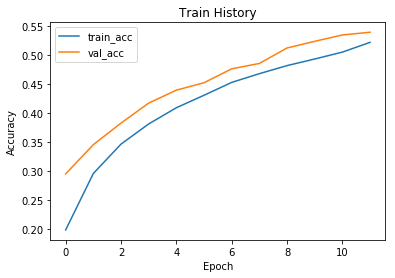

In [30]:
show_train_history('acc','val_acc')